In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Python Files')

In [ ]:
! pip install -r Requirements.txt

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
import joblib 
import seaborn as sn
import warnings
import yaml
import sys
from ModelPreprocessing import (LogisticRegressionClass,KNN,RandomForest,SVM,RandomForestGridSearch,LogisticRegressionGridSearch,KNNGridSearch,SVMGridSearch)
from preprocessing import preprocessing_data,label_encode
from SDV import SyntheticDataVault
from DS import DataSynthesizer
from Visualization import Statistics,read_csv,get_census_charts,get_forest_charts,get_heat_maps,get_box_plots

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Original Census dataset**

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/census-income.data.csv',names=['age','class of worker','detailed industry recode','detailed occupation recode','education','wage per hour','enroll in edu inst last wk','martial status','major industry code','major occupation code','race','hispanic origin','sex','member of labour union','reason for unemployment','full or part time employment stat','capital gains','capital losses','divdends from stock','tax filer status','region of previous residence','state of previous residence','detailed household and family stat','detailed household summary in household','instance weight','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago',' migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','country of birth self','citizenship','own business or self employed','fill inc questionnaire for veterans admin','veterans benefits','weeks worked in year','year','income'])
data=data.drop(['state of previous residence','migration code-change in msa','migration code-change in reg','migration code-move within reg',' migration prev res in sunbelt','country of birth father','country of birth mother','country of birth self','instance weight'],axis=1)

train_data,train_labels=preprocessing_data(data,target='income',dataset_name='Census')

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/census-income.csv',names=['age','class of worker','detailed industry recode','detailed occupation recode','education','wage per hour','enroll in edu inst last wk','martial status','major industry code','major occupation code','race','hispanic origin','sex','member of labour union','reason for unemployment','full or part time employment stat','capital gains','capital losses','divdends from stock','tax filer status','region of previous residence','state of previous residence','detailed household and family stat','detailed household summary in household','instance weight','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago',' migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','country of birth self','citizenship','own business or self employed','fill inc questionnaire for veterans admin','veterans benefits','weeks worked in year','year','income'])
df=df.drop(['state of previous residence','migration code-change in msa','migration code-change in reg','migration code-move within reg',' migration prev res in sunbelt','country of birth father','country of birth mother','country of birth self','instance weight'],axis=1)

test_data,test_labels=preprocessing_data(df,target='income',dataset_name='Census') 

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Original_Census_Dataset',identifier='Original Census')
RandomForest(train_data,train_labels,test_data,test_labels,key='Original_Census_Dataset',identifier='Original Census')
KNN(train_data,train_labels,test_data,test_labels,key='Original_Census_Dataset',identifier='Original Census')
SVM(train_data,train_labels,test_data,test_labels,key='Original_Census_Dataset',identifier='Original Census')

#Grid Searches(Will takes some time)
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)


**Synthetic Data Vault for census dataset**

In [ ]:
#New data
new_data,metric=SyntheticDataVault(label_encode(data))

# Displays the metric of synthetic data
print(metric)

# Preprocessing the synthetic data
train_data,train_labels=preprocessing_data(new_data,target='income',dataset_name='Census')

In [ ]:
#New data
new_data,metric=SyntheticDataVault(label_encode(df))

# Displays the metric of synthetic data
print(metric)

# Preprocessing the synthetic data
test_data,test_labels=preprocessing_data(new_data,target='income',dataset_name='Census') 

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Census_Dataset',identifier='SDV Census')
RandomForest(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Census_Dataset',identifier='SDV Census')
KNN(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Census_Dataset',identifier='SDV Census')
SVM(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Census_Dataset',identifier='SDV Census')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Data Synthesizer for census dataset**

In [ ]:
new_data=DataSynthesizer(label_encode(data))

#Reading new csv file
new_data=pd.read_csv(new_data)

# Preprocessing the synthetic data
train_data,train_labels=preprocessing_data(new_data,target='income',dataset_name='Census')

In [ ]:
#Testing data
new_data=DataSynthesizer(label_encode(df))

#Reading new csv file
new_data=pd.read_csv(new_data)

# Preprocessing the synthetic data
test_data,test_labels=preprocessing_data(new_data,target='income',dataset_name='Census') 

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Census_Dataset',,identifier='Data Synthesizer Census')
RandomForest(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Census_Dataset',identifier='Data Synthesizer Census')
KNN(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Census_Dataset',identifier='Data Synthesizer Census')
SVM(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Census_Dataset',identifier='Data Synthesizer Census')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Synthpop for census dataset**

In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library('synthpop')

#yaml library
library('yaml') 


#Give the file of your path
data='/content/drive/MyDrive/census_experiments.csv'

Synthpop <- function(data,save_CSV)
{ 
  data <- read.csv(data)
  
  # Checking NaN values
  print(sum(is.na(data)))

  #Config file
  config <- yaml.load_file("/content/drive/MyDrive/Config.yaml")

  k <- 500
  
  if (is.null(k))
  {
      k <- nrow(data)
  }
 
  method <- config['method']


  mysyn <- syn(data,method=method, k = k, minnumlevels=-1)


  # Comparing the results
  evaluation <- compare(mysyn, data, vars="tax.filer.status")$plot

  #Saving into file format
  if (save_CSV==1)
  { 
      write.syn(mysyn,file = "Synthpop_Data_File", filetype = "csv")
  }

  return (evaluation)
}
save_CSV=1
evaluation=Synthpop(data,save_CSV)

#Gives the evaluation of the specific column you compared
print(evaluation) 

Number of attributes are 33
1    187082
0     12441
Name: income, dtype: int64
Null values are False
Dataset balanced using SMOTE [0 1] [116594 116594]


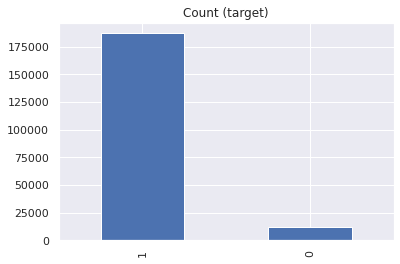

In [ ]:
new_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Synthpop/CensusTrainData.csv')
train_data,train_labels=preprocessing_data(new_data,target='income',dataset_name='Census')

In [ ]:
#Testing data
new_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Synthpop/CensusTestData.csv')
test_data,test_labels=preprocessing_data(new_data,target='income',dataset_name='Census') 

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Synthpop_Census_Dataset',identifier='Synthpop Census')
RandomForest(train_data,train_labels,test_data,test_labels,key='Synthpop_Census_Dataset',identifier='Synthpop Census')
KNN(train_data,train_labels,test_data,test_labels,key='Synthpop_Census_Dataset',identifier='Synthpop Census')
SVM(train_data,train_labels,test_data,test_labels,key='Synthpop_Census_Dataset',identifier='Synthpop Census')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Original Forest Dataset**

In [ ]:
names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']
data=pd.read_csv('/content/drive/MyDrive/covtype.data.csv',names=names)
train_data,train_labels,test_data,test_labels=preprocessing_data(data,target='Cover_Type',dataset_name='Forest')

581012

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Original_Forest_Dataset',identifier='Original Forest')
RandomForest(train_data,train_labels,test_data,test_labels,key='Original_Forest_Dataset',identifier='Original Forest')
KNN(train_data,train_labels,test_data,test_labels,key='Original_Forest_Dataset',identifier='Original Forest')
SVM(train_data,train_labels,test_data,test_labels,key='Original_Forest_Dataset',identifier='Original Forest')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Synthetic Data Vault for Forest Data**

In [ ]:
#Training data
new_data,metric=SyntheticDataVault(label_encode(data))

# Displays the metrics of synthetic data
print(metric)

# Preprocessing the synthetic data
train_data,train_labels,test_data,test_labels=preprocessing_data(new_data,target='Cover_Type',dataset_name='Forest')

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Forest_Dataset',identifier='SDV Forest')
RandomForest(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Forest_Dataset',identifier='SDV Forest')
KNN(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Forest_Dataset',identifier='SDV Forest')
SVM(train_data,train_labels,test_data,test_labels,key='Synthetic_Data_Vault_Forest_Dataset',identifier='SDV Forest')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Data Synthesizer for Forest data**

In [ ]:
new_data=DataSynthesizer(label_encode(data))

#Reading new csv file
new_data=pd.read_csv(new_data)

# Preprocessing the synthetic data
train_data,train_labels,test_data,test_labels=preprocessing_data(new_data,target='Cover_Type',dataset_name='Forest')

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Forest_Dataset',identifier='Data Synthesizer Forest')
RandomForest(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Forest_Dataset',identifier='Data Synthesizer Forest')
KNN(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Forest_Dataset',identifier='Data Synthesizer Forest')
SVM(train_data,train_labels,test_data,test_labels,key='Data_Synthesizer_Forest_Dataset',identifier='Data Synthesizer Forest')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Synthpop for Forest Dataset**

In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library('synthpop')

#yaml library
library('yaml') 


#Give the file of your path
data='/content/drive/MyDrive/Python Files/OriginalDataForest.csv'

Synthpop <- function(data,save_CSV)
{ 
  data <- read.csv(data)
  
  # Checking NaN values
  print(sum(is.na(data)))

  #Config file
  config <- yaml.load_file("/content/drive/MyDrive/Config.yaml")

  k <- 581012
  
  if (is.null(k))
  {
      k <- nrow(data)
  }
 
  method <- config['method']


  mysyn <- syn(data,method=method, k = k, minnumlevels=-1)


  # Comparing the results
  evaluation <- compare(mysyn, data, vars="Elevation")$plot

  #Saving into file format
  if (save_CSV==1)
  { 
      write.syn(mysyn,file = "Synthpop_Data_File_Forest_Data", filetype = "csv")
  }

  return (evaluation)
}
save_CSV=1
evaluation=Synthpop(data,save_CSV)

#Gives the evaluation of the specific column you compared
print(evaluation) 

In [ ]:
new_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Synthpop/Synthetic Synthpop Forest Dataset.csv')
train_data,train_labels,test_data,test_labels=preprocessing_data(new_data,target='Cover_Type',dataset_name='Forest')

In [ ]:
#Models
LogisticRegressionClass(train_data,train_labels,test_data,test_labels,key='Synthpop_Forest_Dataset',identifer='Synthpop Forest')
RandomForest(train_data,train_labels,test_data,test_labels,key='Synthpop_Forest_Dataset',identifer='Synthpop Forest')
KNN(train_data,train_labels,test_data,test_labels,key='Synthpop_Forest_Dataset',identifer='Synthpop Forest')
SVM(train_data,train_labels,test_data,test_labels,key='Synthpop_Forest_Dataset',identifer='Synthpop Forest')

#Grid Searches
RandomForestGridSearch(train_data,train_labels)
LogisticRegressionGridSearch(train_data,train_labels)
KNNGridSearch(train_data,train_labels)
SVMGridSearch(train_data,train_labels)

**Visualization of Census Data**

Random Forest Chart


Logistic Regression Chart


K Nearest Neighbor Chart


Suppor Vector Machine Chart


Confusion matrices of Original Data


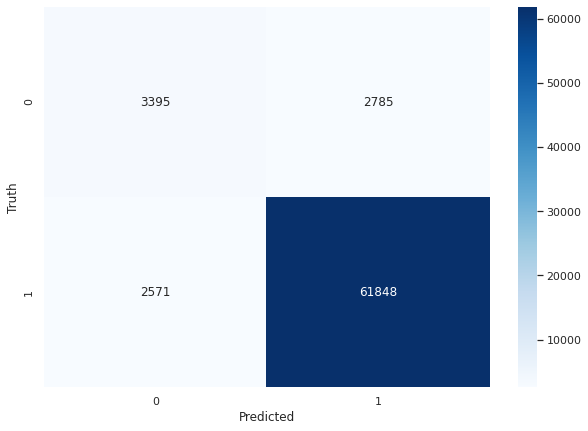

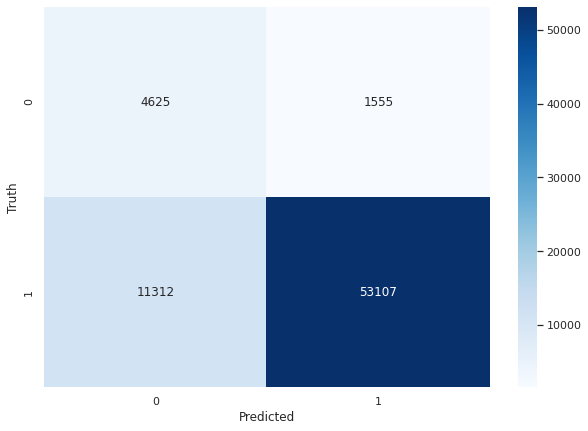

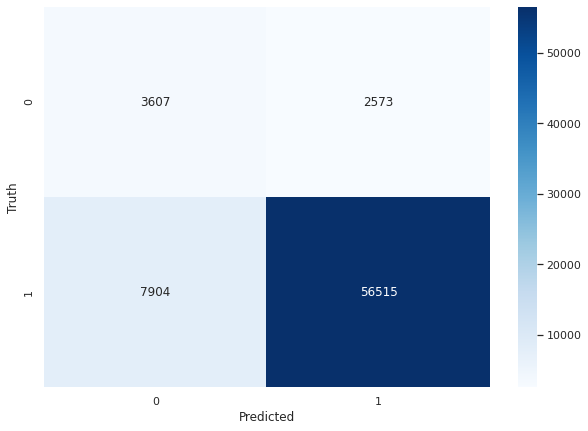

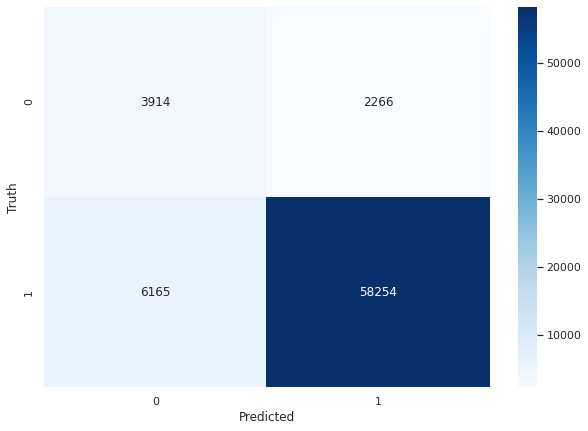

Confusion matrices of Synthetic Data Vault


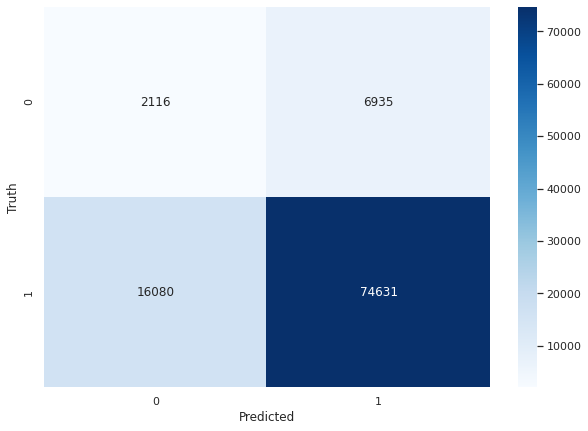

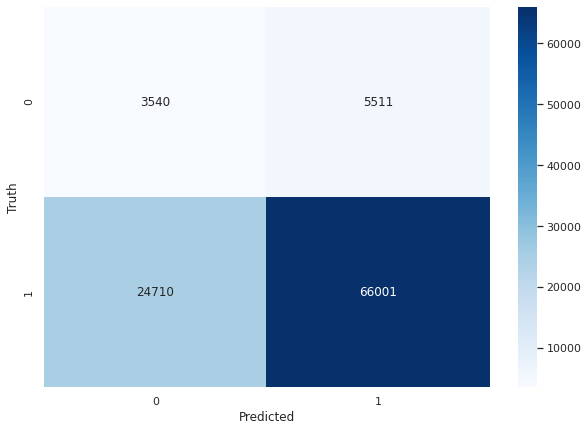

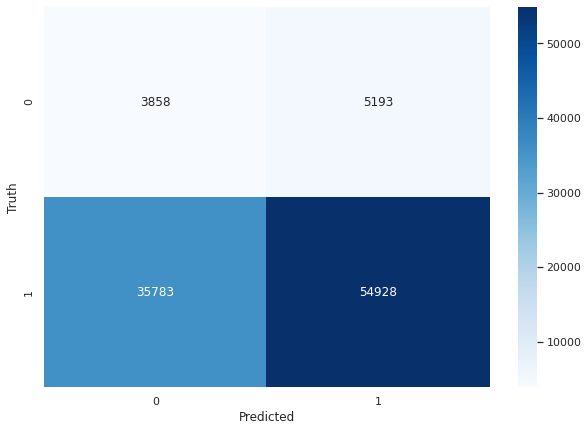

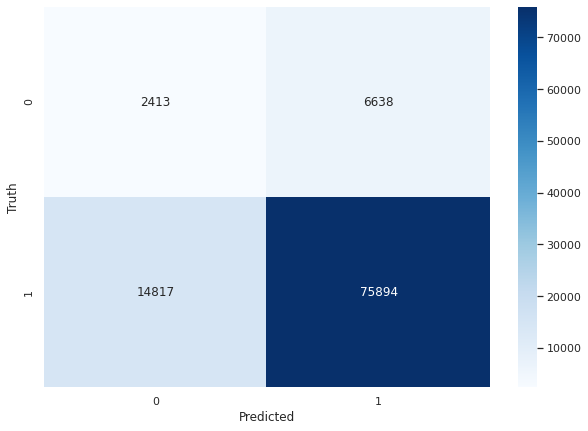

Confusion matrices of Data Synthesizer


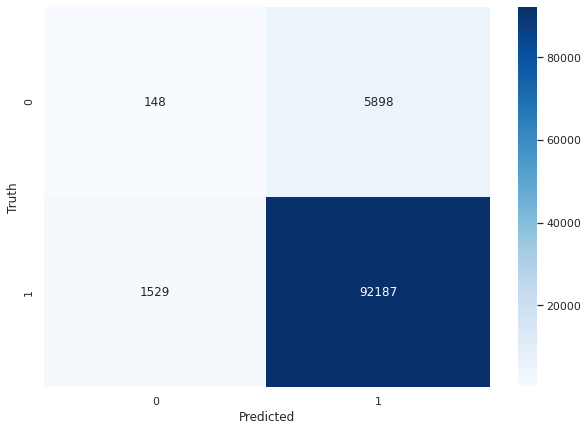

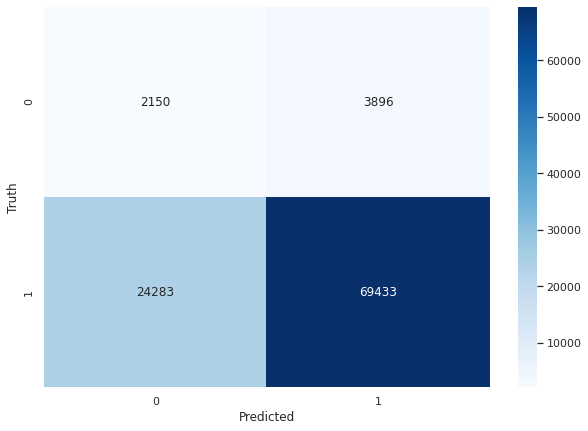

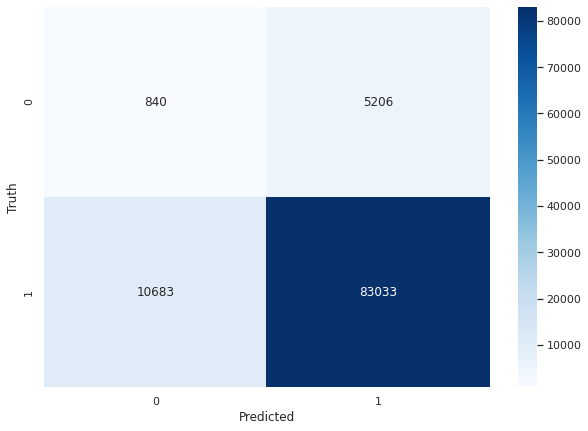

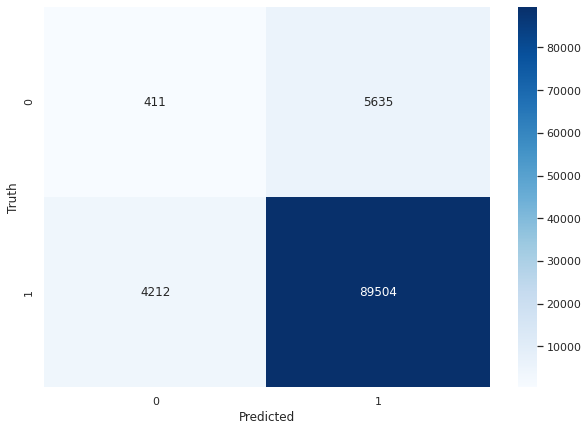

Confusion matrices of Synthpop Data


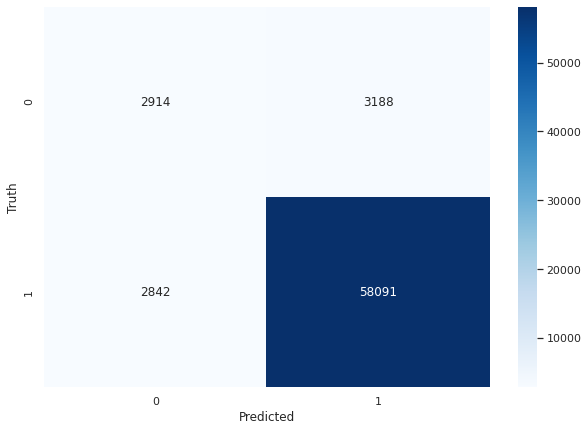

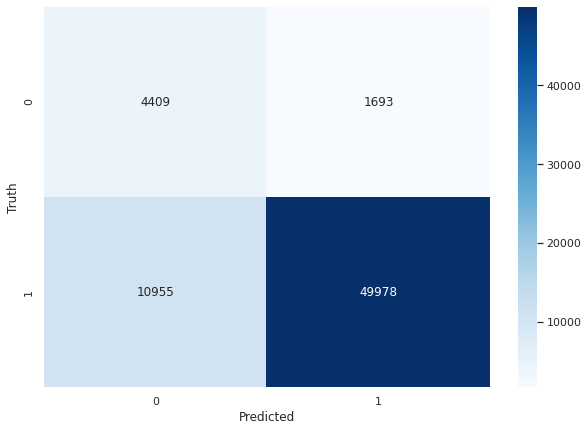

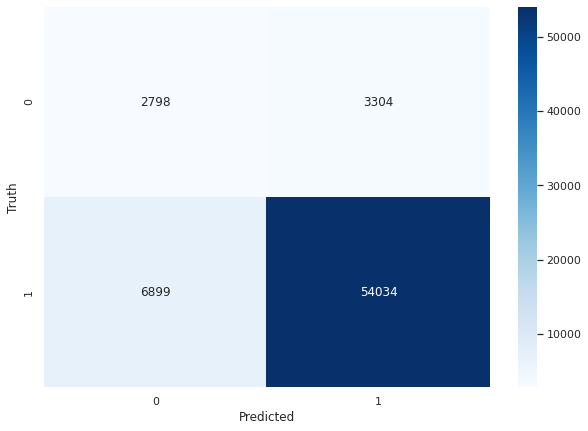

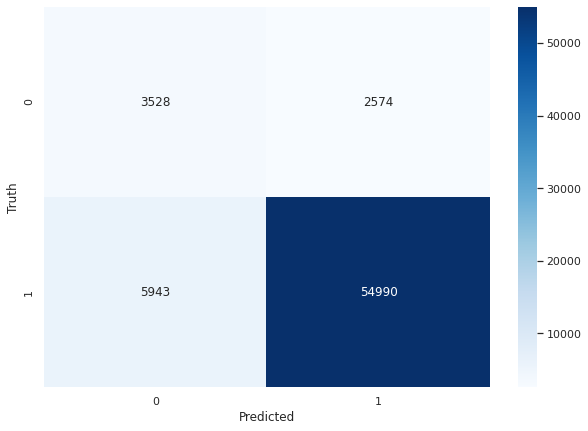

In [ ]:
#Models CSV's of Original census Data 
csv1='/content/drive/MyDrive/CSVs/OriginalCensusRFmodel.csv'
csv2='/content/drive/MyDrive/CSVs/OriginalCensusLRmodel.csv'
csv3='/content/drive/MyDrive/CSVs/OriginalCensusKNNmodel.csv'
csv4='/content/drive/MyDrive/CSVs/OriginalCensusSVMmodel.csv'

# Models CSV's of SDV library
sdv_csv1='/content/drive/MyDrive/CSVs/SDVCensusRFmodel.csv'
sdv_csv2= '/content/drive/MyDrive/CSVs/SDVCensusLRmodel.csv'
sdv_csv3= '/content/drive/MyDrive/CSVs/SDVCensusKNNmodel.csv'
sdv_csv4= '/content/drive/MyDrive/CSVs/SDVCensusSVMmodel.csv'

#Model CSV's of Data Synthesizer
ds_csv1= '/content/drive/MyDrive/CSVs/DSCensusRFmodel.csv'
ds_csv2= '/content/drive/MyDrive/CSVs/DSCensusLRmodel.csv'
ds_csv3= '/content/drive/MyDrive/CSVs/DSCensusKNNmodel.csv'
ds_csv4= '/content/drive/MyDrive/CSVs/DSCensusSVMmodel.csv'

# Model CSV's of Synthpop
synthpop_csv1 = '/content/drive/MyDrive/CSVs/SynthpopCensusRFmodel.csv'
synthpop_csv2 = '/content/drive/MyDrive/CSVs/SynthpopCensusLRmodel.csv'
synthpop_csv3 = '/content/drive/MyDrive/CSVs/SynthpopCensusKNNmodel.csv'
synthpop_csv4 = '/content/drive/MyDrive/CSVs/SynthpopCensusSVMmodel.csv'


csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4=read_csv(csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4)
accuracy_csv1,sdv_accuracy_csv1,ds_accuracy_csv1,synthpop_accuracy_csv1,accuracy_csv2,sdv_accuracy_csv2,ds_accuracy_csv2,synthpop_accuracy_csv2,accuracy_csv3,sdv_accuracy_csv3,ds_accuracy_csv3,synthpop_accuracy_csv3,accuracy_csv4,sdv_accuracy_csv4,ds_accuracy_csv4,synthpop_accuracy_csv4=Statistics(csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4,datasetname='Census')

In [ ]:
#Census Data Table
data=[accuracy_csv1,sdv_accuracy_csv1,ds_accuracy_csv1,synthpop_accuracy_csv1]
data1=[accuracy_csv2,sdv_accuracy_csv2,ds_accuracy_csv2,synthpop_accuracy_csv2]
data2=[accuracy_csv3,sdv_accuracy_csv3,ds_accuracy_csv3,synthpop_accuracy_csv3]
data3=[accuracy_csv4,sdv_accuracy_csv4,ds_accuracy_csv4,synthpop_accuracy_csv4]
data_t=['Original Data' , 'Synthetic Data Vault', 'Data Synthesizer','Synthpop']

stats=pd.DataFrame(zip(data,data1,data2,data3),columns=('Random Forest','Logistic Regression','KNN','SVM'),index=data_t)
stats

Random Forest  Logistic Regression       KNN       SVM
Original Data              0.924135             0.817745  0.851598  0.880579
Synthetic Data Vault       0.769301             0.697069  0.589262  0.784938
Data Synthesizer           0.925553             0.717538  0.840731  0.901295
Synthpop                   0.910047             0.811322  0.847796  0.872947

**Visualization of Forest Data**

Random Forest Chart


Logistic Regression Chart


K Nearest Neighbor Chart


Suppor Vector Machine Chart


Confusion matrices of Original Data


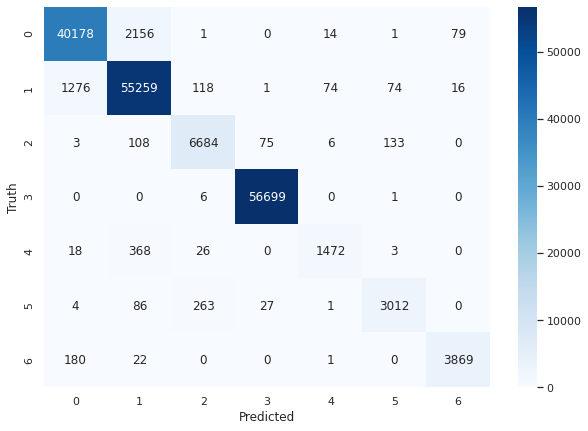

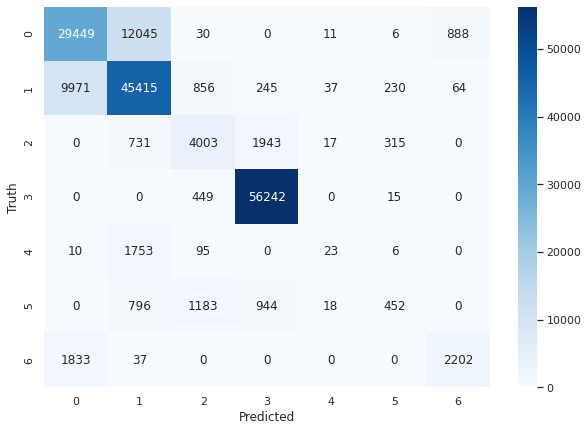

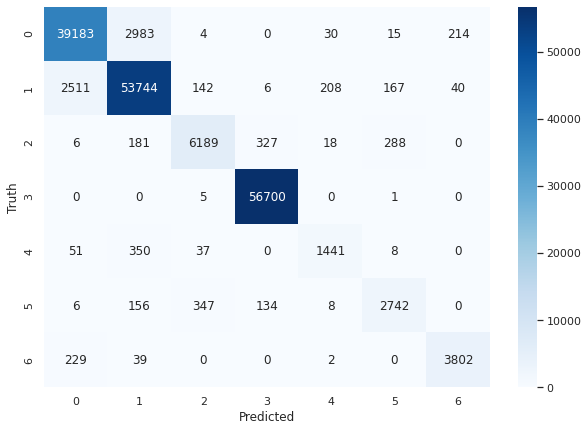

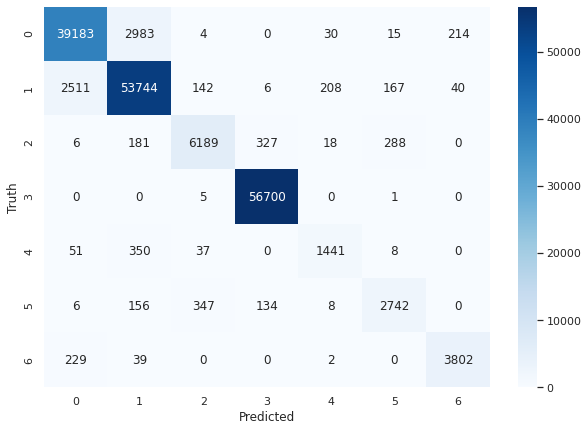

Confusion matrices of Synthetic Data Vault


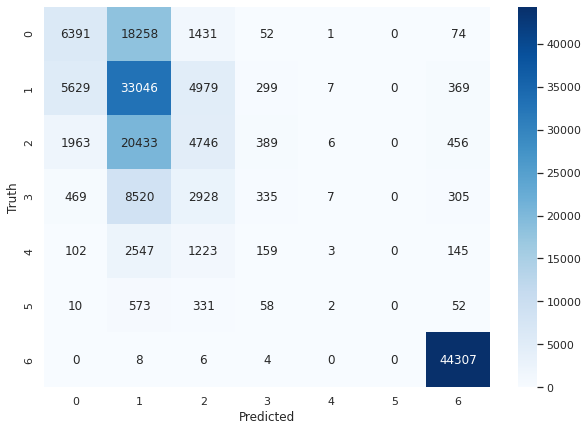

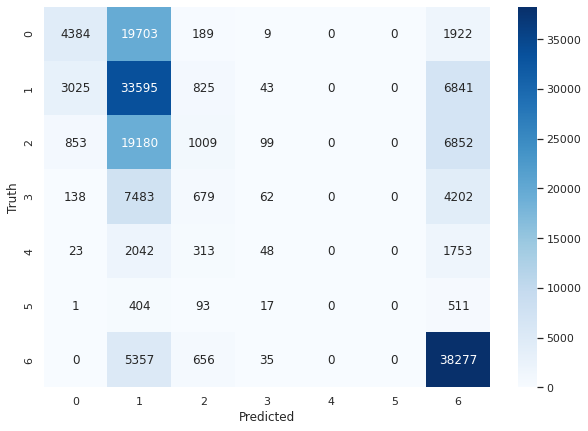

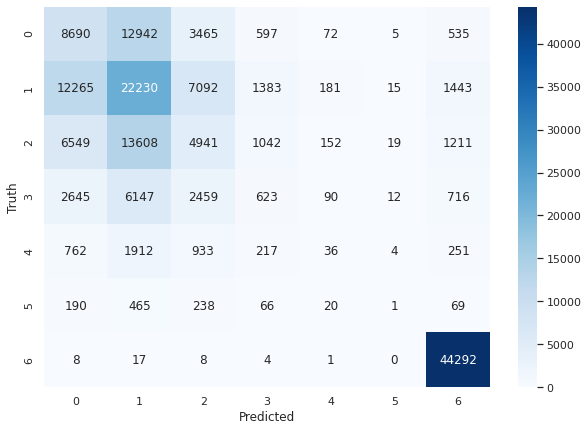

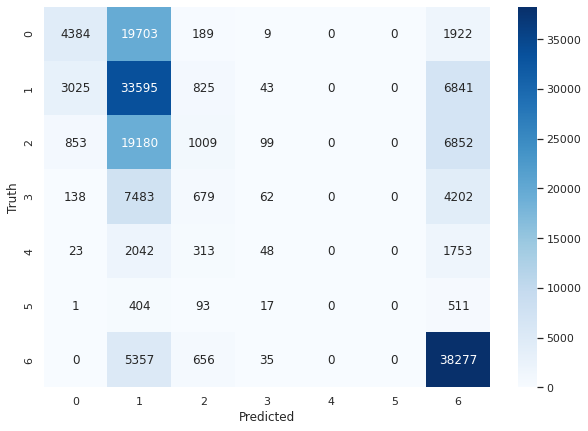

Confusion matrices of Data Synthesizer


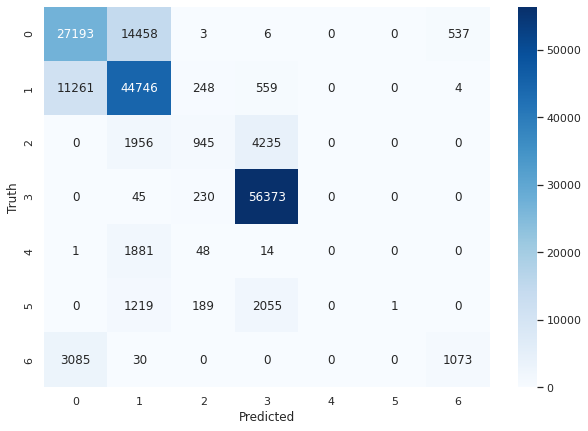

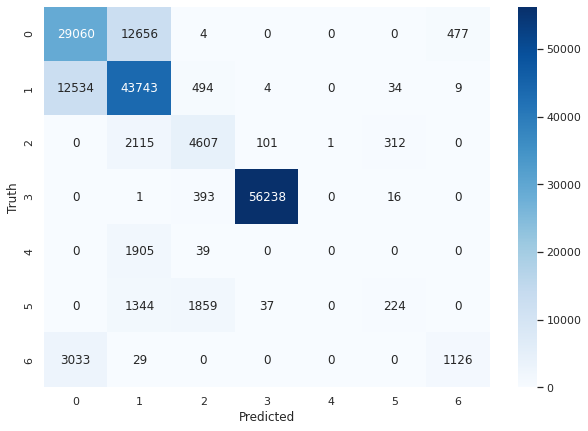

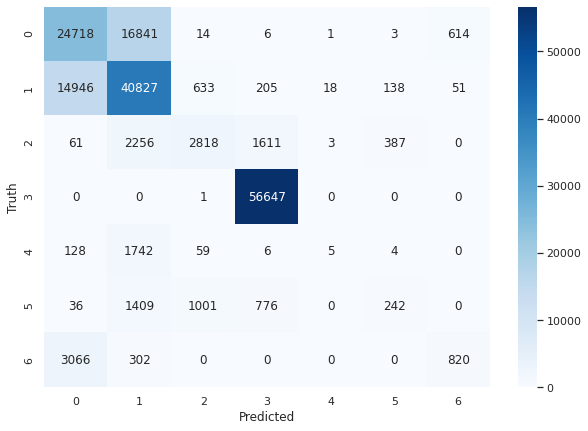

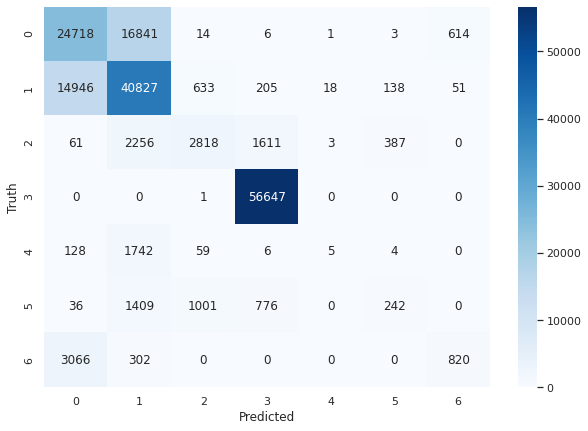

Confusion matrices of Synthpop Data


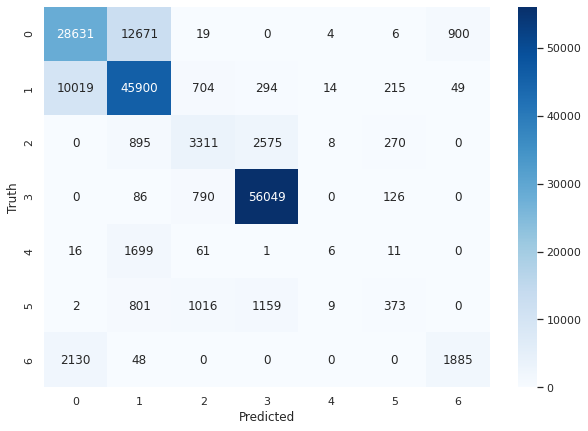

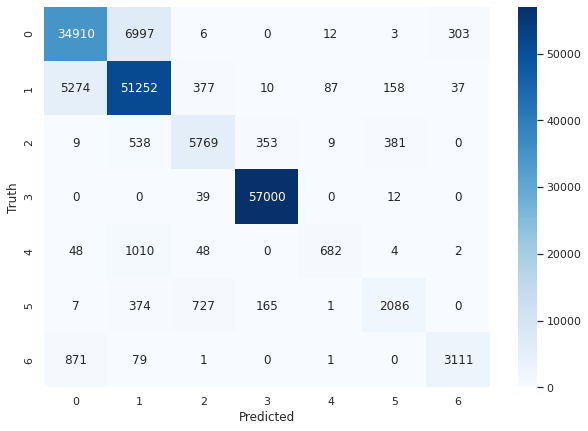

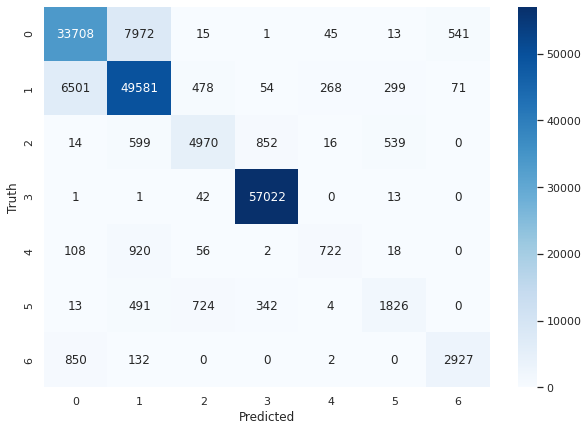

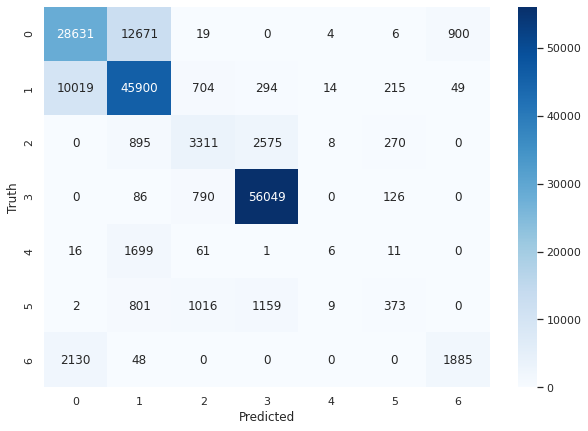

In [ ]:
#Model CSV's of original forest data
csv1 ='/content/drive/MyDrive/CSVs/ODForestRFmodel.csv'
csv2 = '/content/drive/MyDrive/CSVs/ODForestLRmodel.csv'
csv3= '/content/drive/MyDrive/CSVs/ODForestKNNmodel.csv'
csv4= '/content/drive/MyDrive/CSVs/ODForestSVMmodel (1).csv'

#Model CSV's of Synthetic Data Vault
sdv_csv1='/content/drive/MyDrive/CSVs/SDVForestRFmodel.csv'
sdv_csv2='/content/drive/MyDrive/CSVs/SDVForestLRmodel.csv'
sdv_csv3='/content/drive/MyDrive/CSVs/SDVForestKNNmodel.csv'
sdv_csv4='/content/drive/MyDrive/CSVs/SDVForestSVMmodel.csv'

#Model CSV's of Data Synthesizer
ds_csv1= '/content/drive/MyDrive/CSVs/DataSynthesizerForestLRmodel.csv'
ds_csv2= '/content/drive/MyDrive/CSVs/DataSynthesizerForestRFmodel.csv'
ds_csv3= '/content/drive/MyDrive/CSVs/DataSynthesizerForestKNNmodel.csv'
ds_csv4= '/content/drive/MyDrive/CSVs/DataSynthesizerForestSVMmodel.csv'

#Model CSV's of Synthpop of Forest Data
synthpop_csv1= '/content/drive/MyDrive/CSVs/SynthpopForestLRmodel.csv'
synthpop_csv2= '/content/drive/MyDrive/CSVs/SynthpopForestRFmodel.csv'
synthpop_csv3= '/content/drive/MyDrive/CSVs/SynthpopForestKNNmodel.csv'
synthpop_csv4 = '/content/drive/MyDrive/CSVs/SynthpopForestSVMmodel.csv'


csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4=read_csv(csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4)
accuracy_csv1,sdv_accuracy_csv1,ds_accuracy_csv1,synthpop_accuracy_csv1,accuracy_csv2,sdv_accuracy_csv2,ds_accuracy_csv2,synthpop_accuracy_csv2,accuracy_csv3,sdv_accuracy_csv3,ds_accuracy_csv3,synthpop_accuracy_csv3,accuracy_csv4,sdv_accuracy_csv4,ds_accuracy_csv4,synthpop_accuracy_csv4=Statistics(csv1,csv2,csv3,csv4,sdv_csv1,sdv_csv2,sdv_csv3,sdv_csv4,ds_csv1,ds_csv2,ds_csv3,ds_csv4,synthpop_csv1,synthpop_csv2,synthpop_csv3,synthpop_csv4,datasetname='Forest')

In [ ]:
data=[accuracy_csv1,sdv_accuracy_csv1,ds_accuracy_csv1,synthpop_accuracy_csv1]
data1=[accuracy_csv2,sdv_accuracy_csv2,ds_accuracy_csv2,synthpop_accuracy_csv2]
data2=[accuracy_csv3,sdv_accuracy_csv3,ds_accuracy_csv3,synthpop_accuracy_csv3]
data3=[accuracy_csv4,sdv_accuracy_csv4,ds_accuracy_csv4,synthpop_accuracy_csv4]
data_t=['Original Data' , 'Synthetic Data Vault', 'Data Synthesizer','Synthpop']
# print(data.shape,data1.shape,data2.shape,data3.shape)

stats=pd.DataFrame(zip(data,data1,data2,data3),columns=('Random Forest','Logistic Regression','KNN','SVM'),index=data_t)
stats

Random Forest  Logistic Regression       KNN       SVM
Original Data              0.970165             0.799622  0.950596  0.950596
Synthetic Data Vault       0.553022             0.481419  0.503122  0.481419
Data Synthesizer           0.756002             0.783074  0.731326  0.731326
Synthpop                   0.788148             0.896135  0.872668  0.788148

**Charts displaying the difference between Synthetic and Original Data**

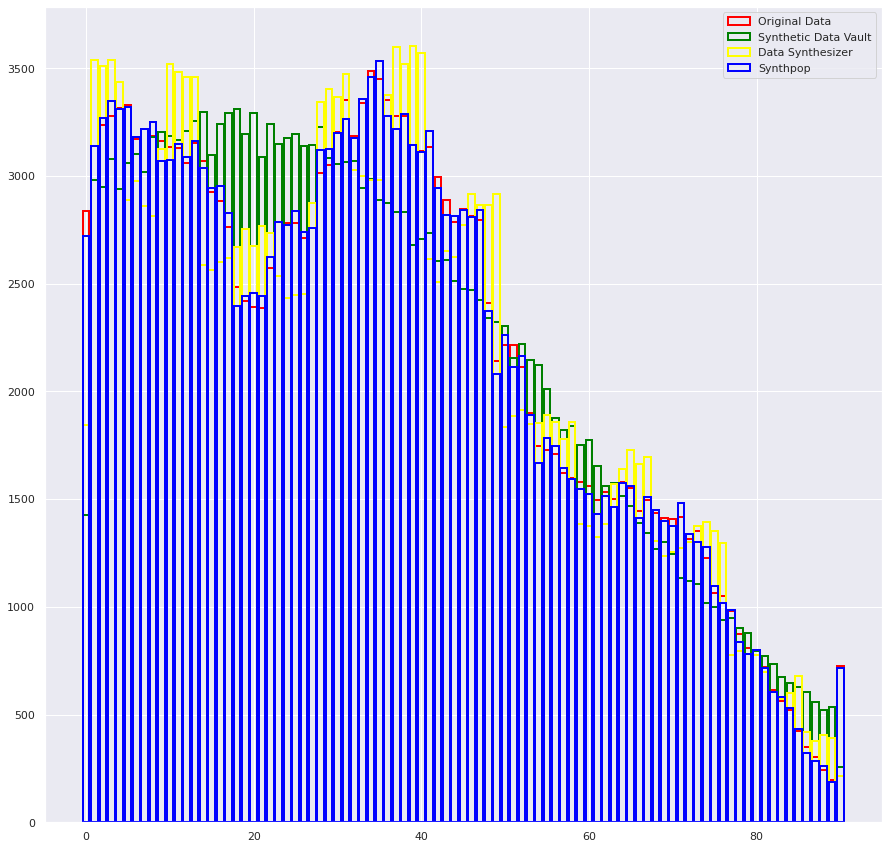

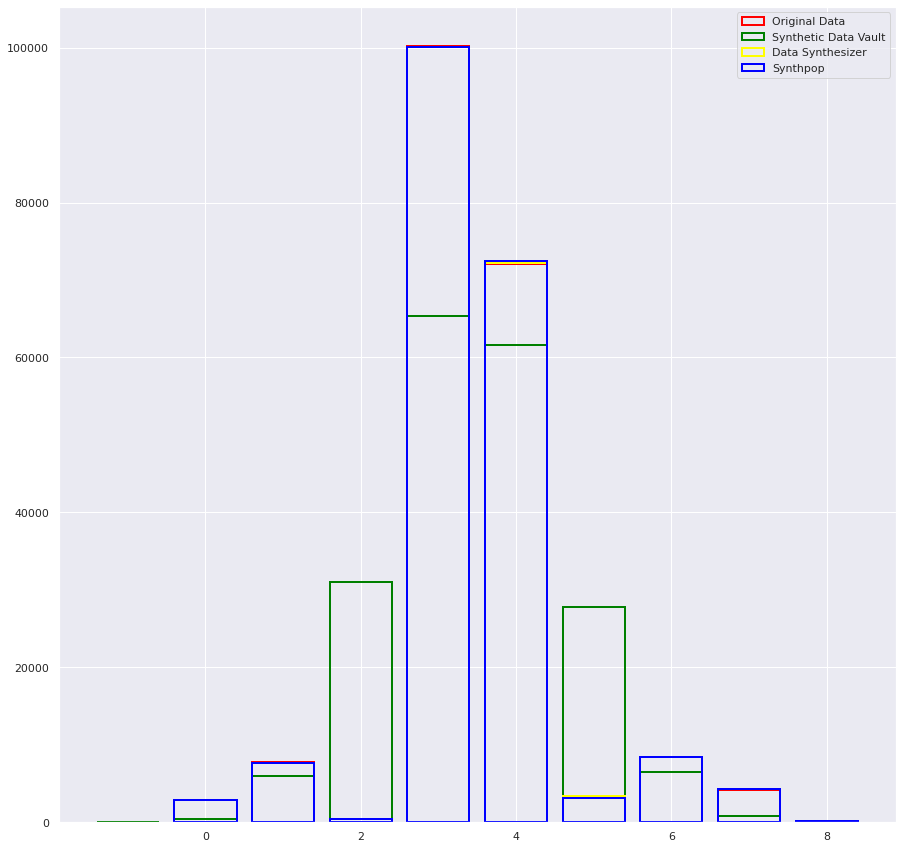

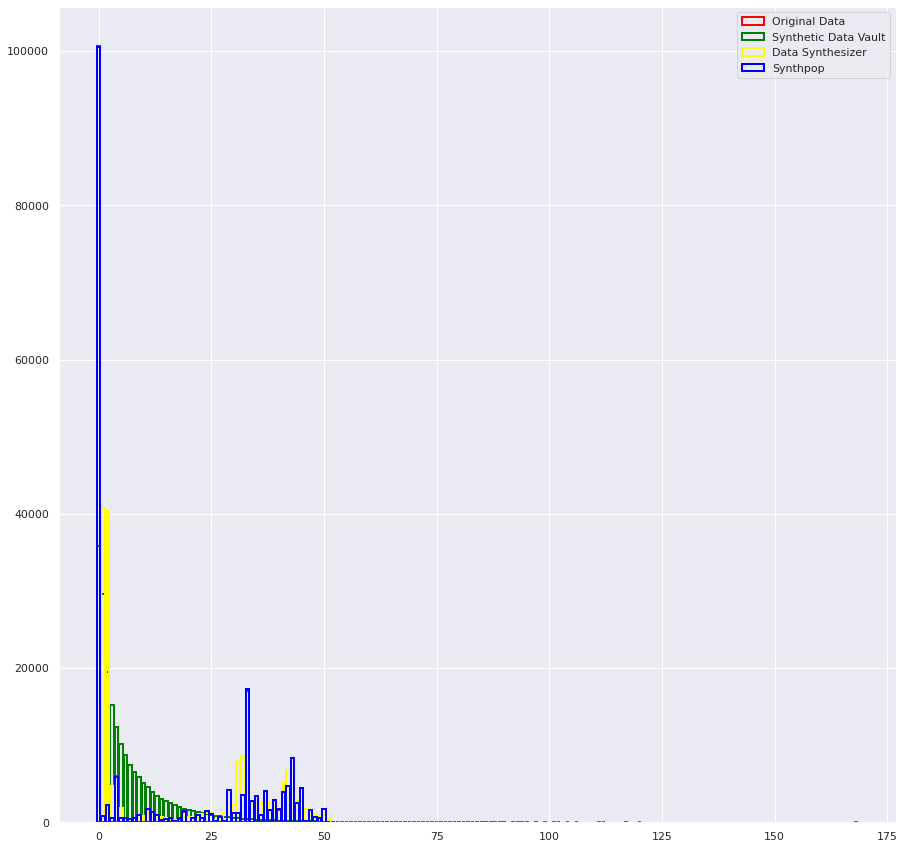

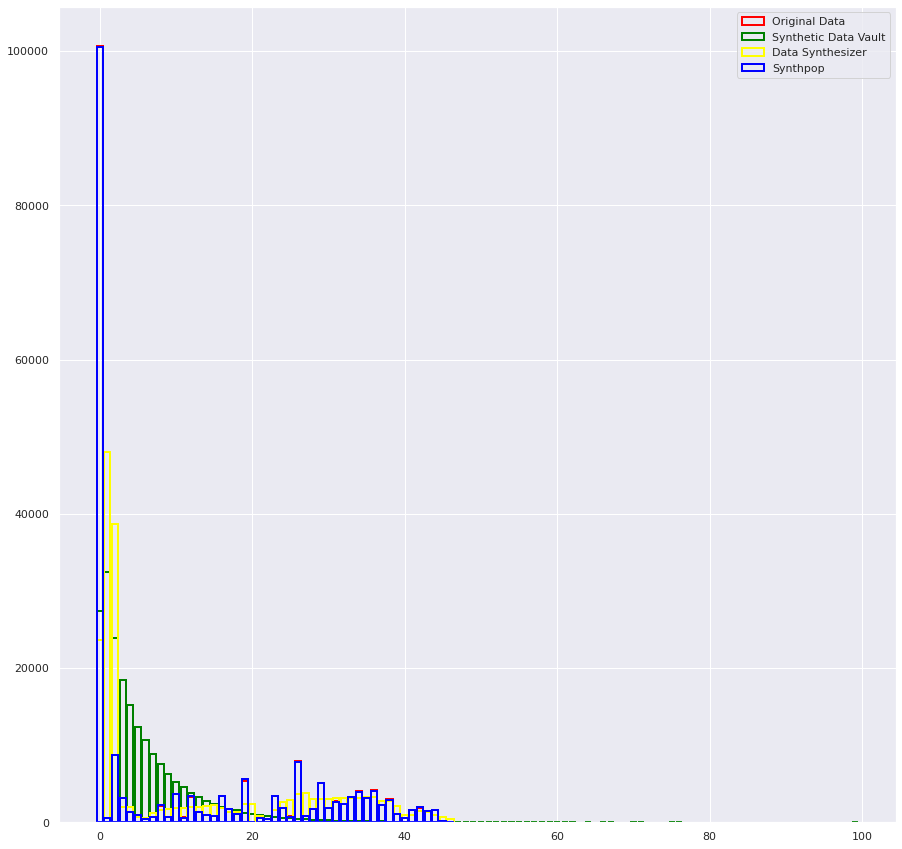

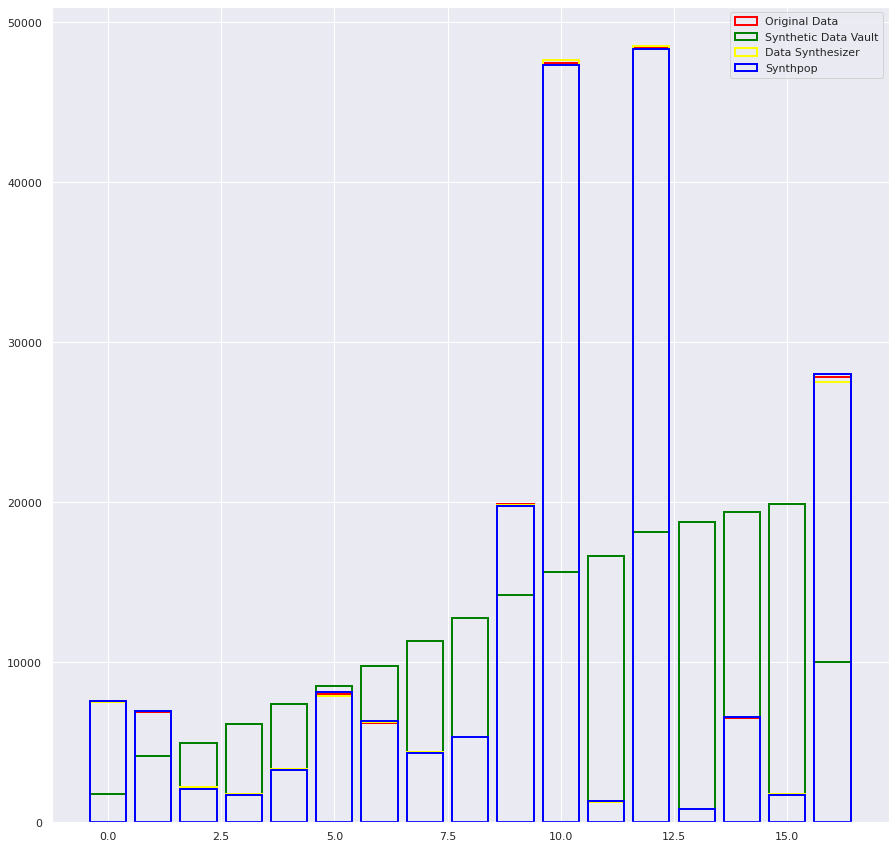

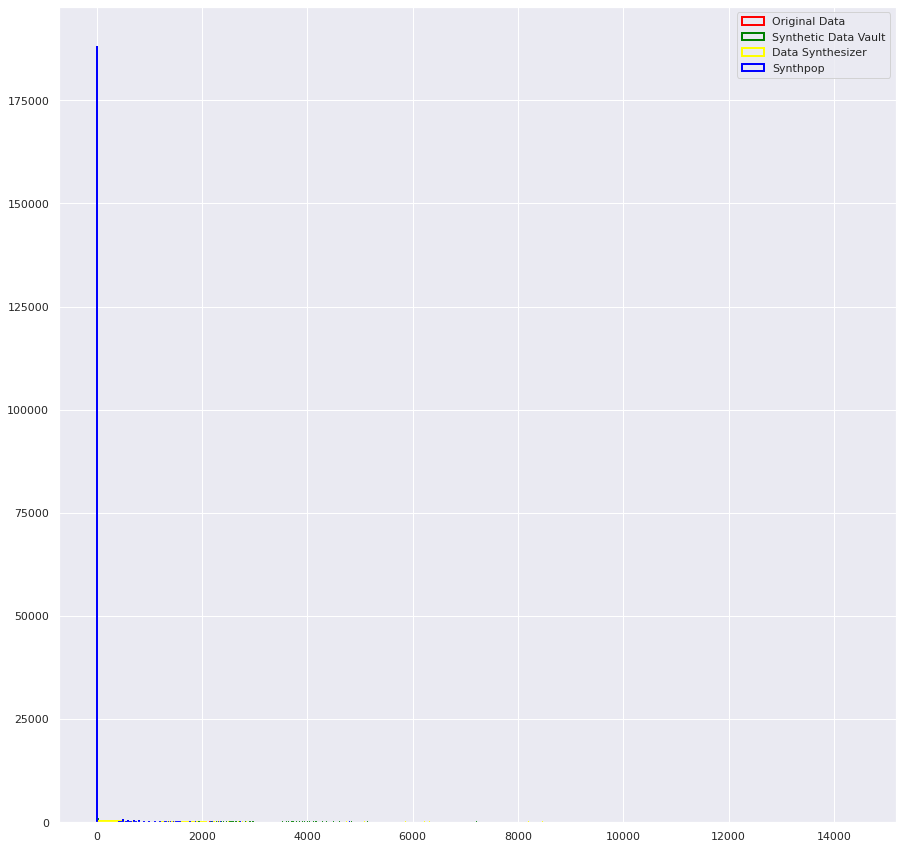

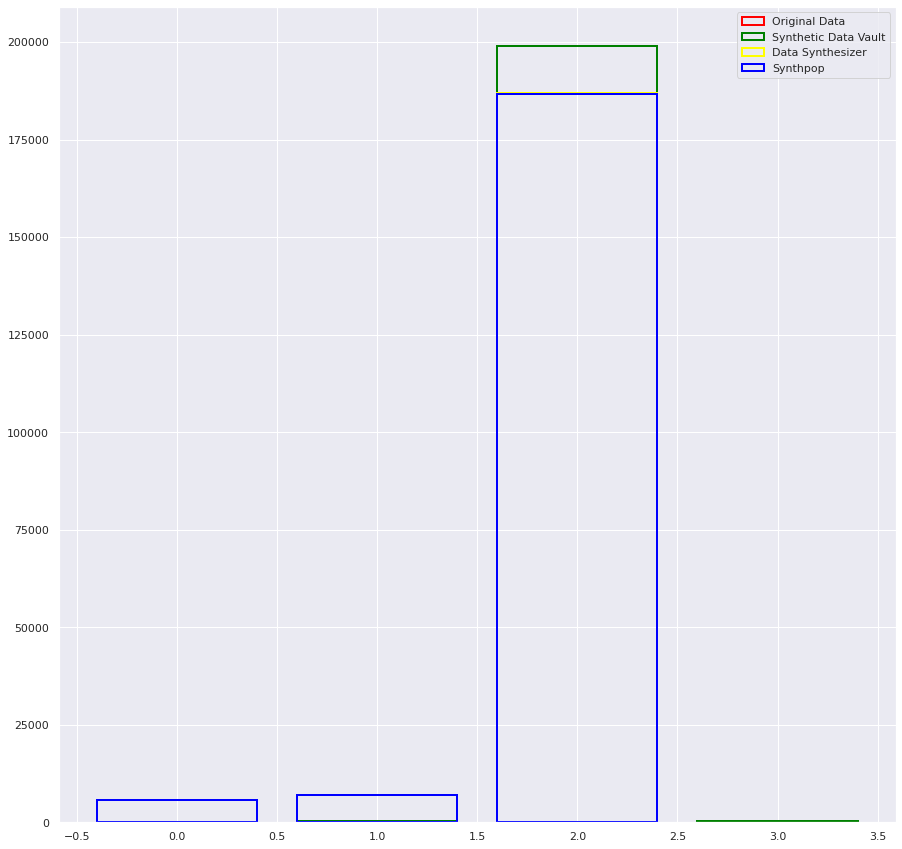

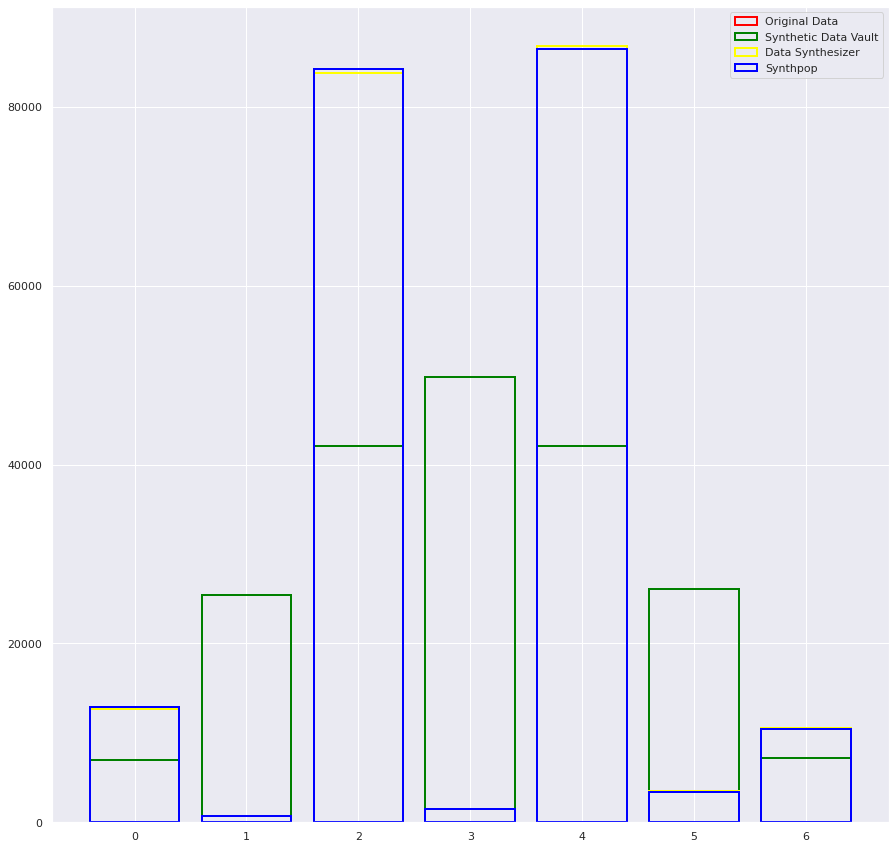

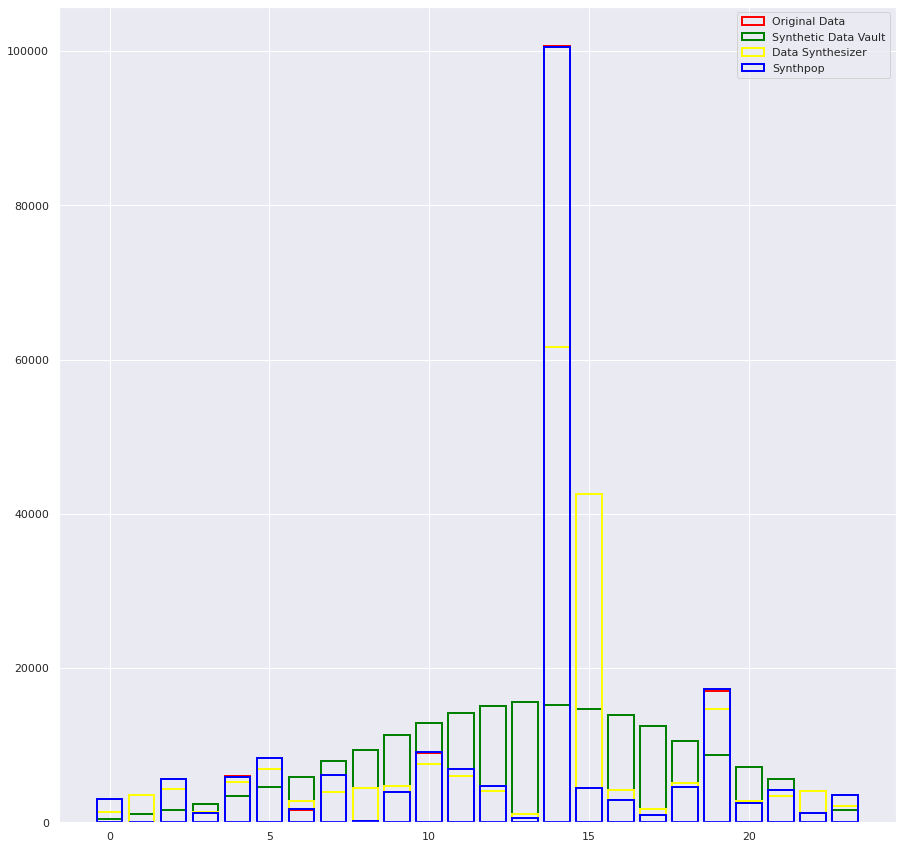

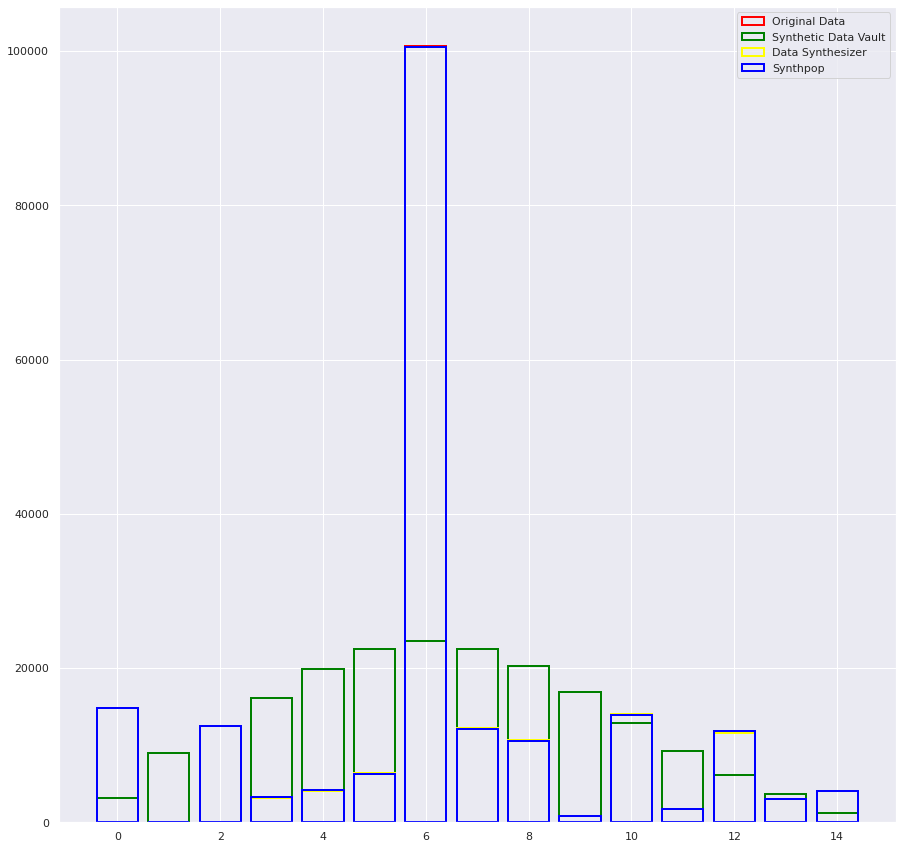

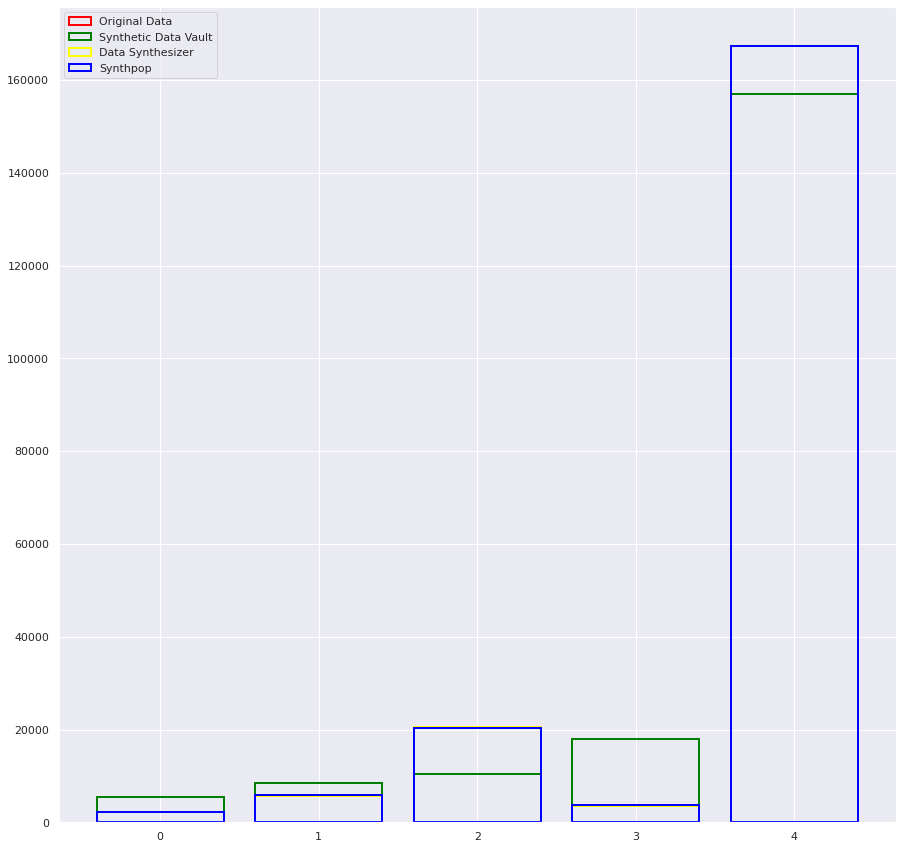

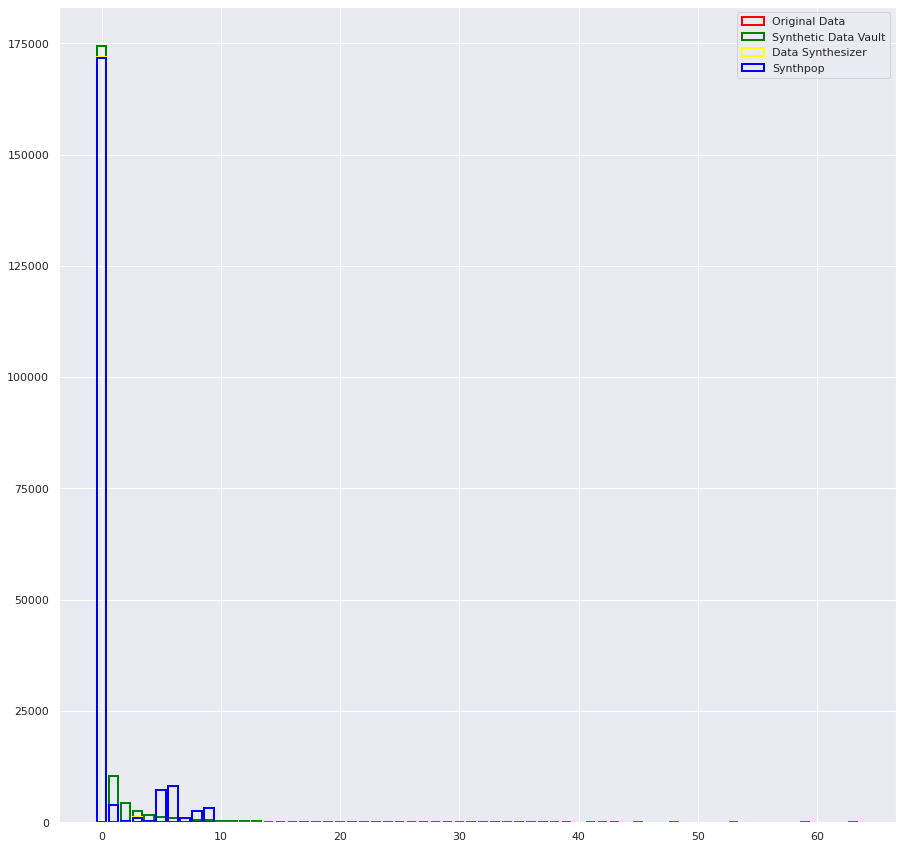

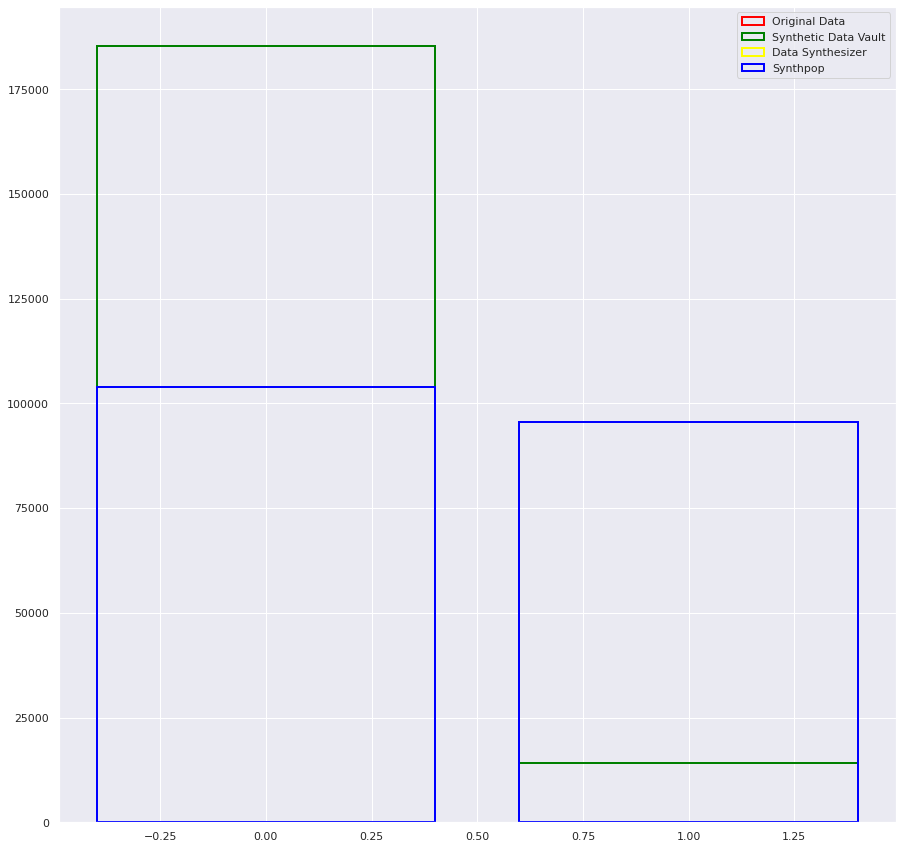

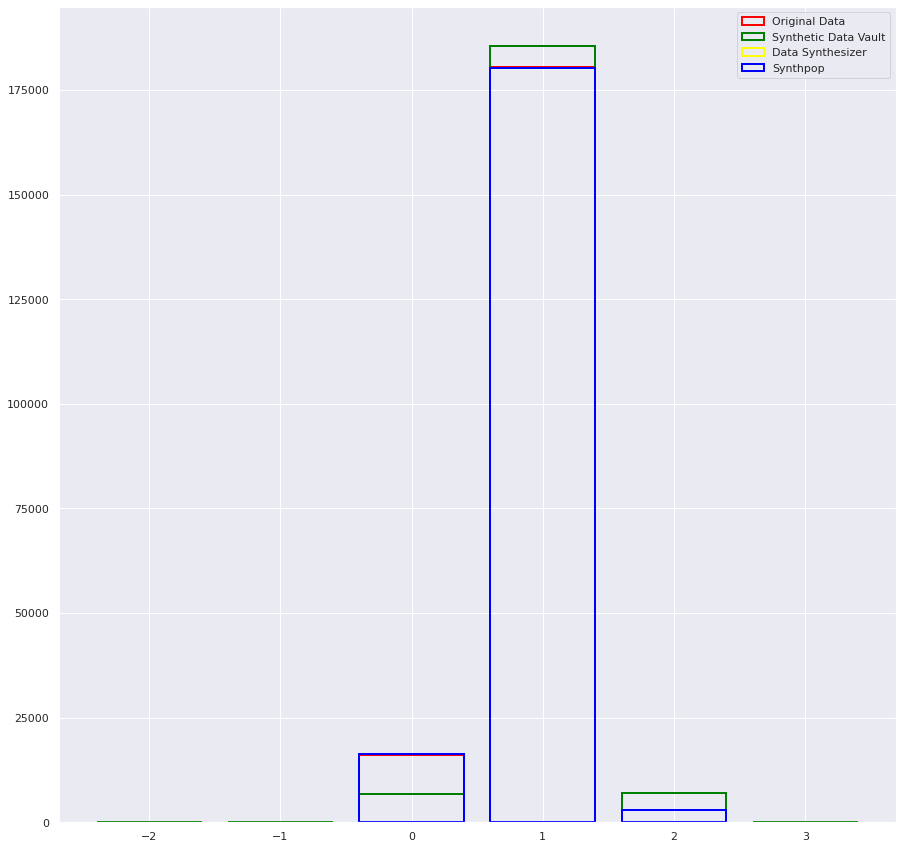

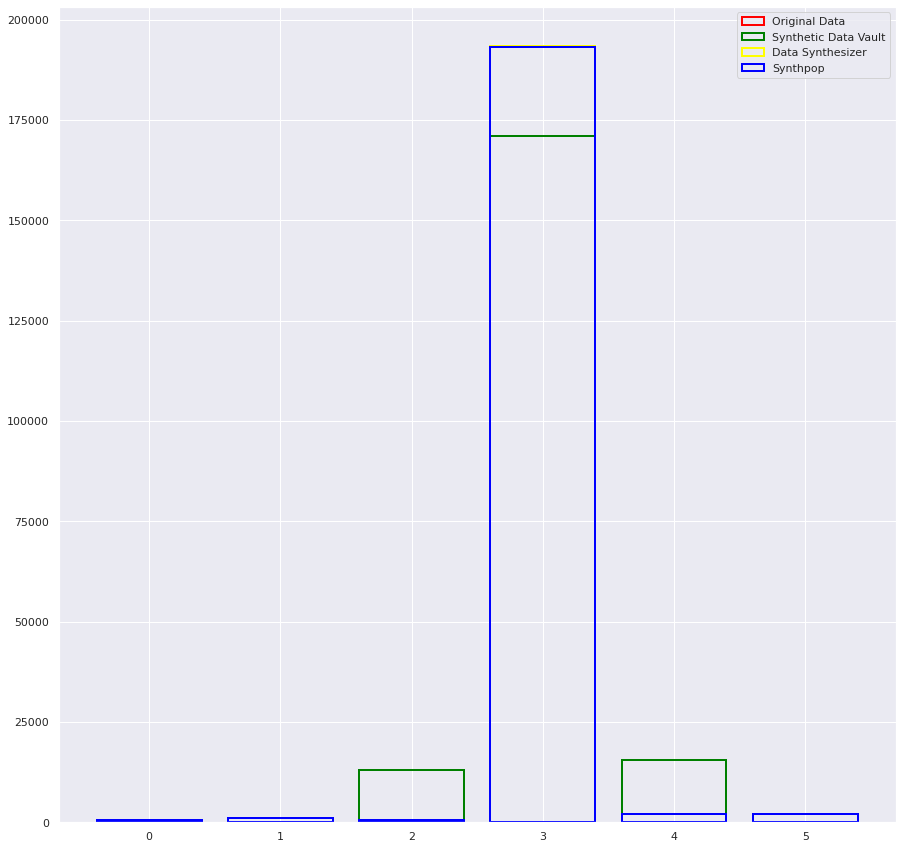

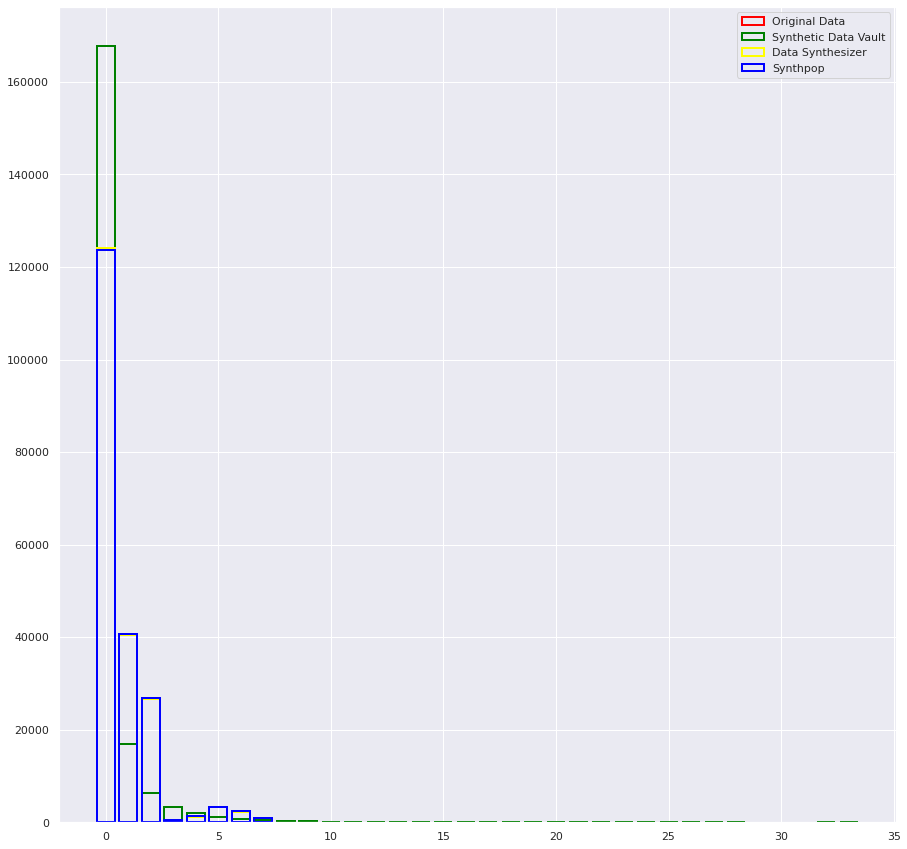

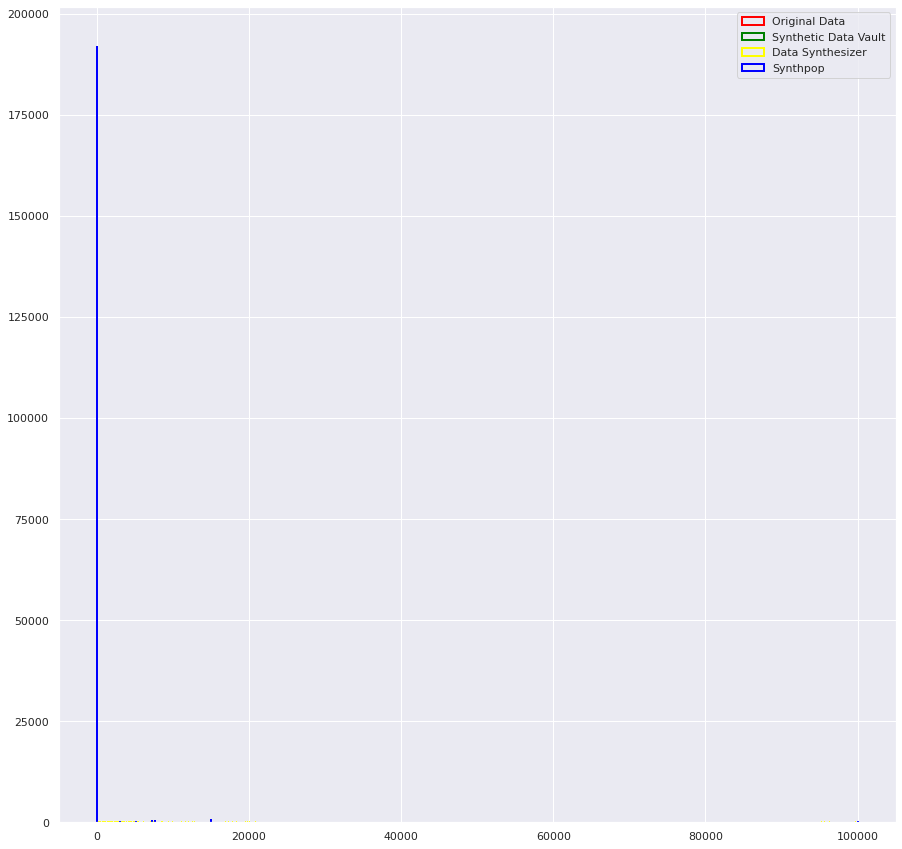

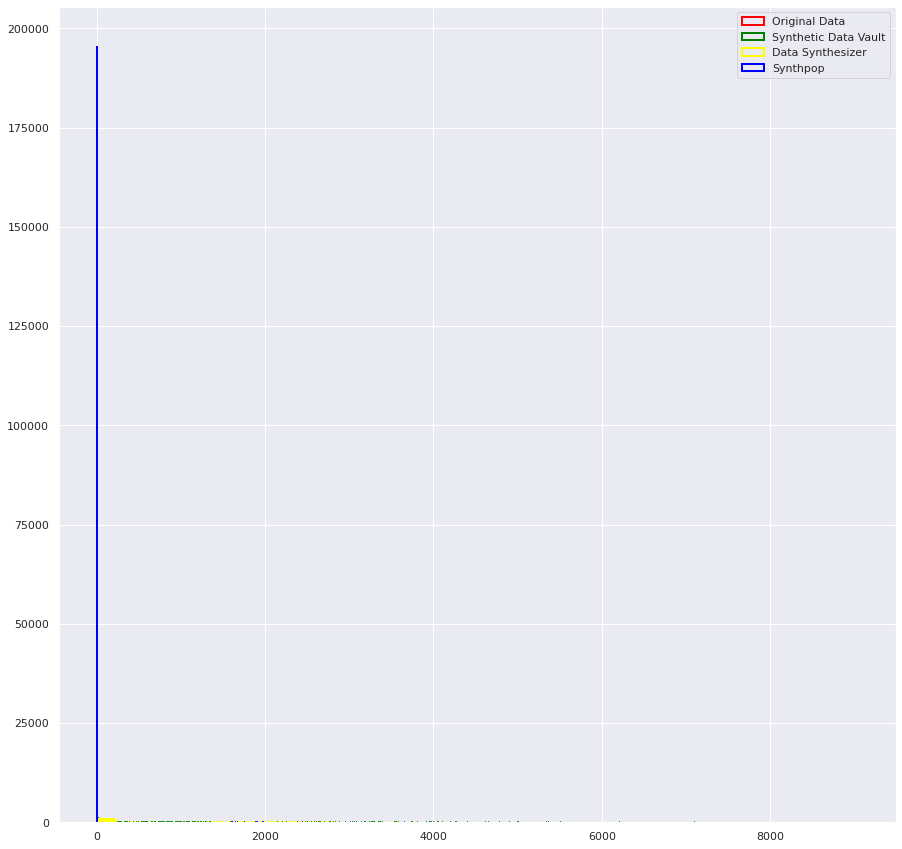

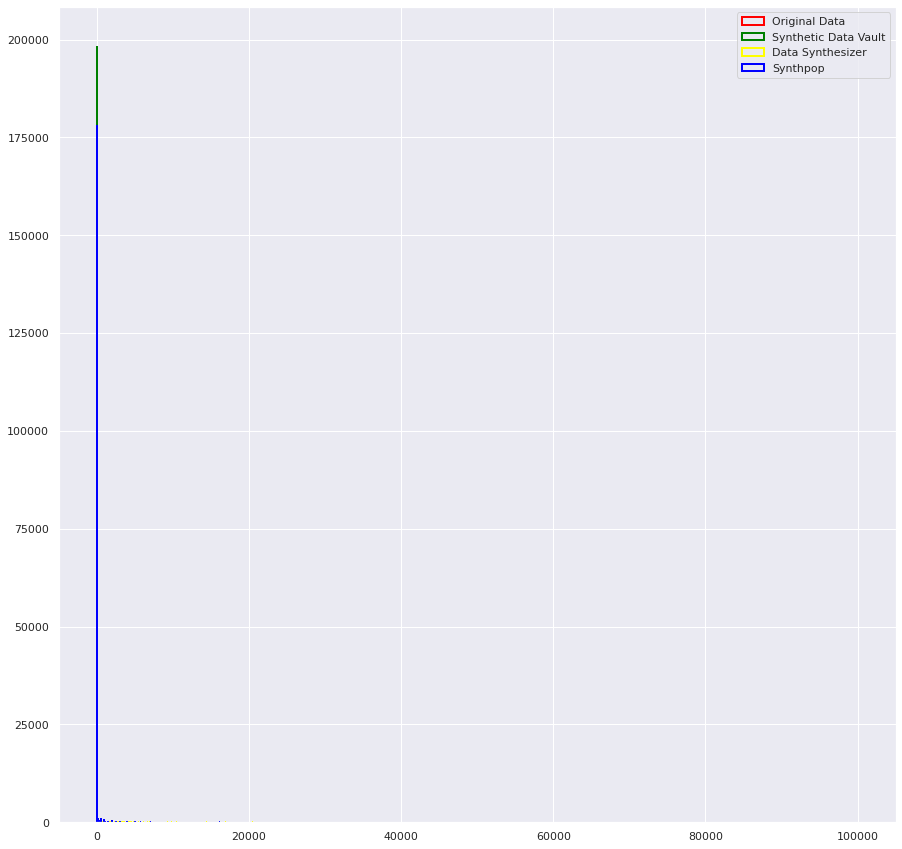

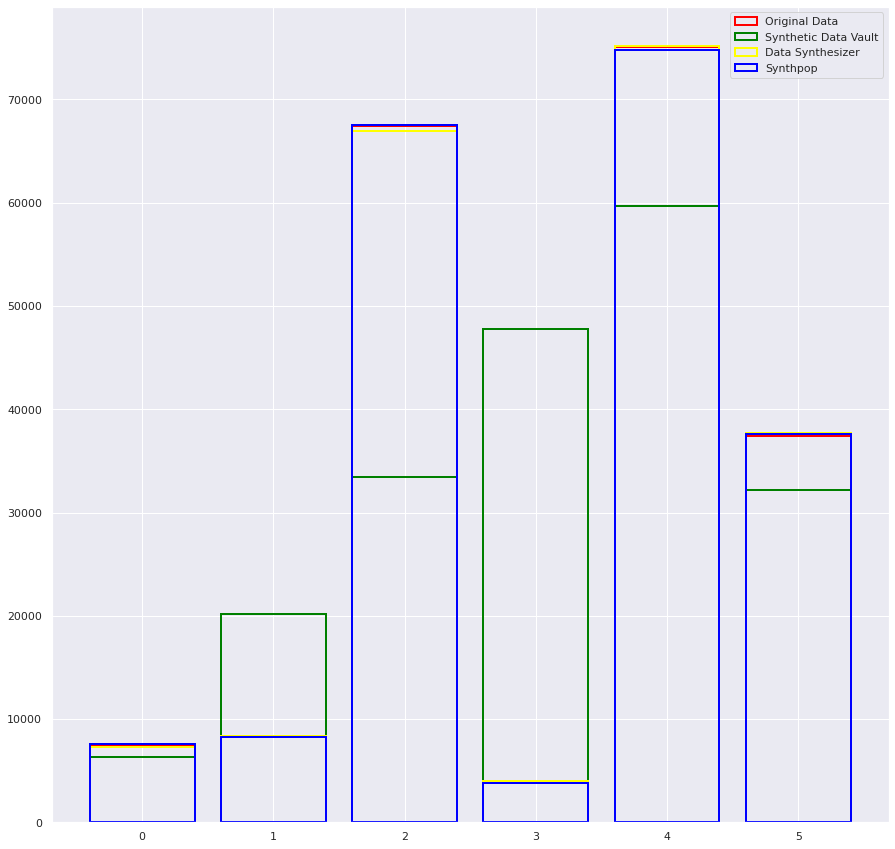

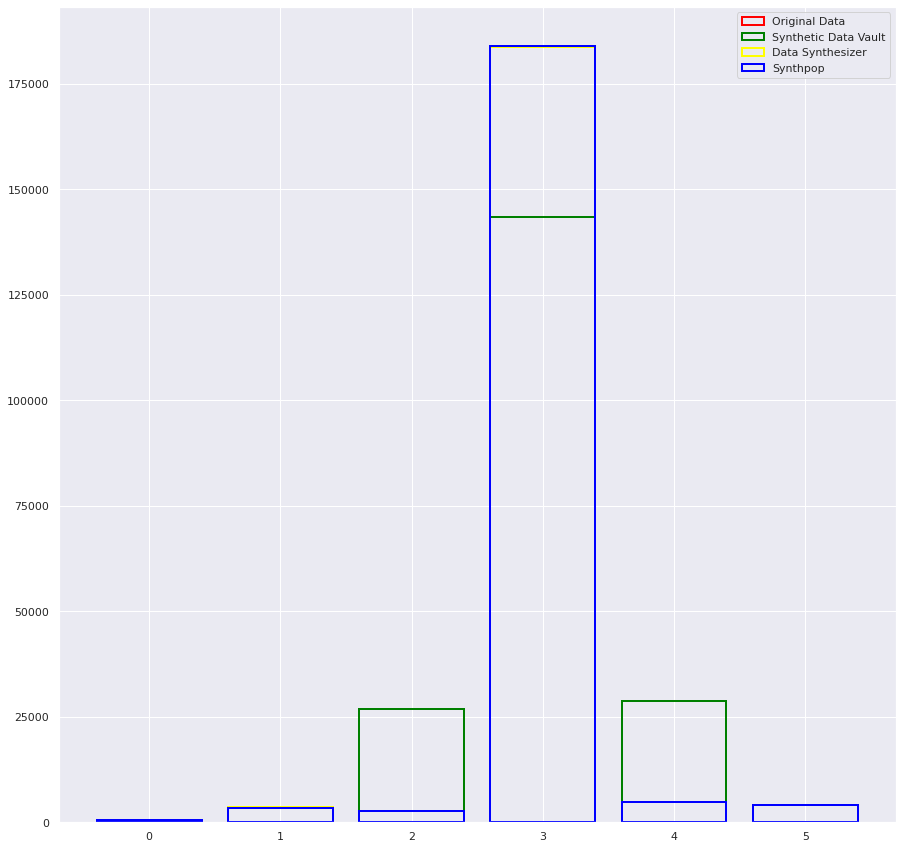

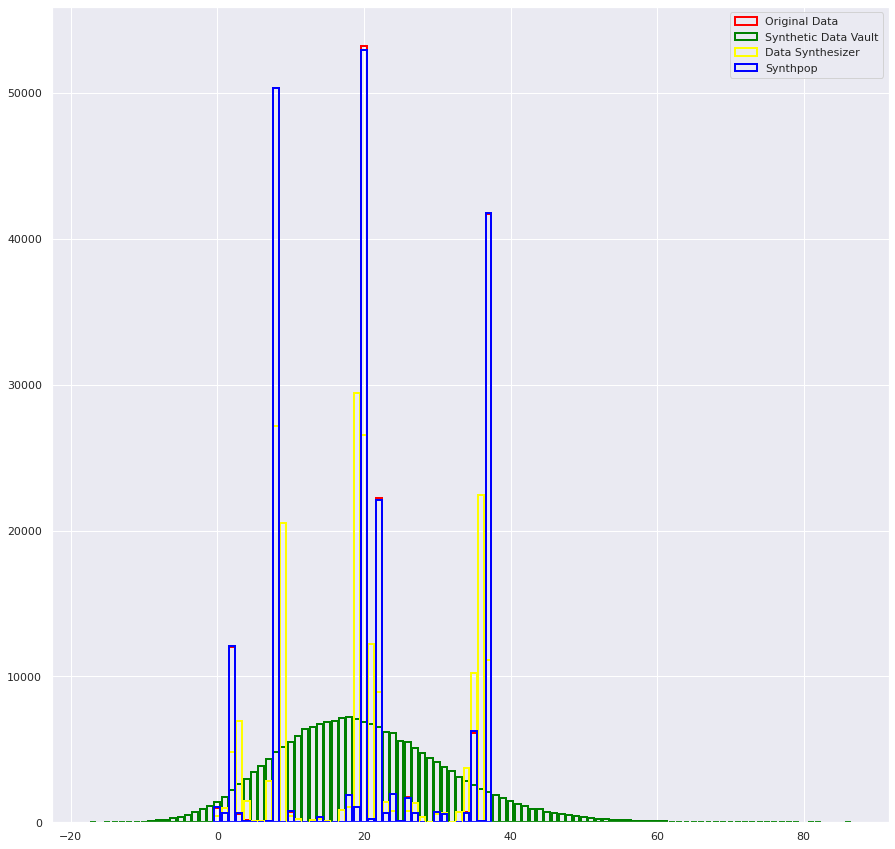

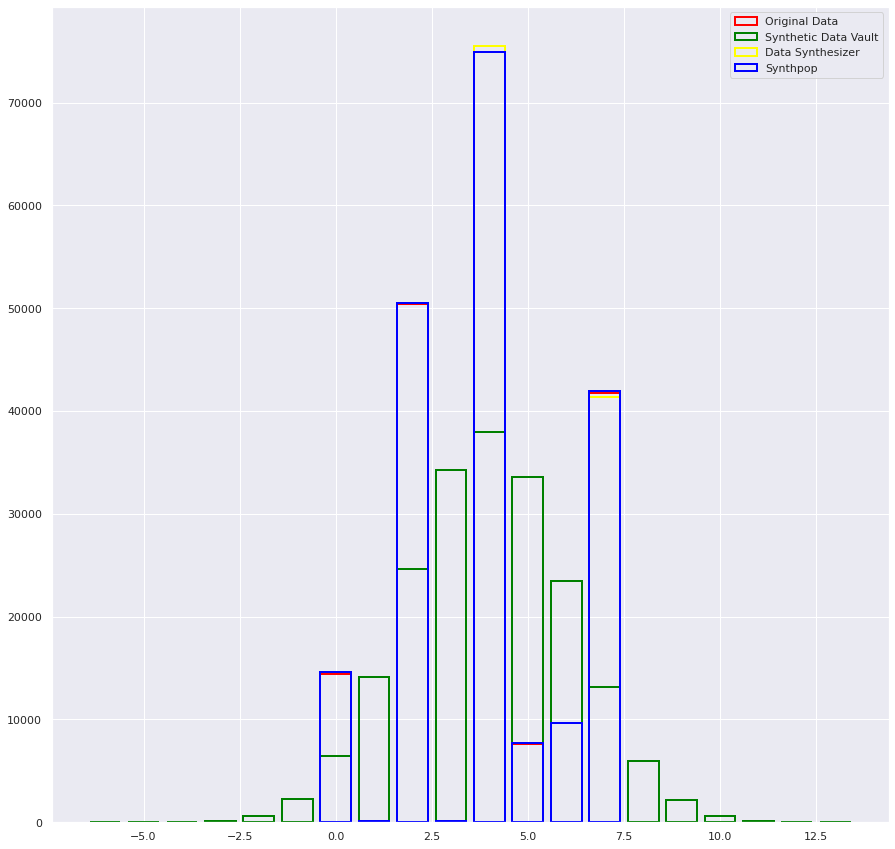

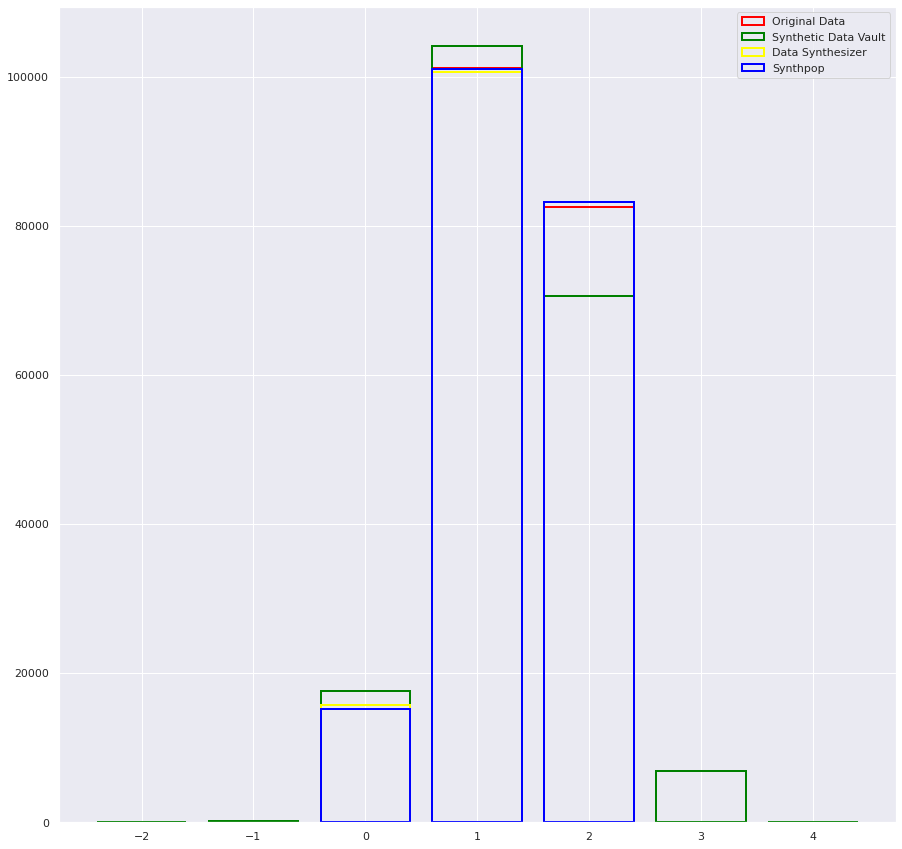

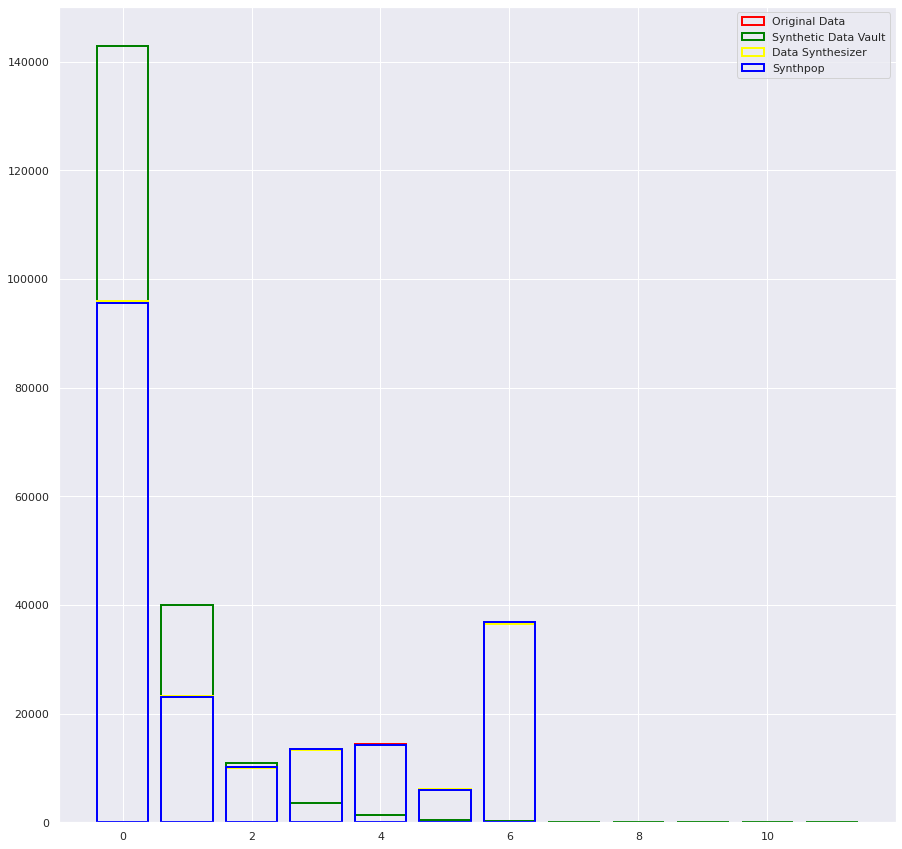

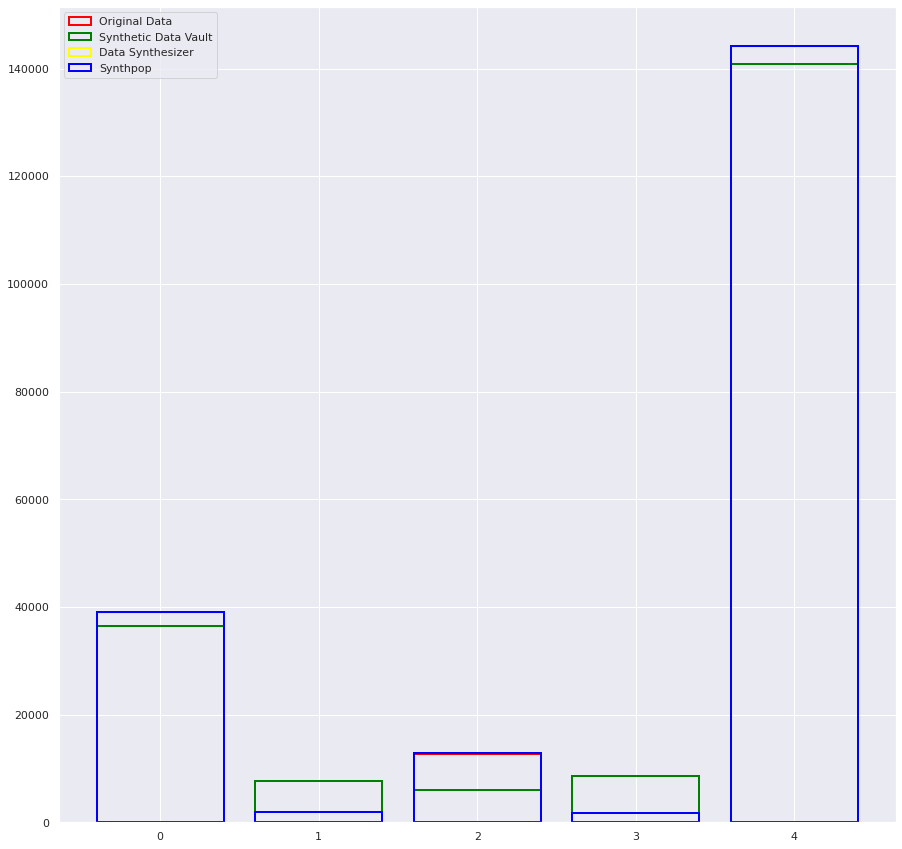

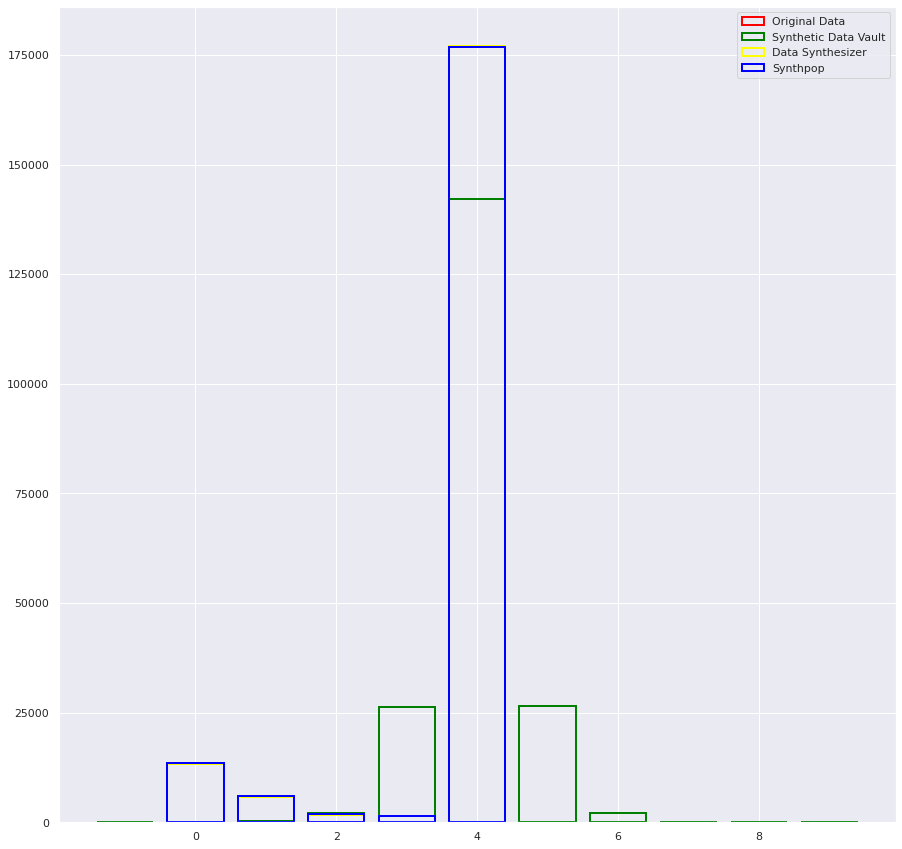

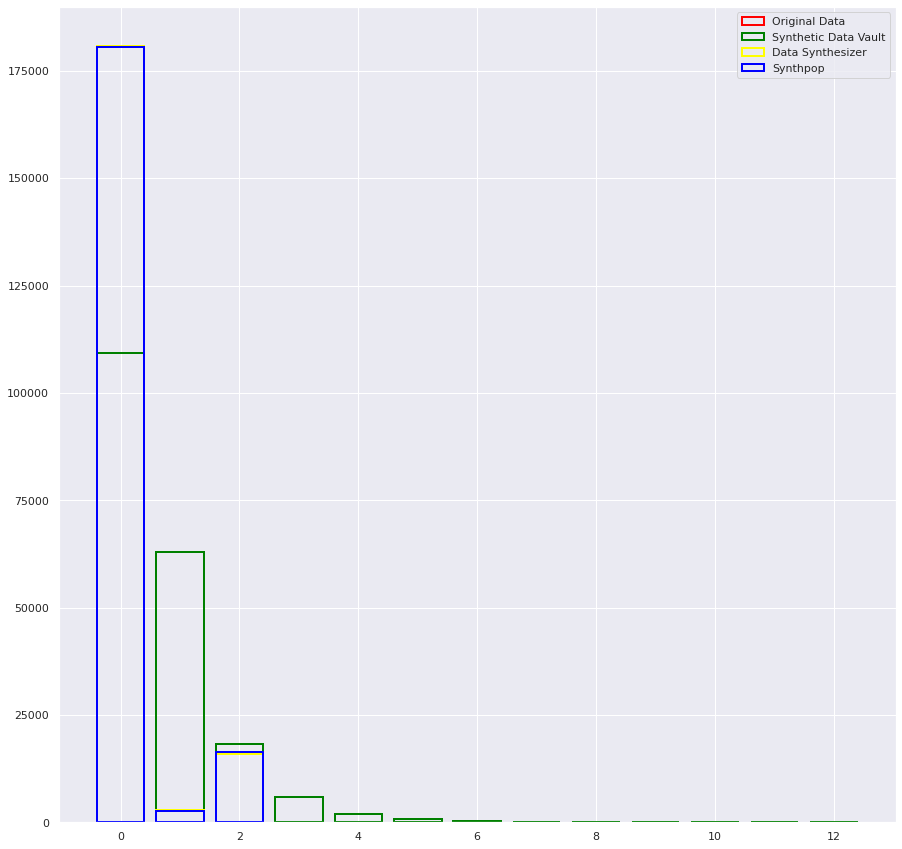

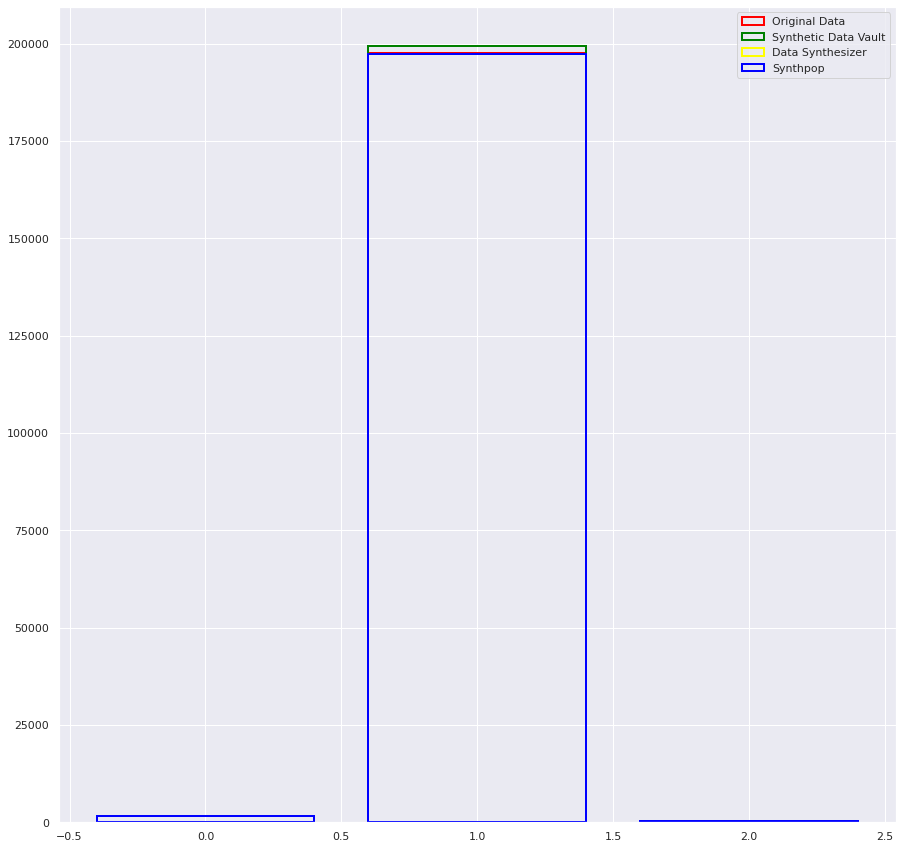

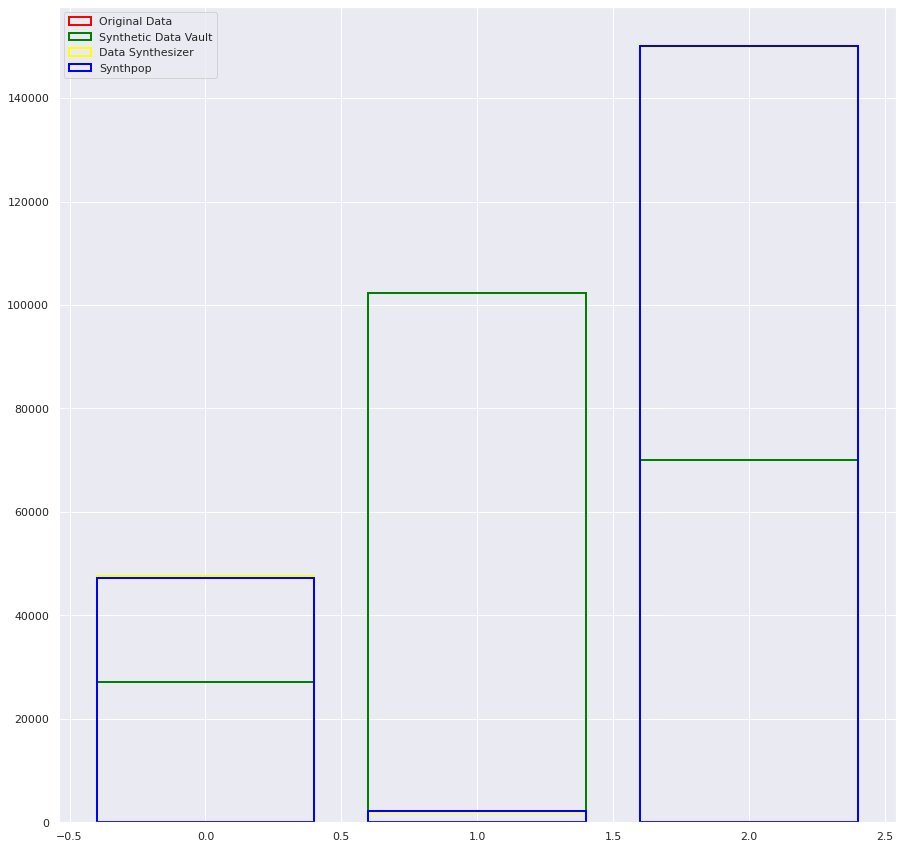

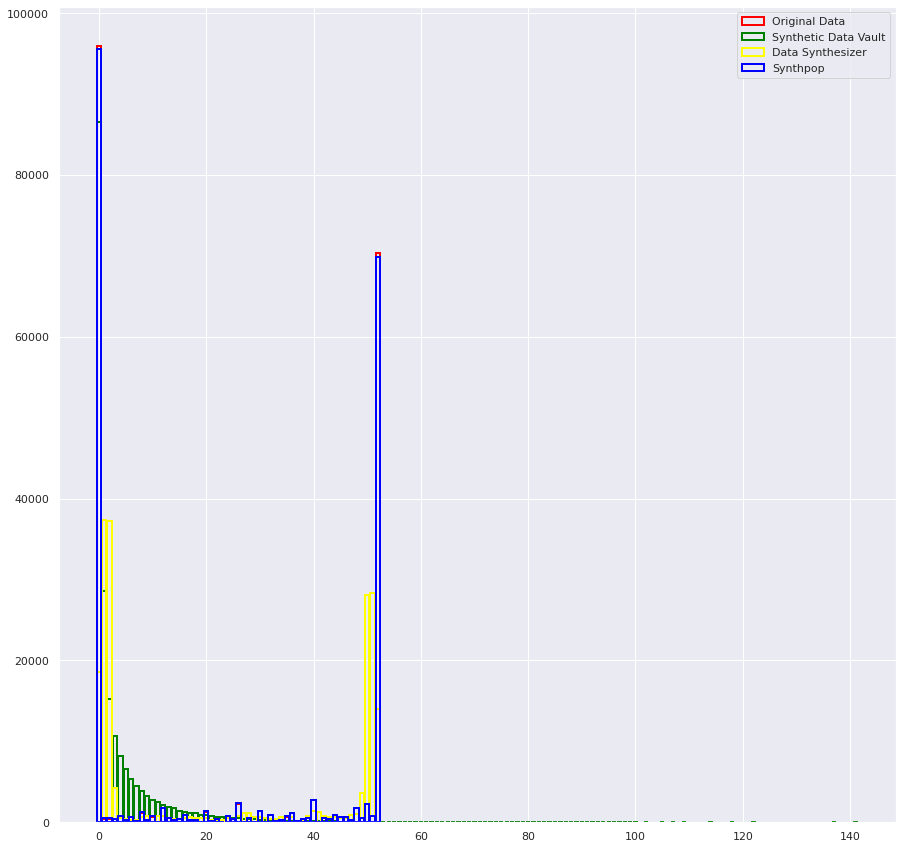

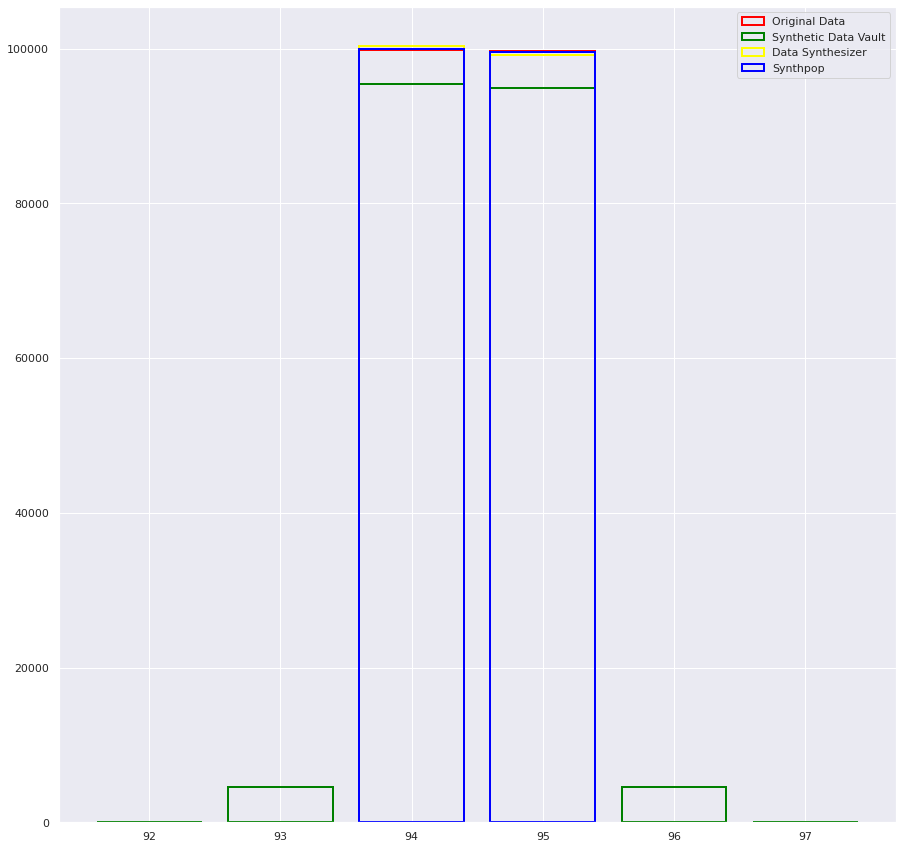

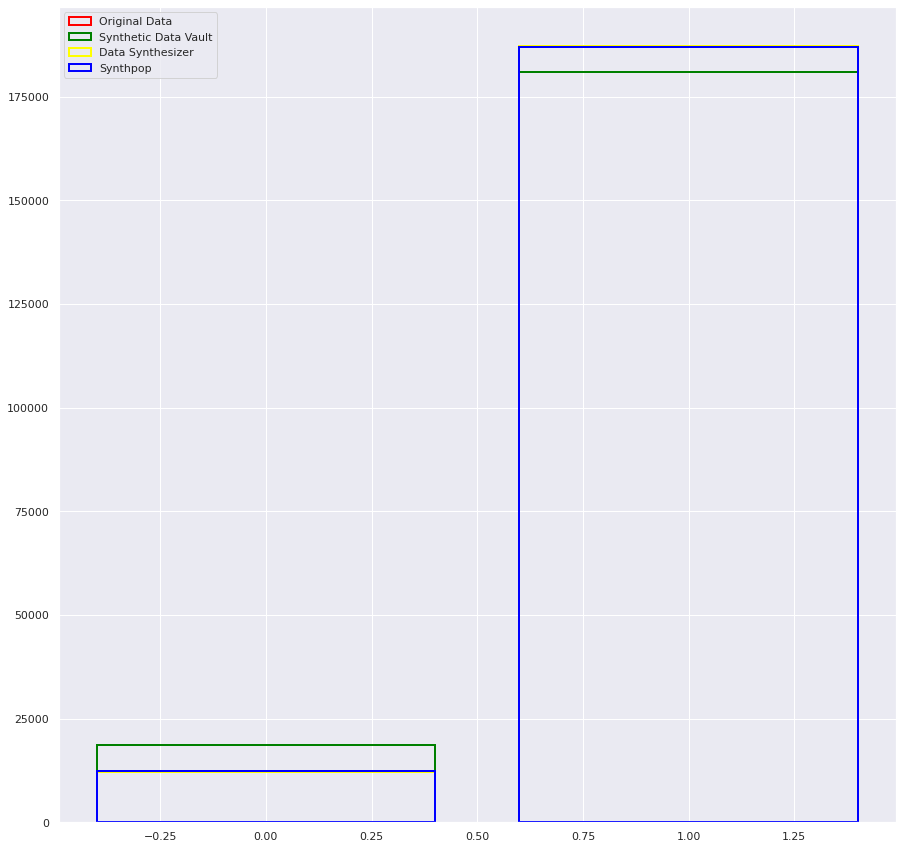

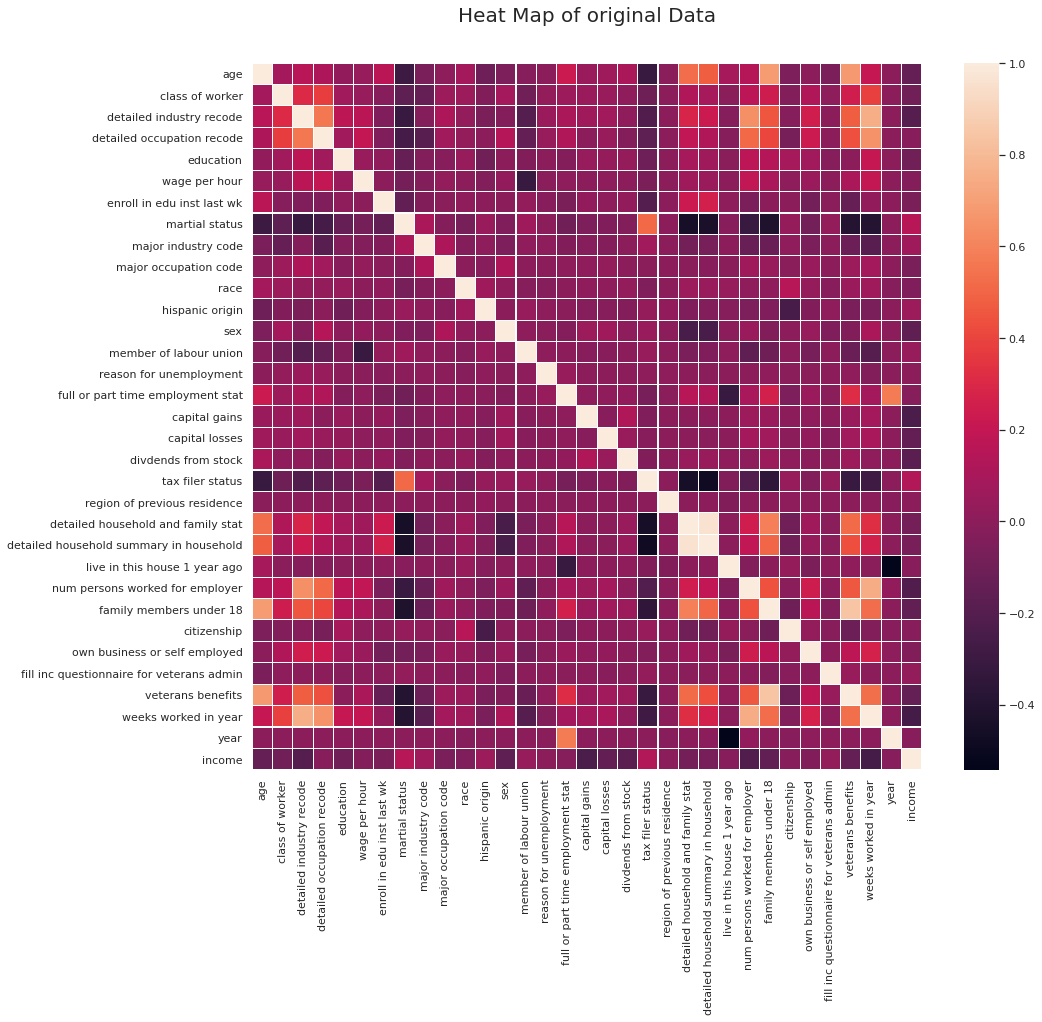

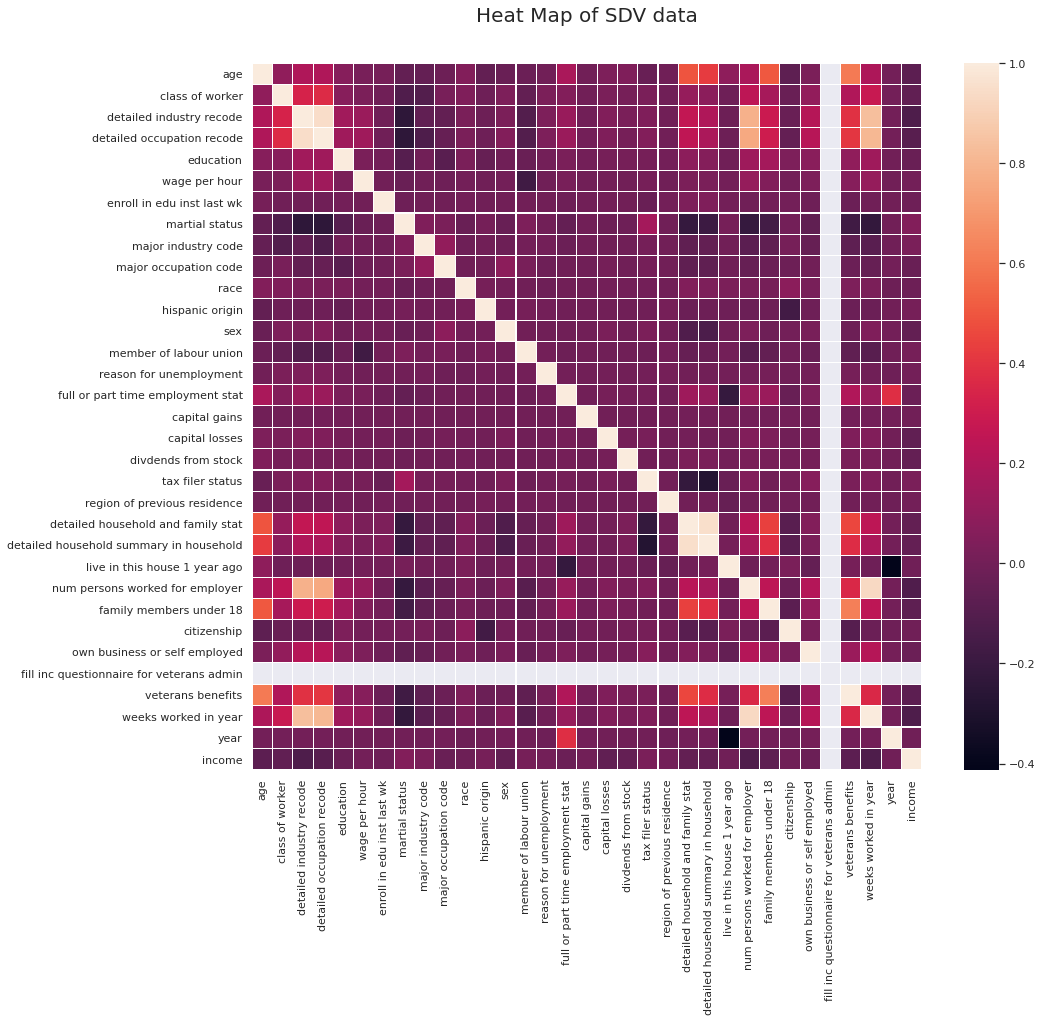

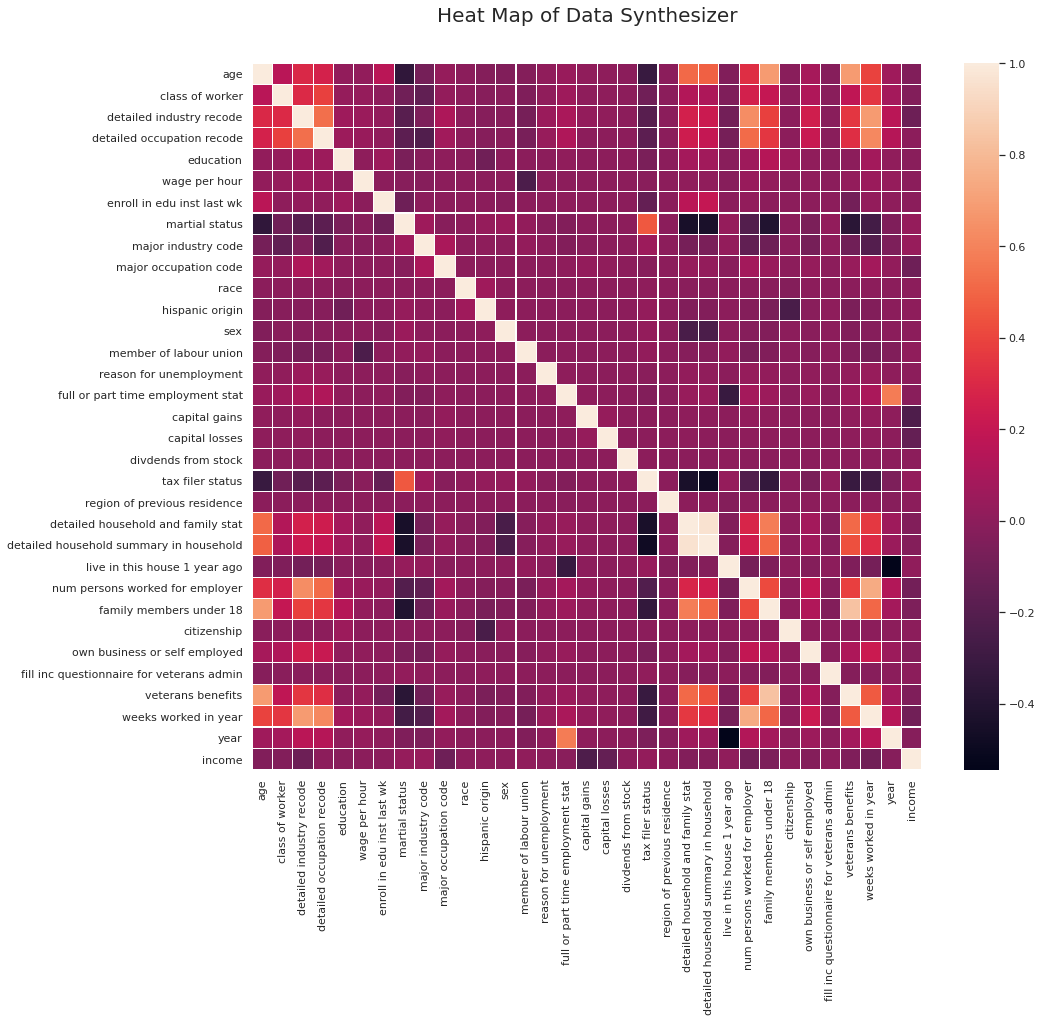

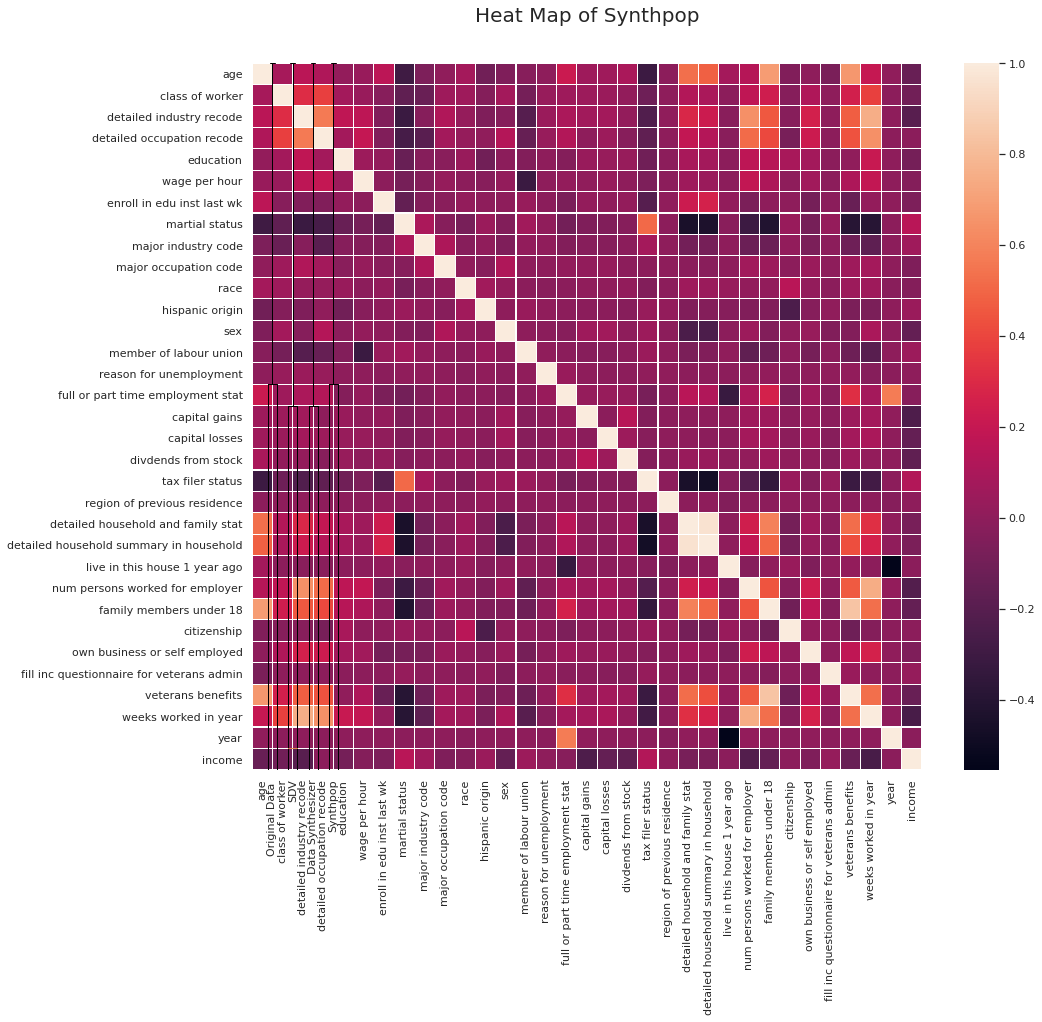

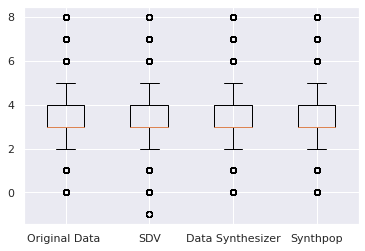

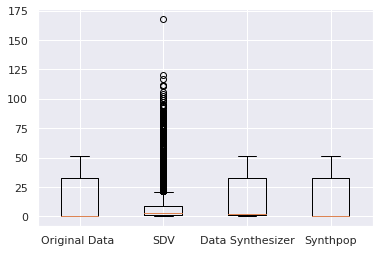

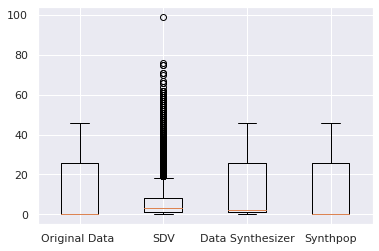

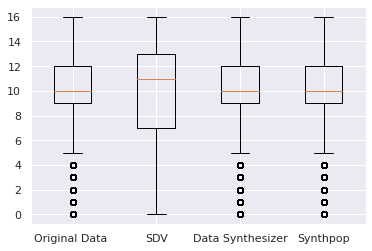

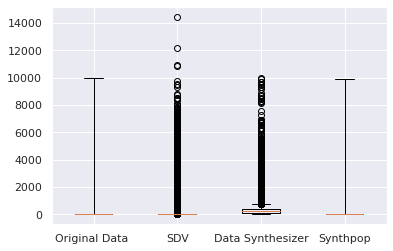

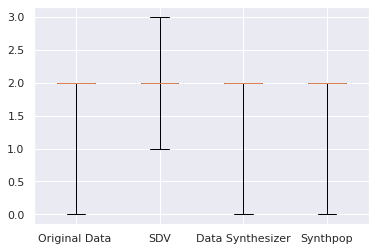

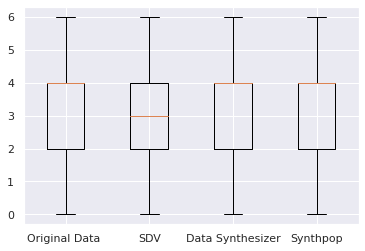

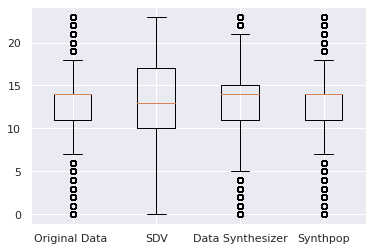

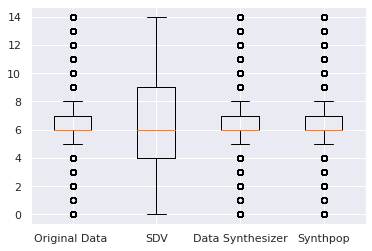

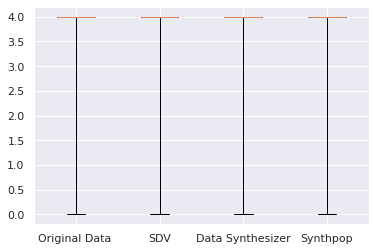

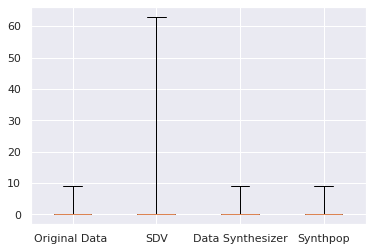

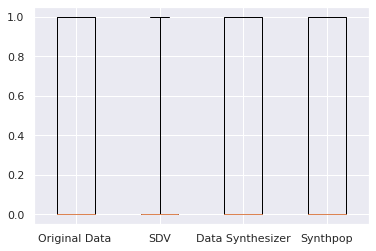

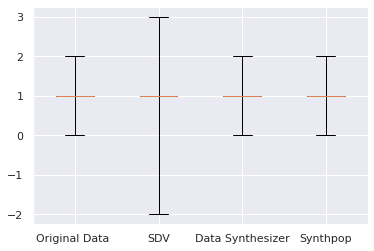

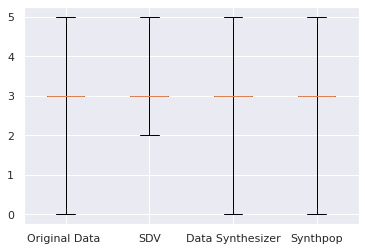

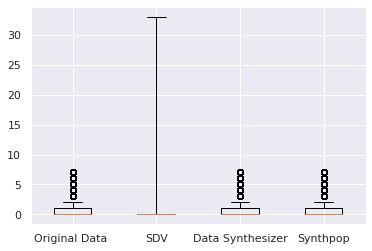

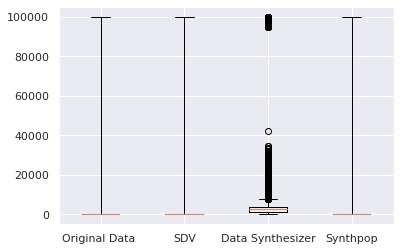

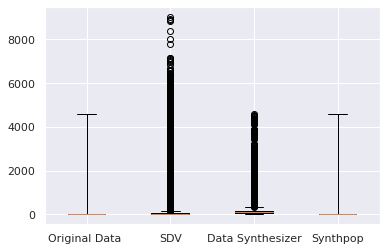

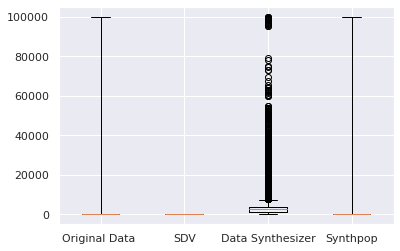

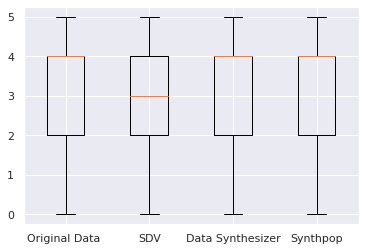

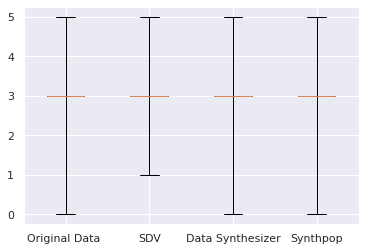

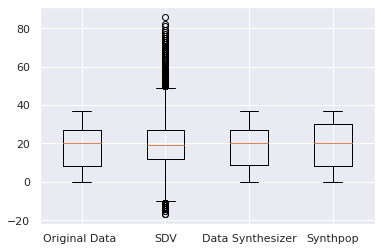

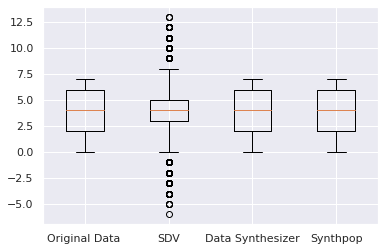

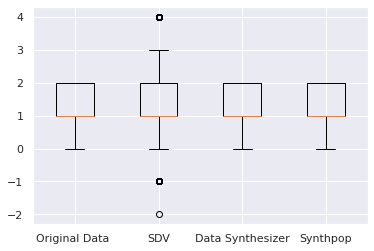

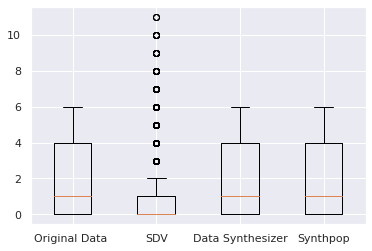

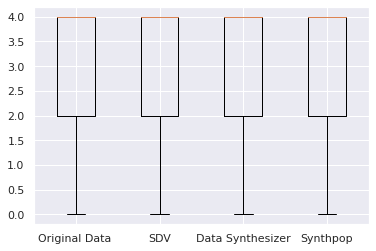

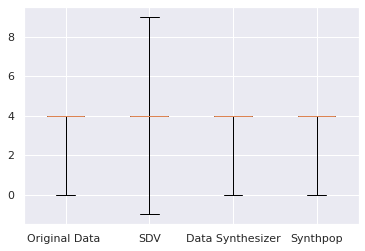

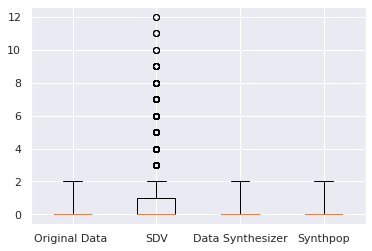

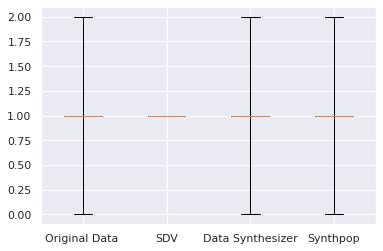

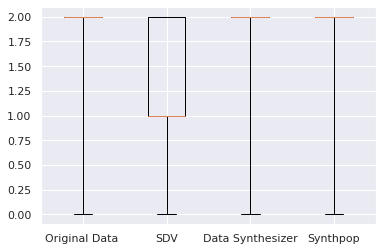

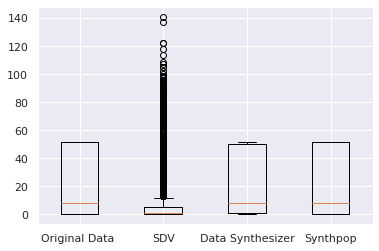

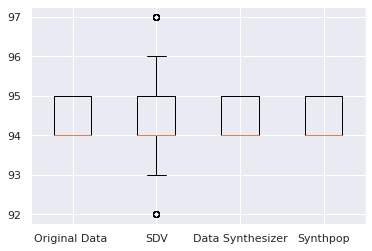

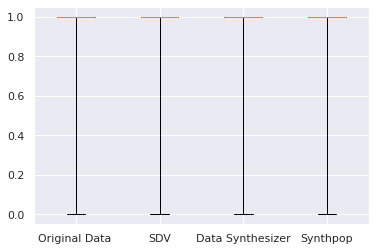

In [ ]:
# Census Data CSV's
data=pd.read_csv('/content/drive/MyDrive/Python Files/Original_data_census.csv').drop('Unnamed: 0',axis=1)
s_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/SDV/SDV_TRAIN_DATA.csv').drop('Unnamed: 0',axis=1)
d_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Data Synthesizer/DataSynthesizerCensusTrain.csv')
sp_data=pd.read_csv('/content/drive/MyDrive/CensusTrainData.csv')

# Census Data Charts

#Bar charts
get_census_charts(data,s_data,d_data,sp_data)

#Heat Maps
get_heat_maps(data,s_data,d_data,sp_data)

#Box Plots
get_box_plots(data,s_data,d_data,sp_data)

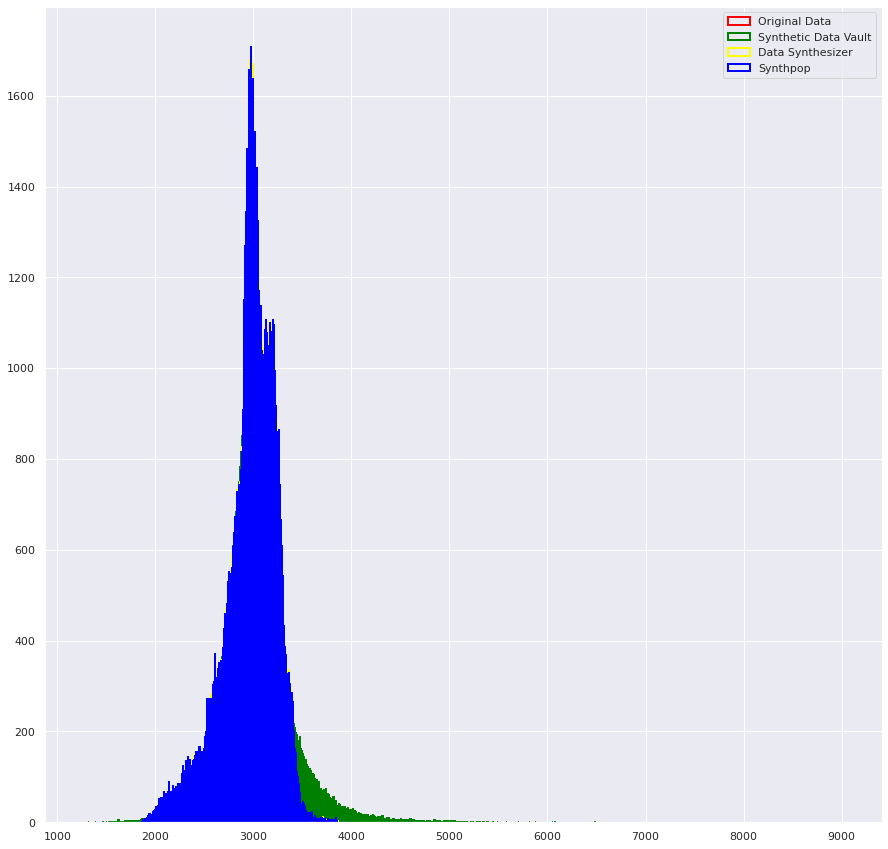

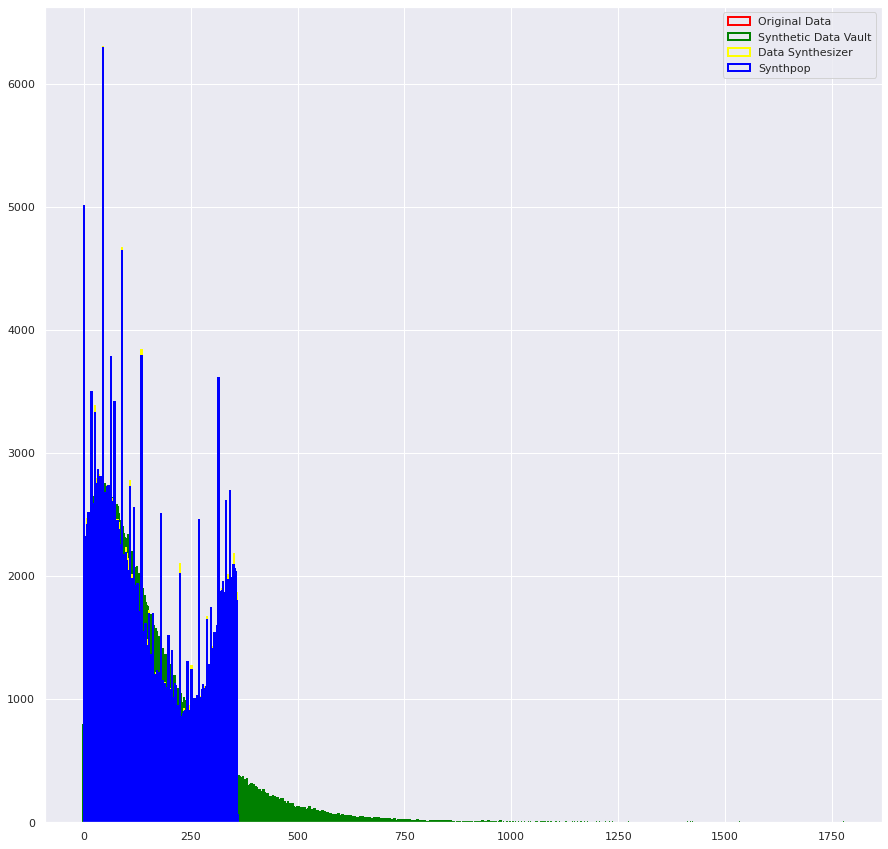

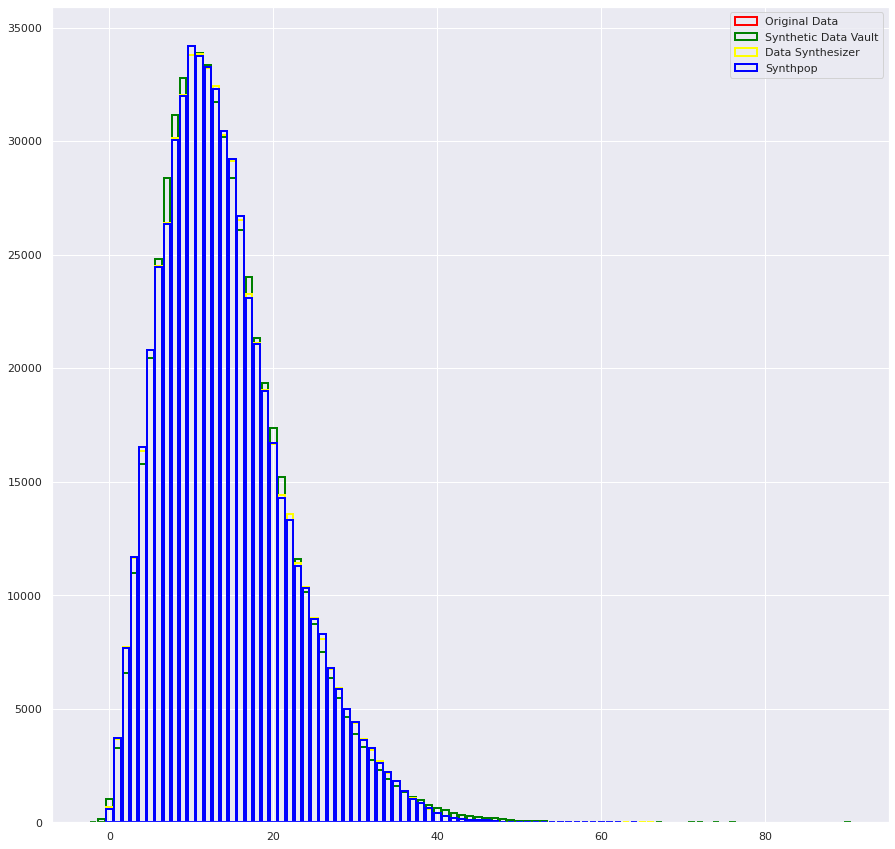

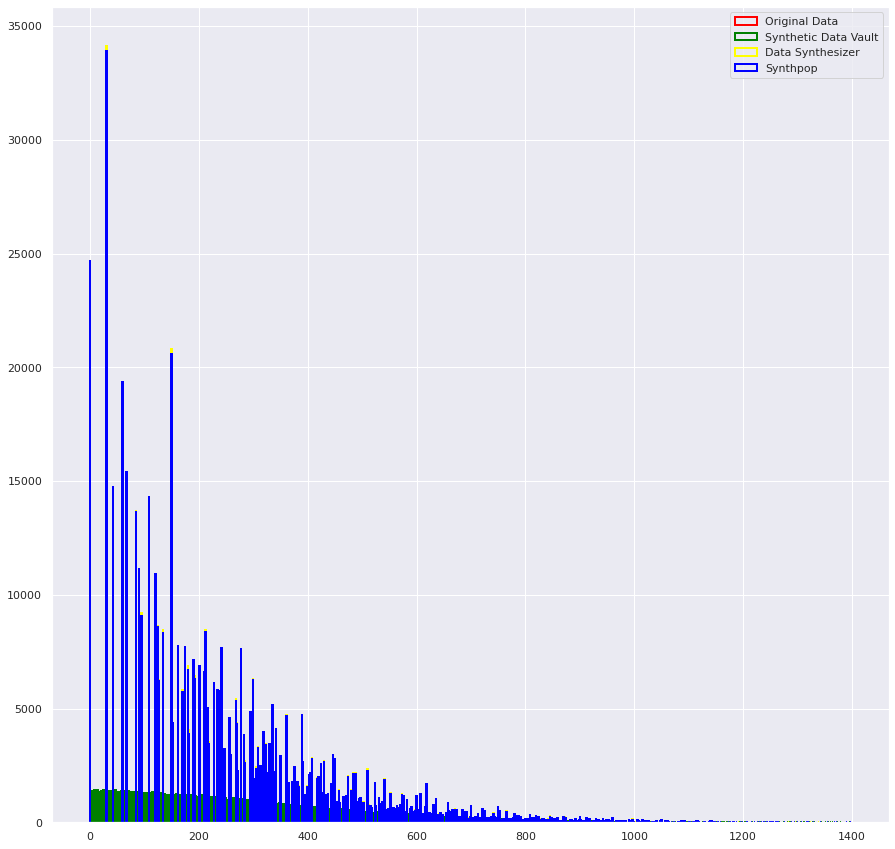

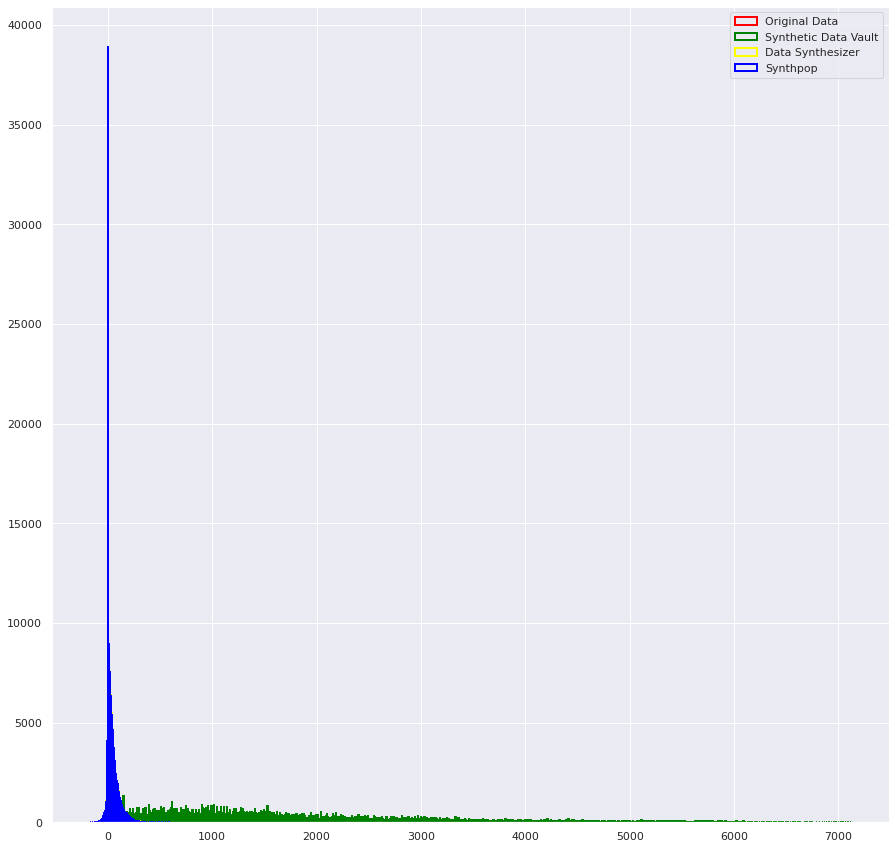

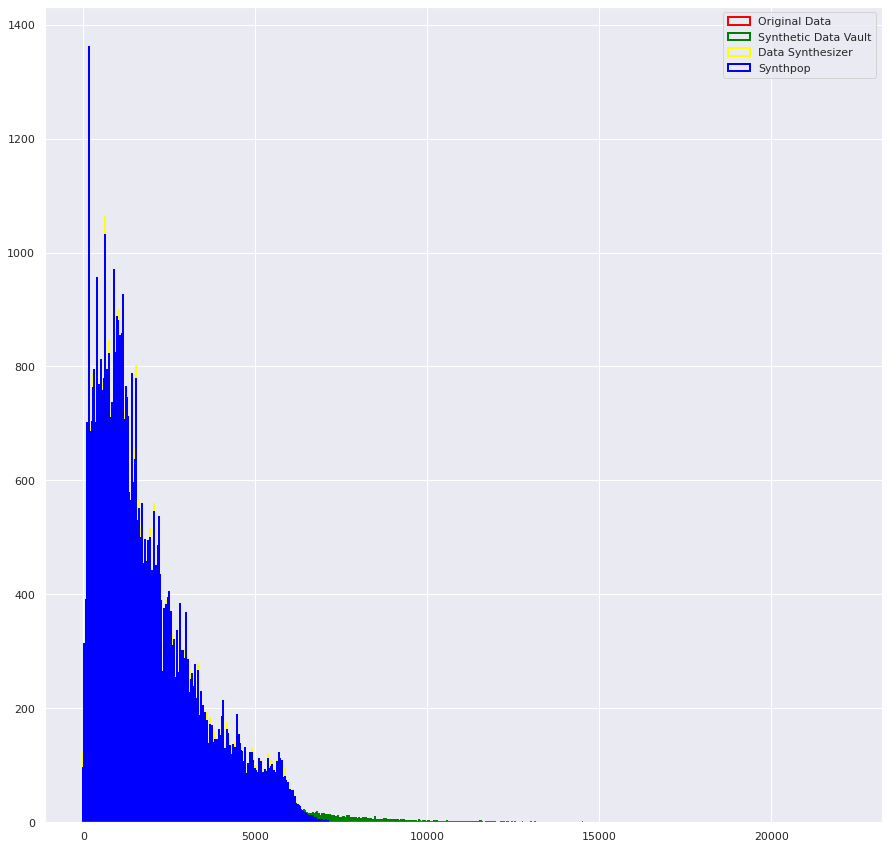

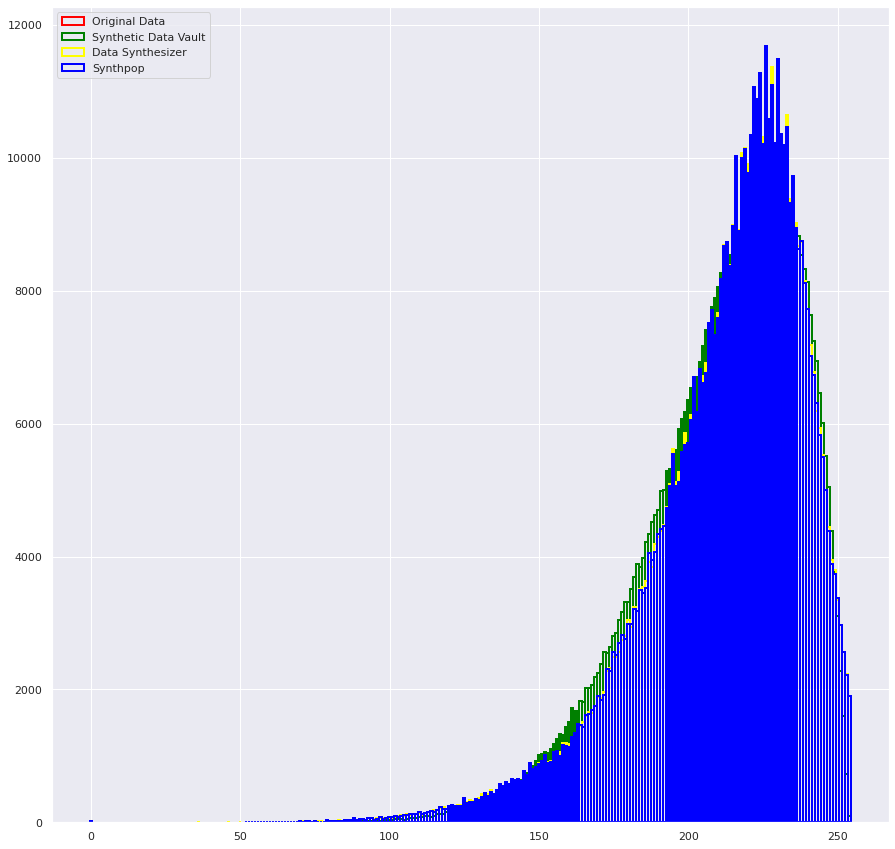

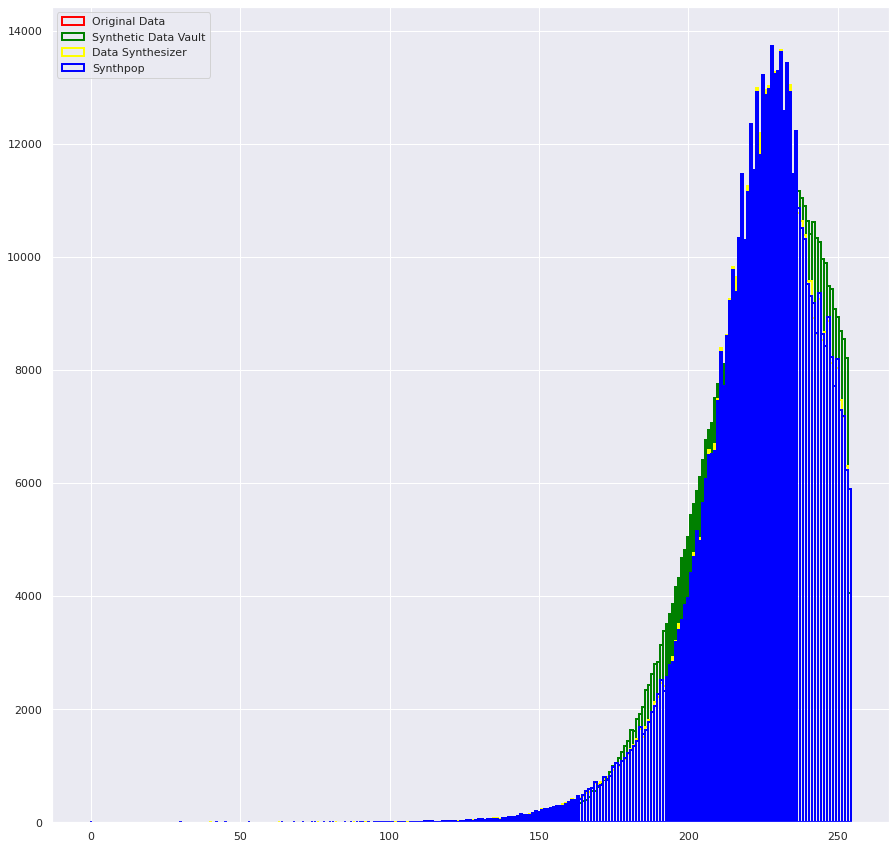

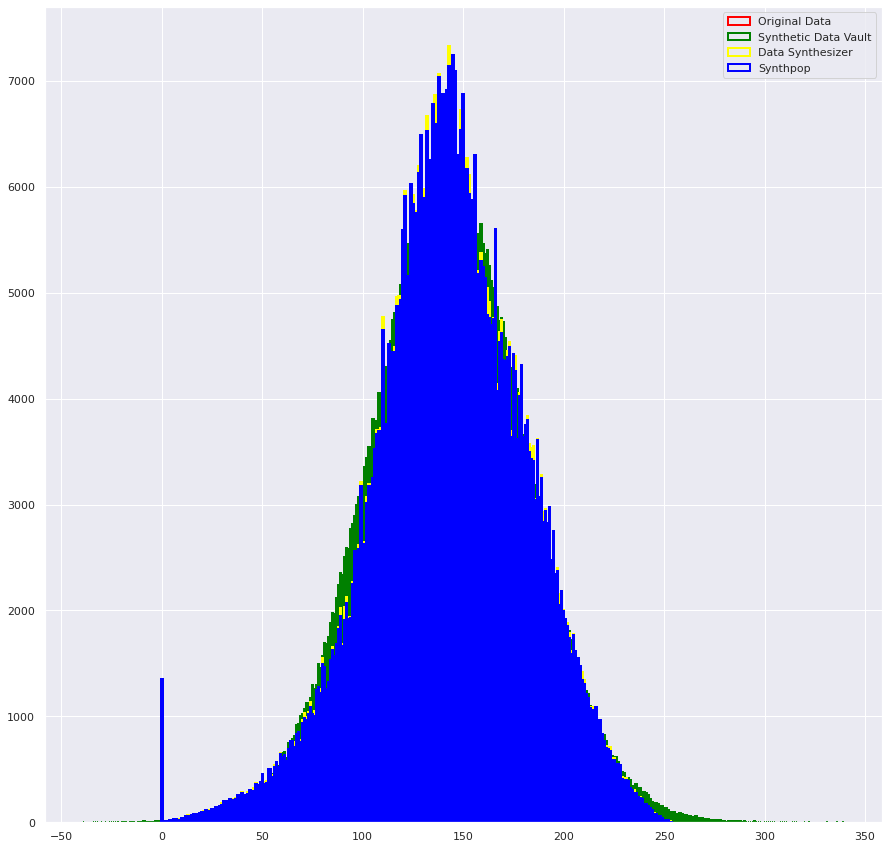

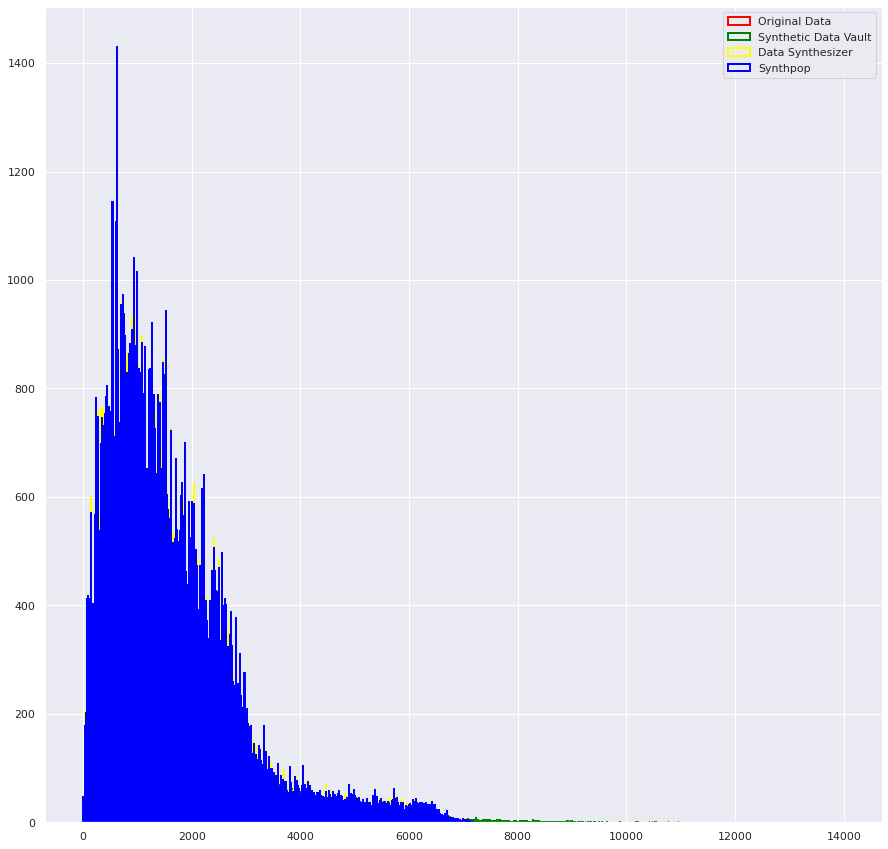

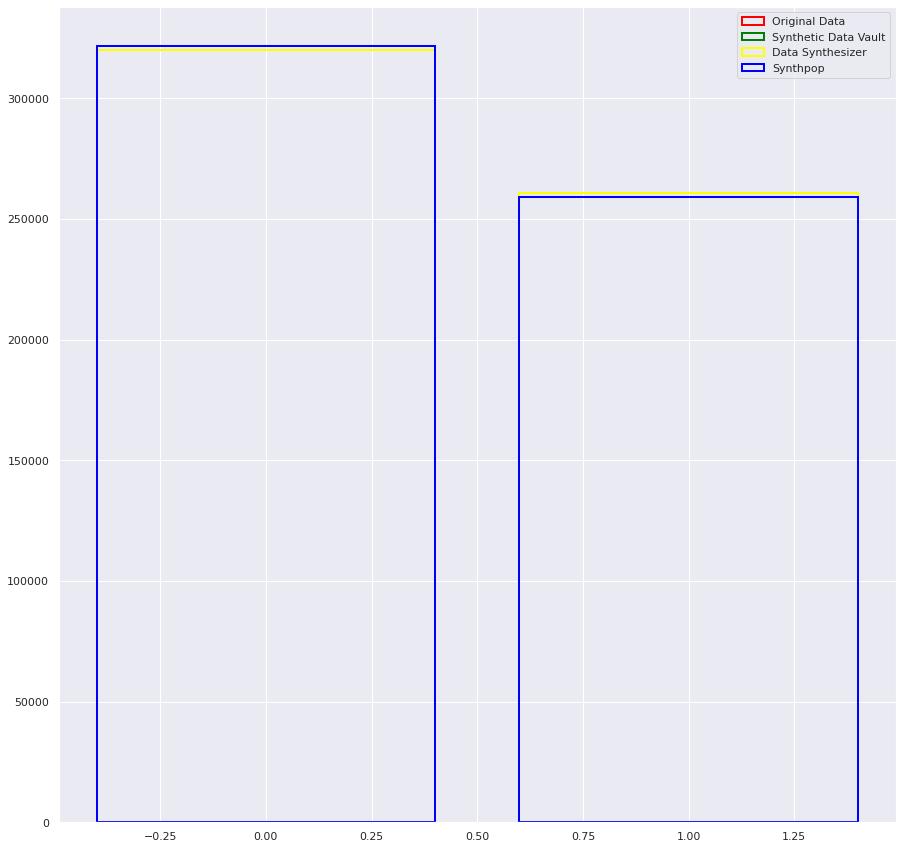

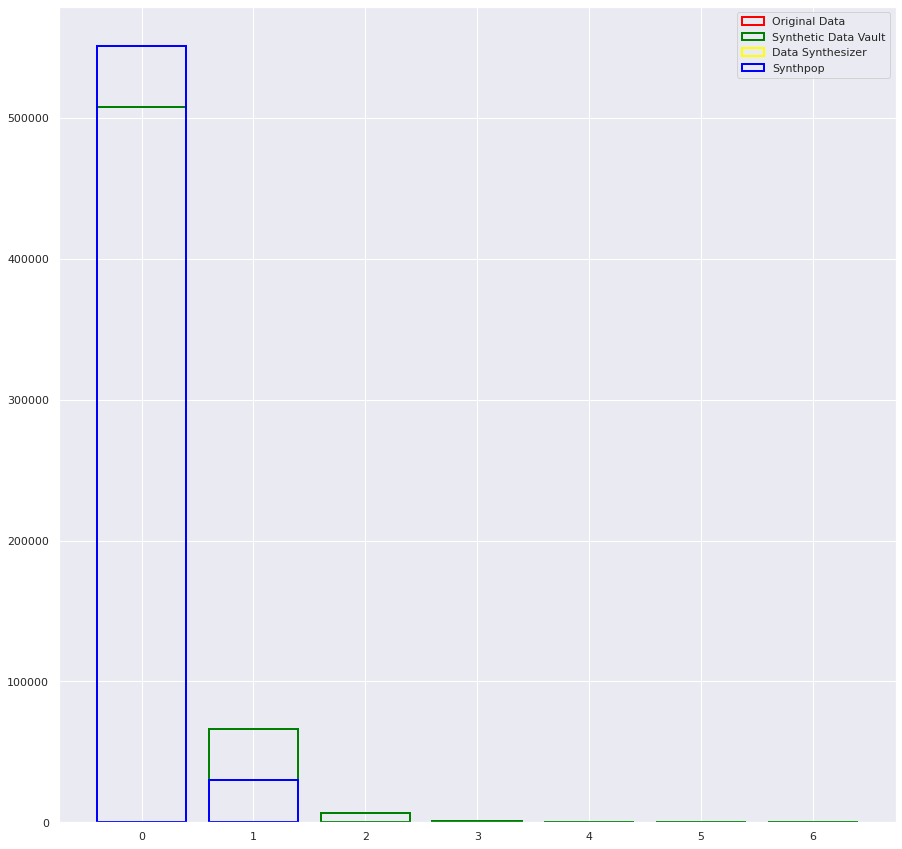

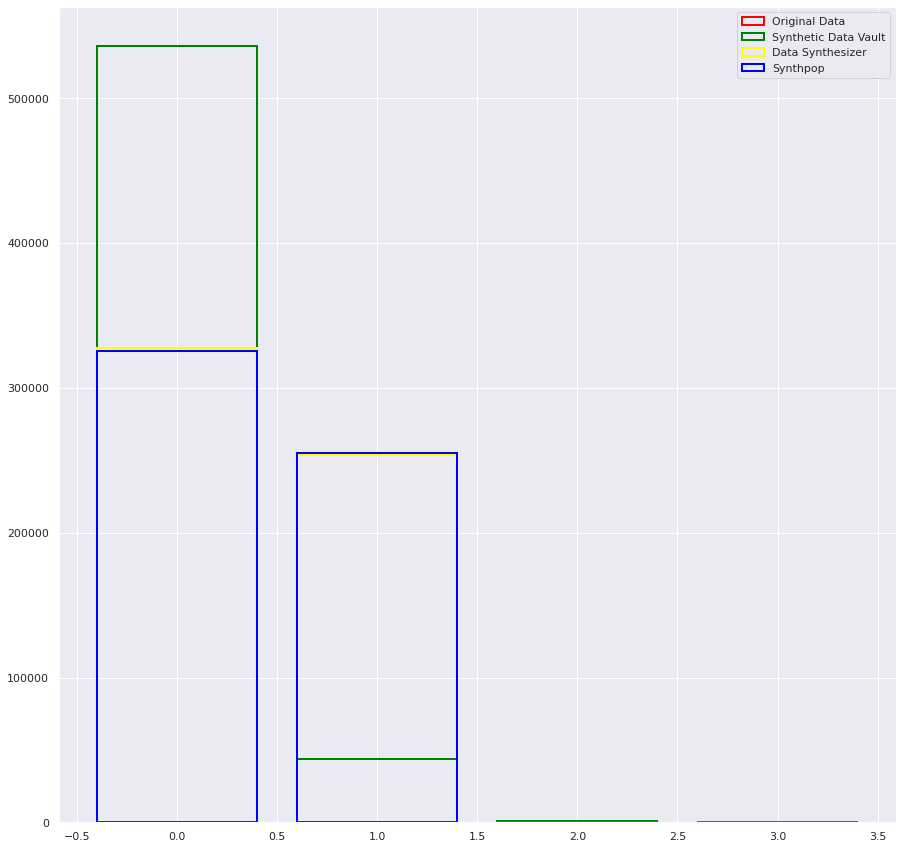

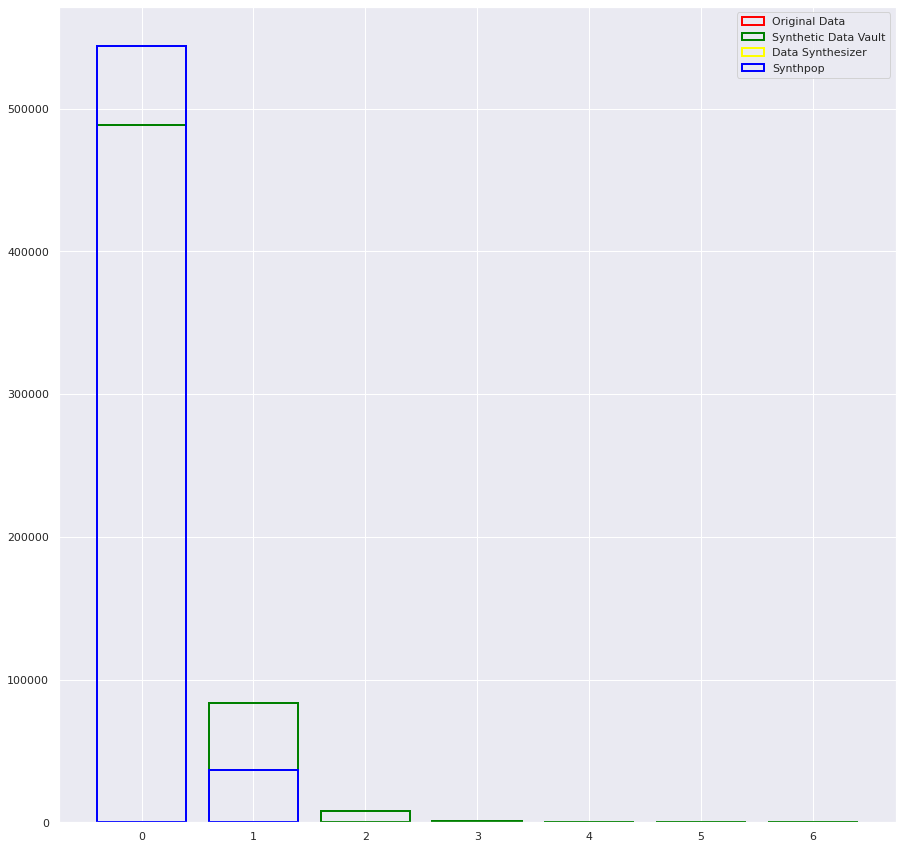

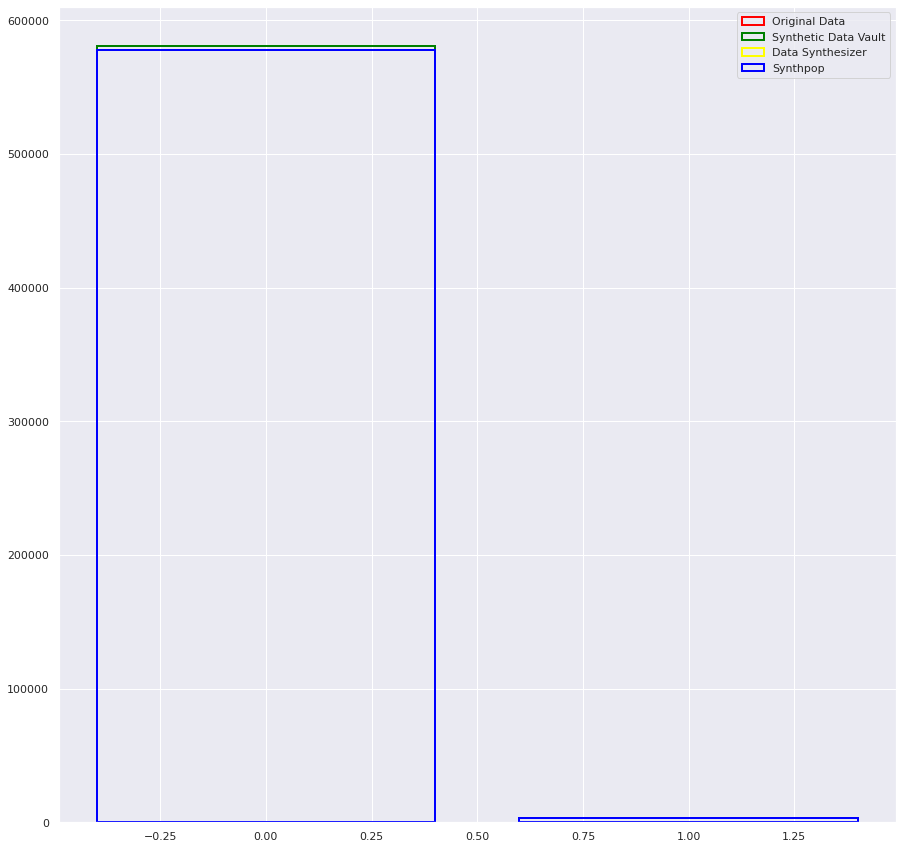

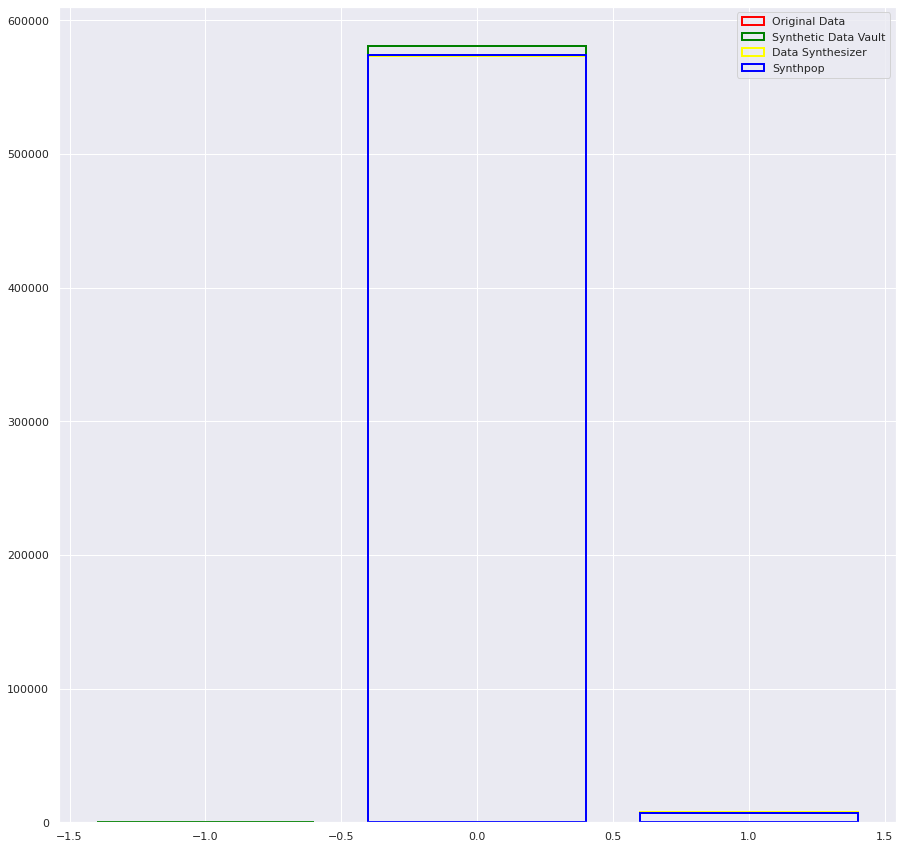

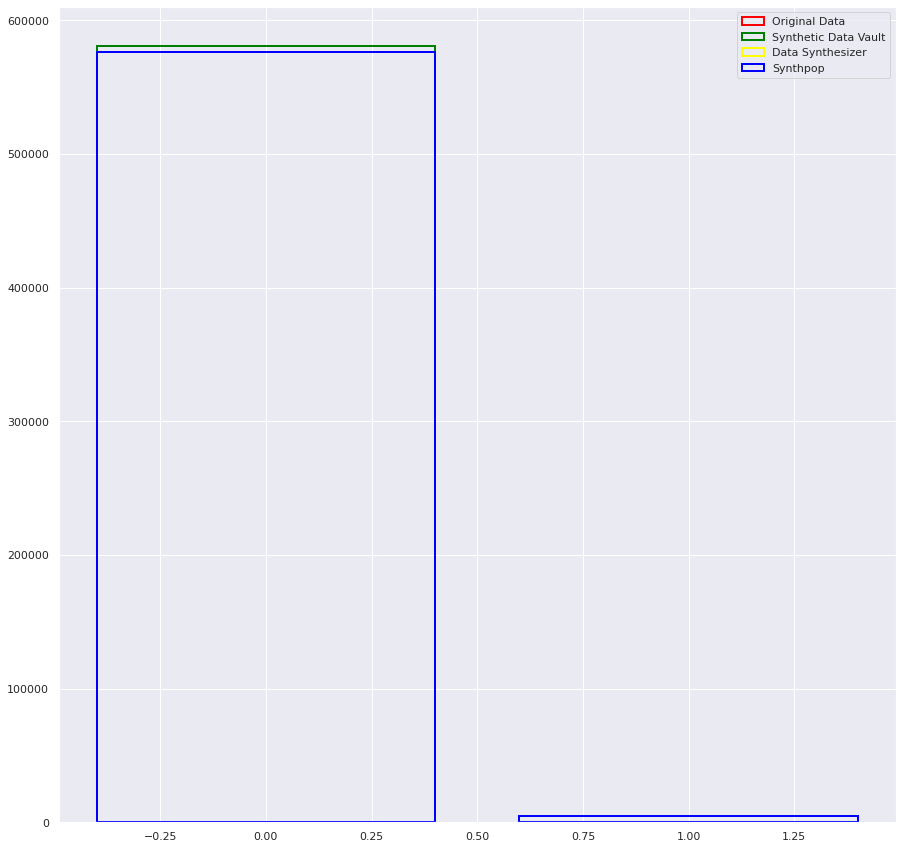

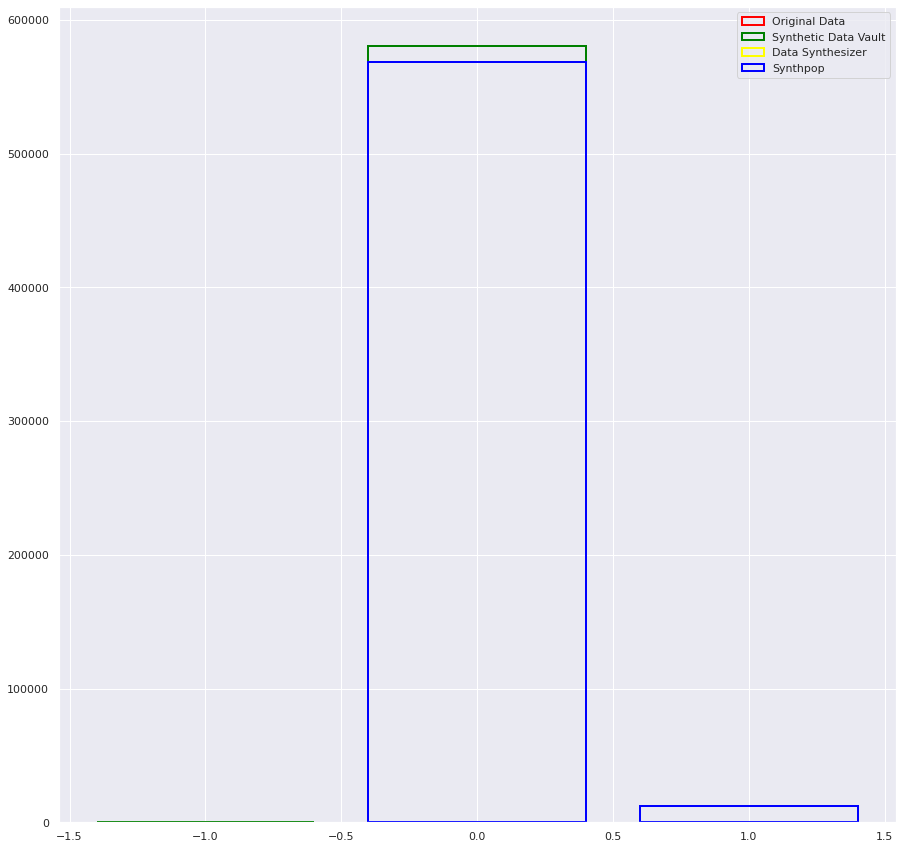

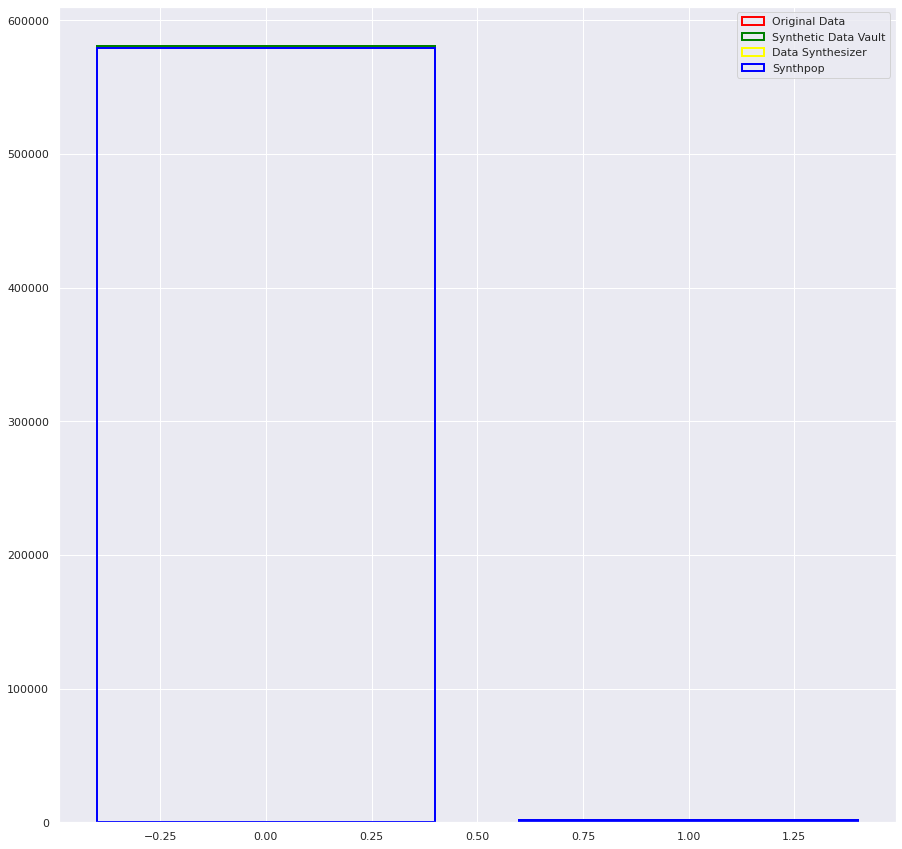

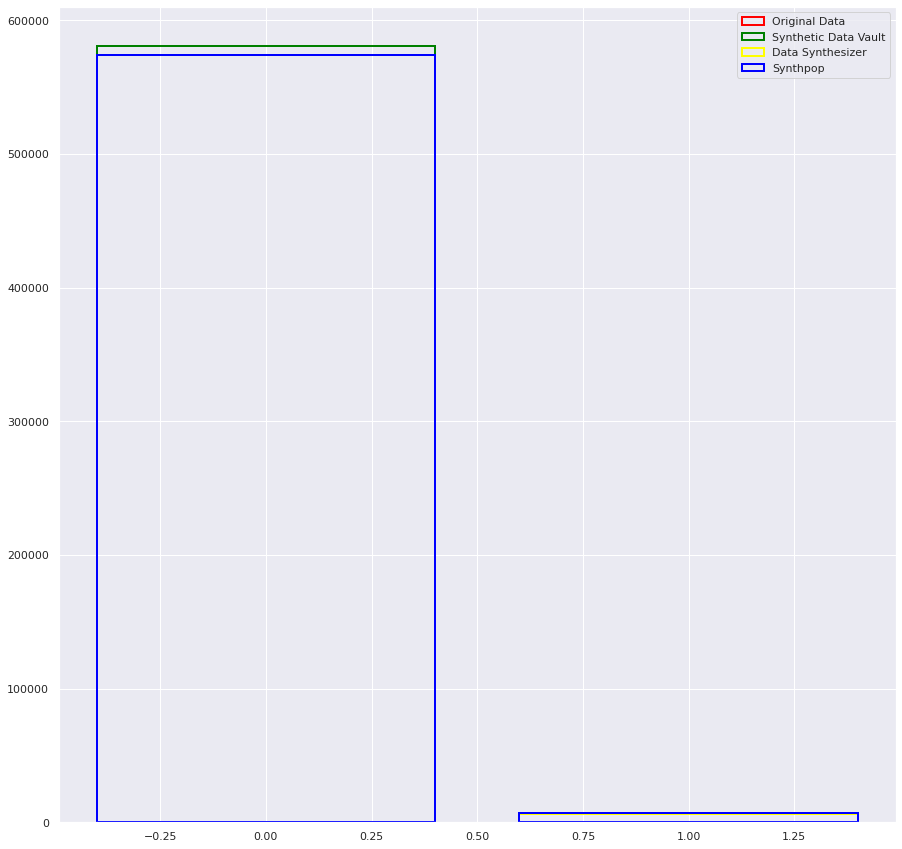

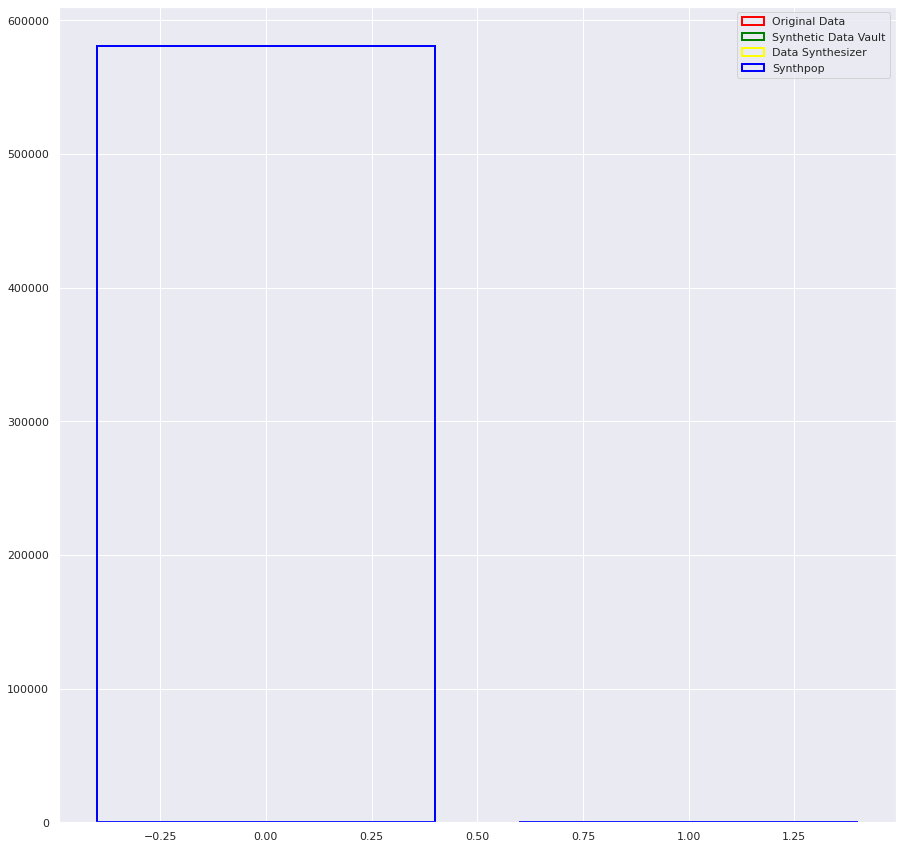

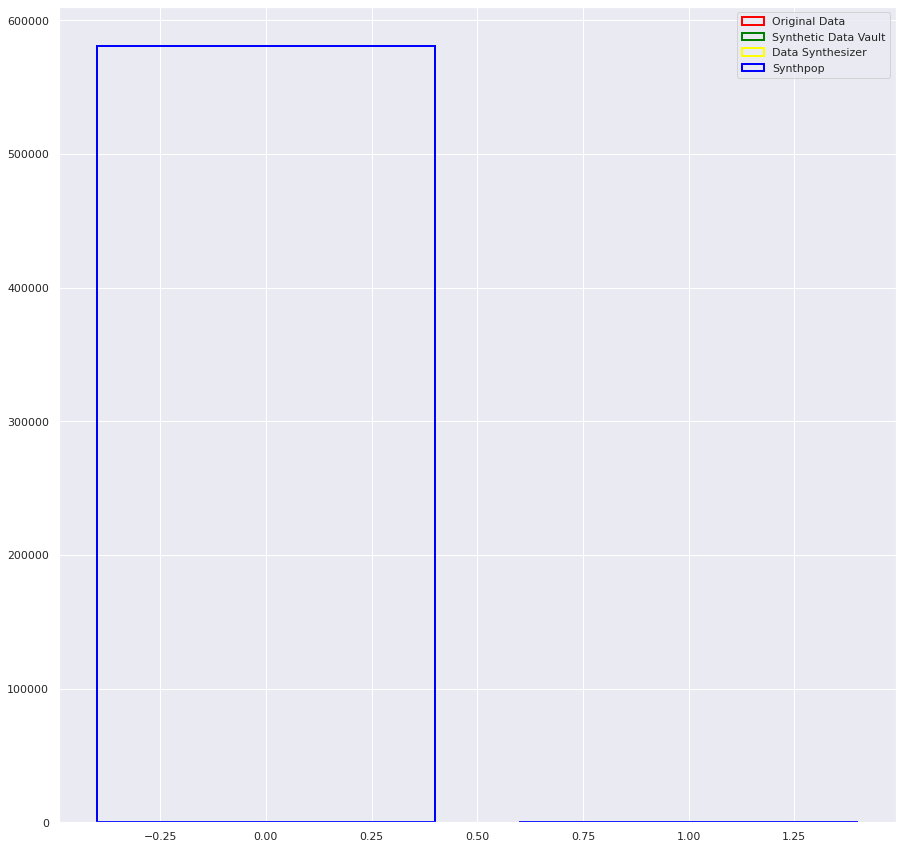

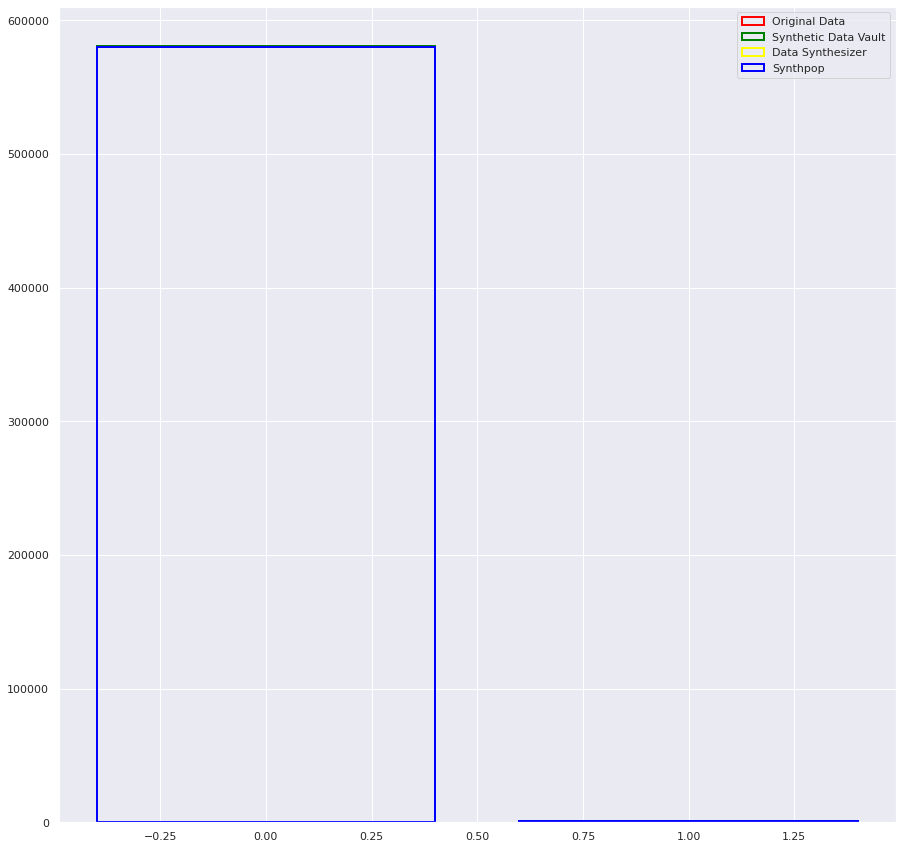

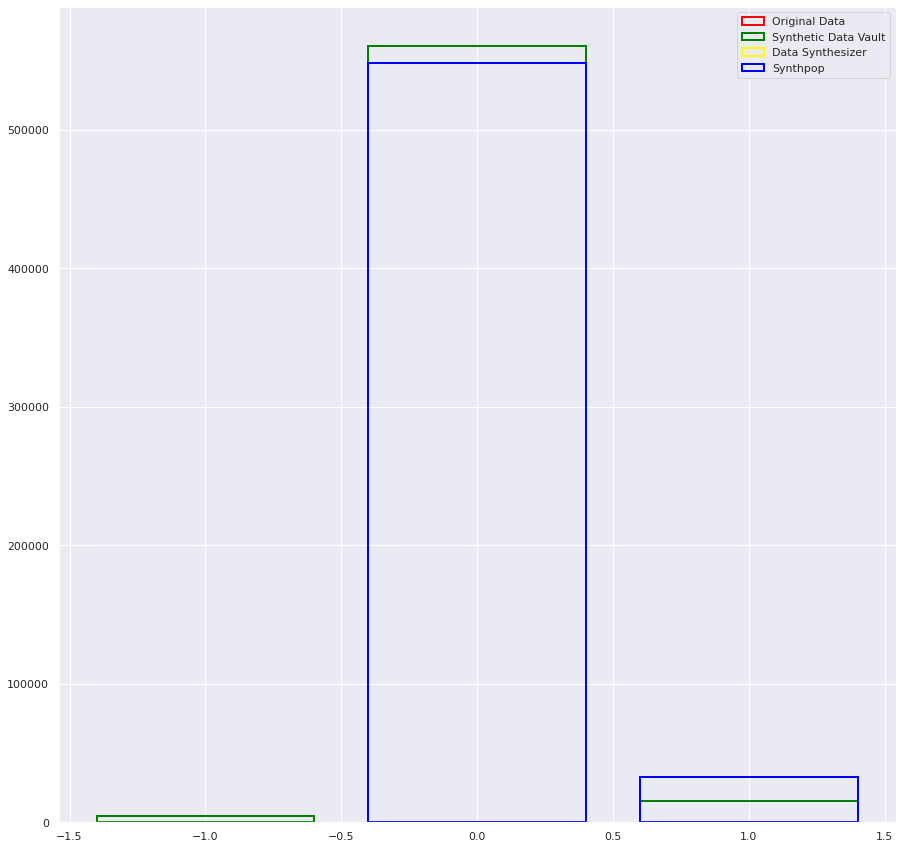

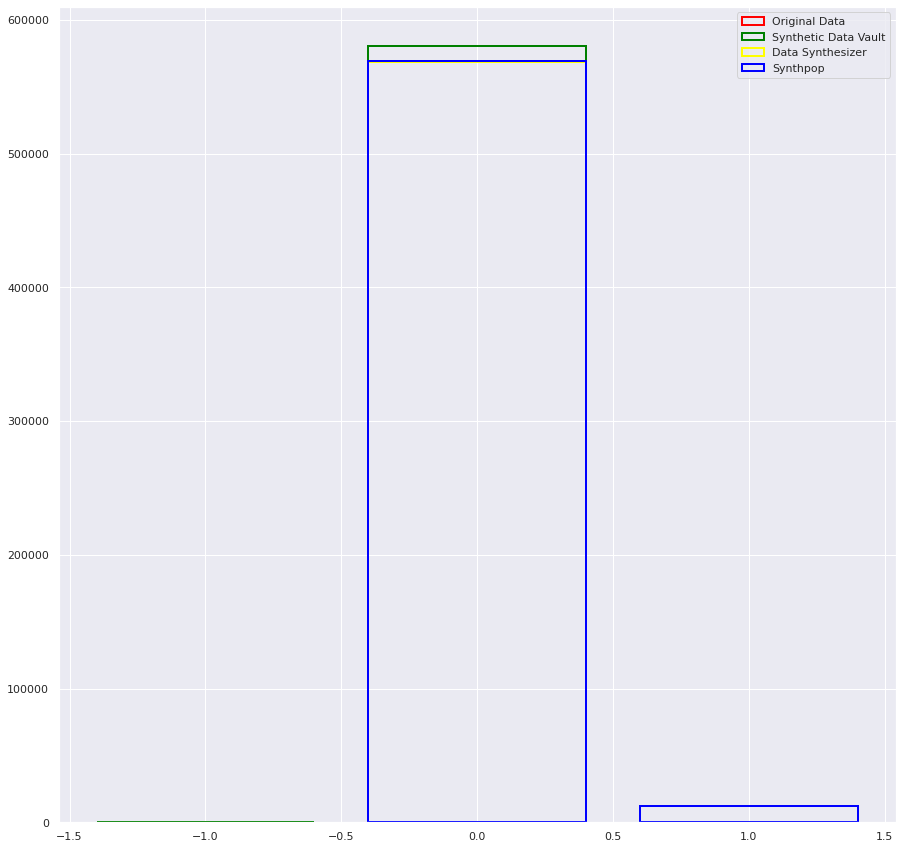

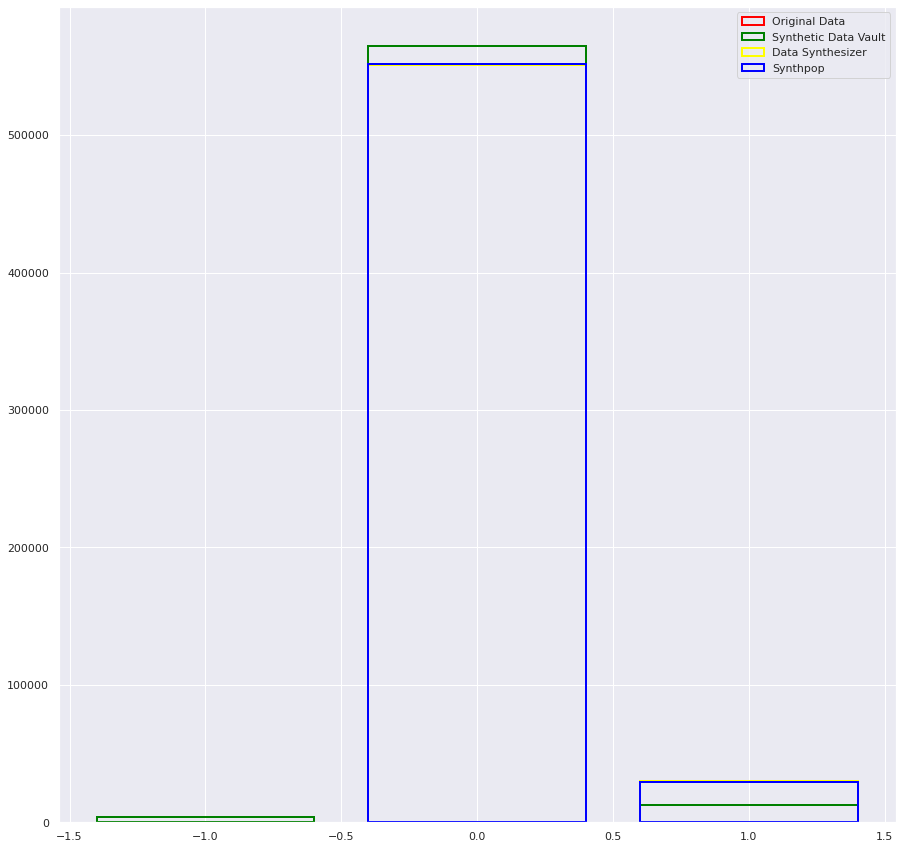

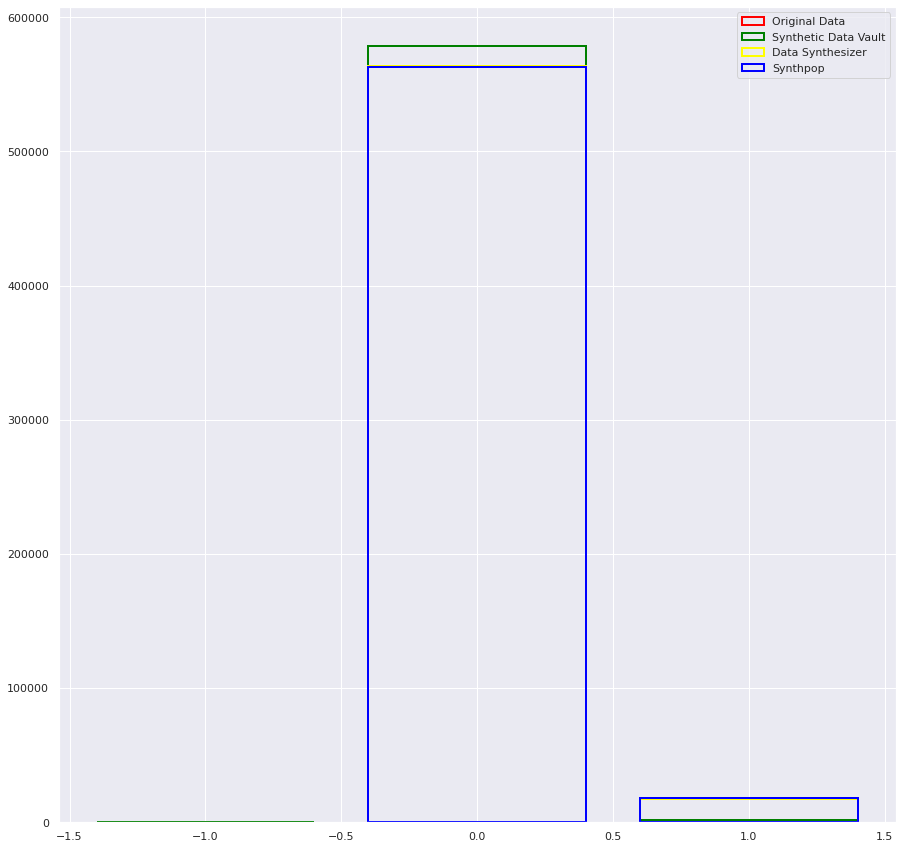

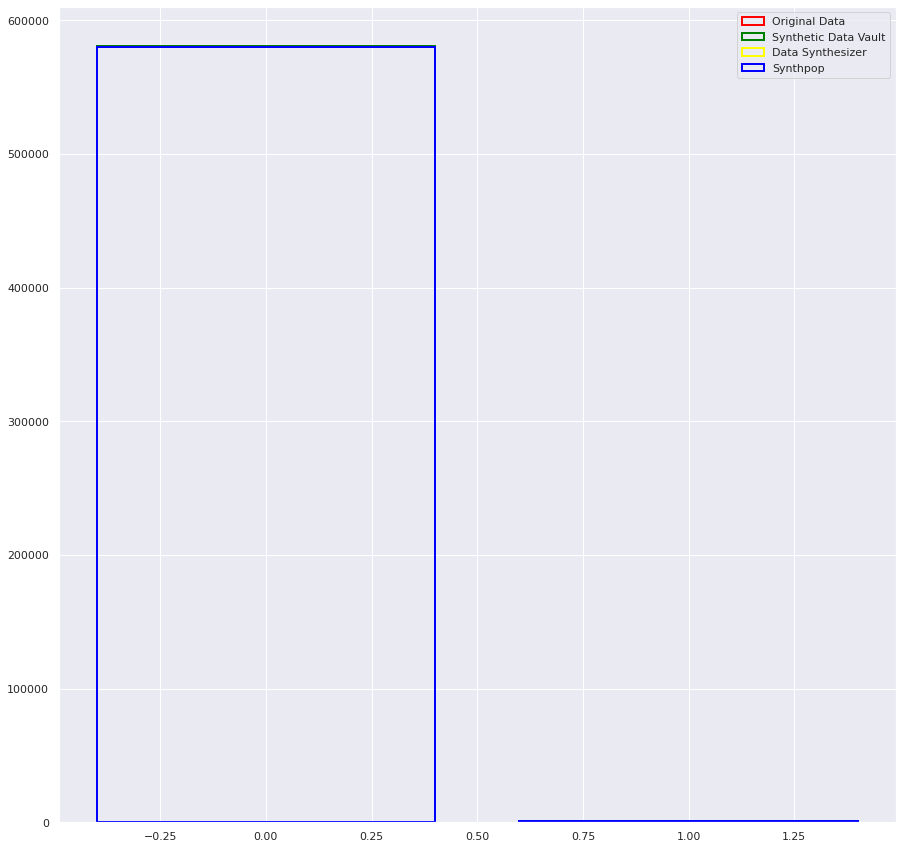

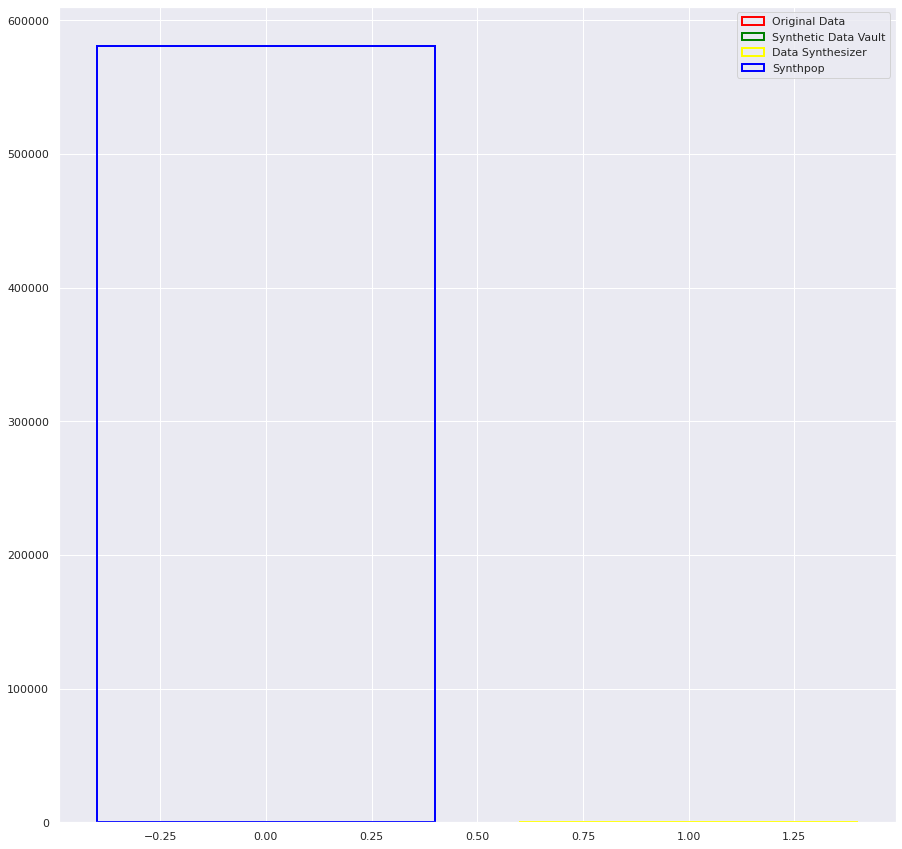

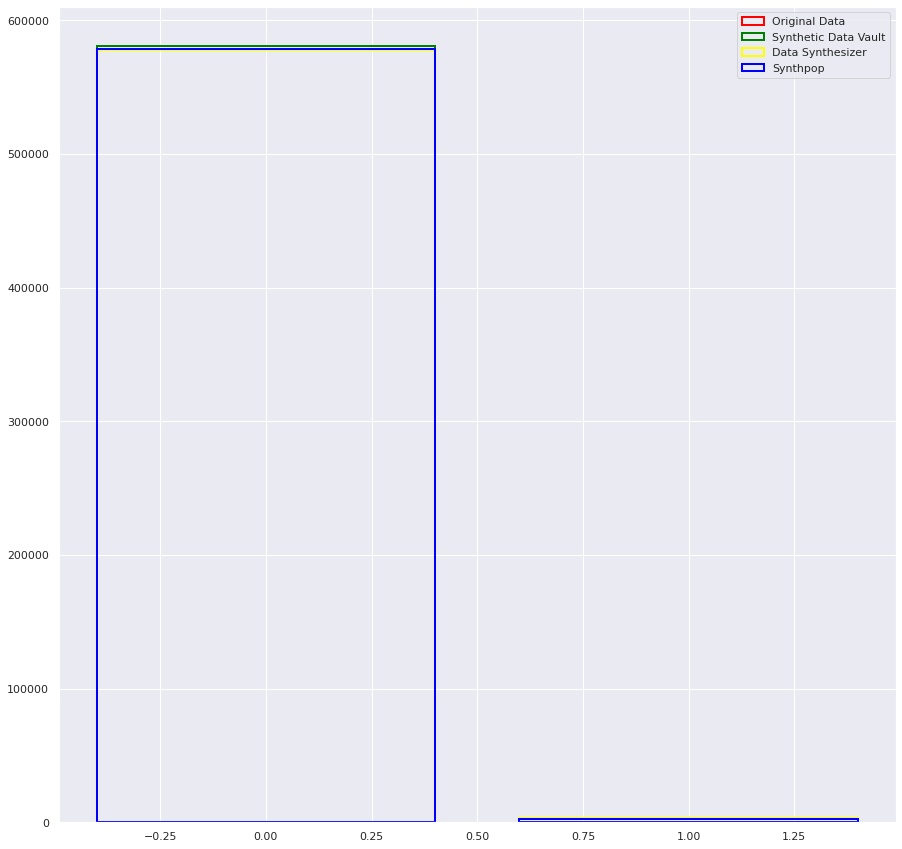

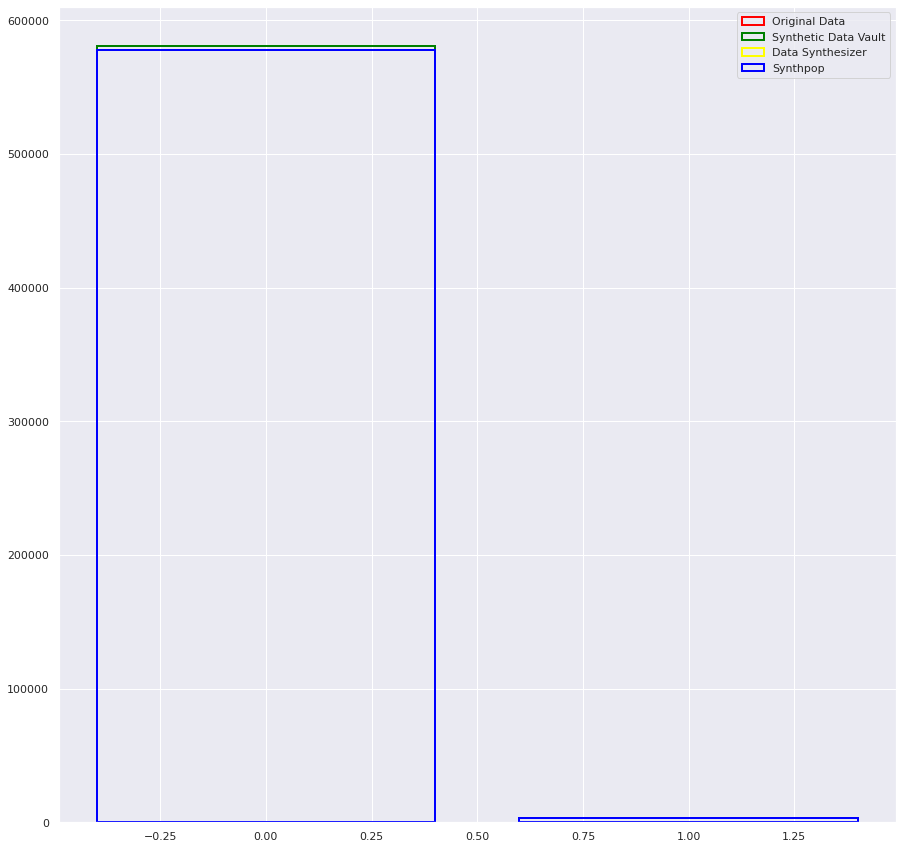

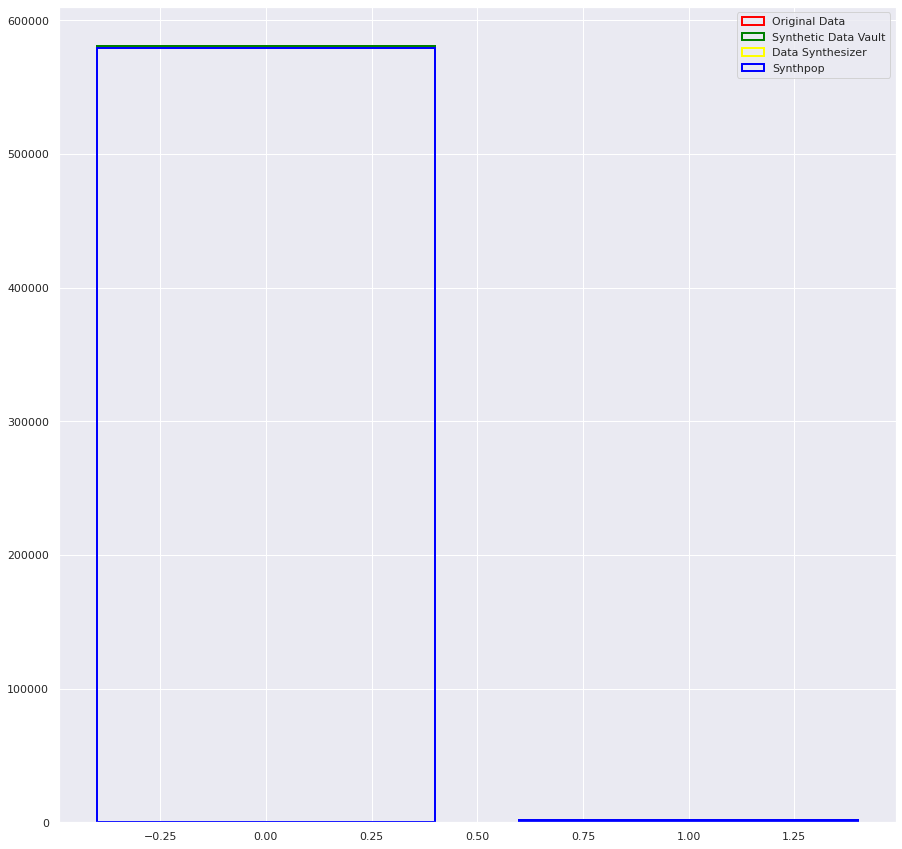

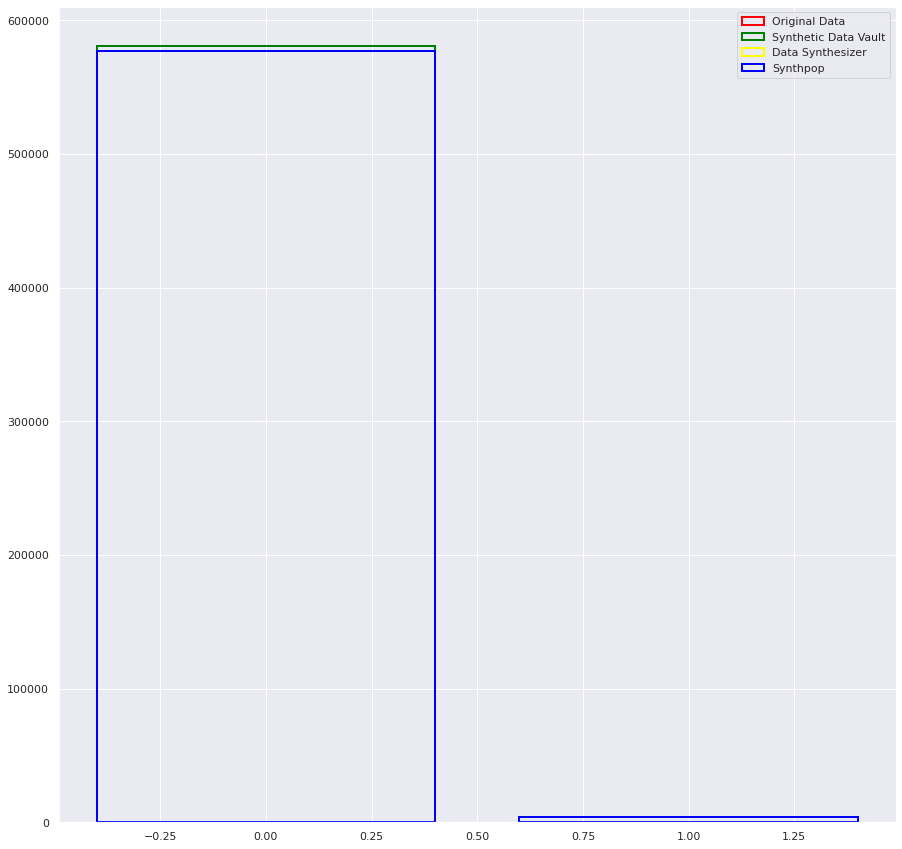

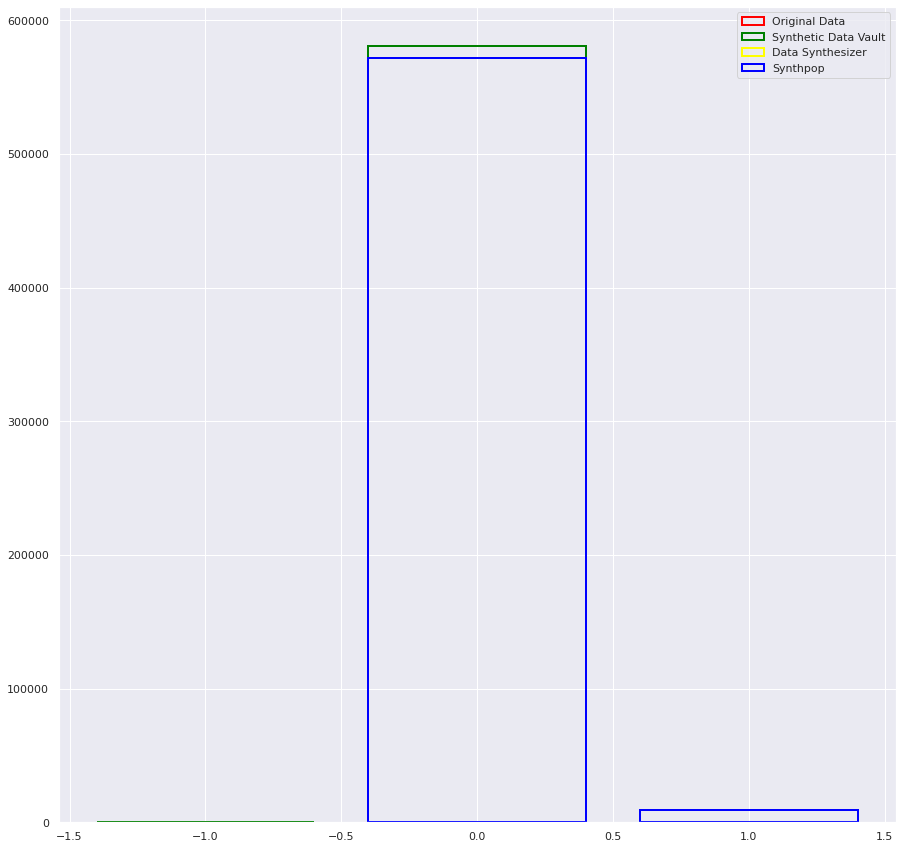

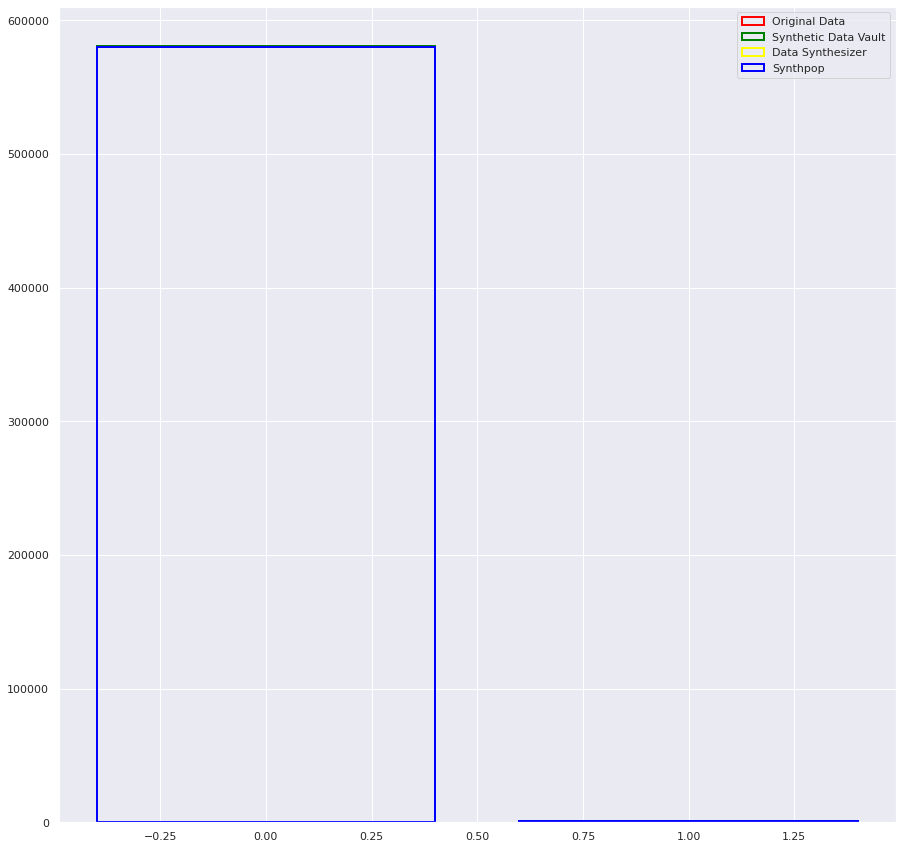

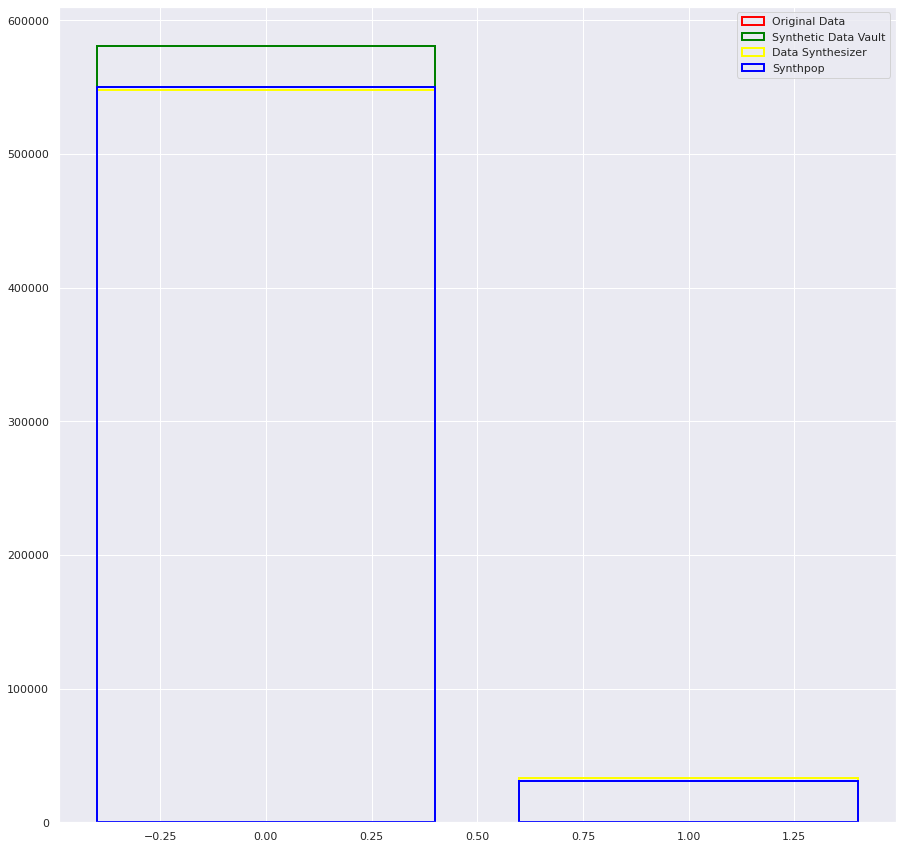

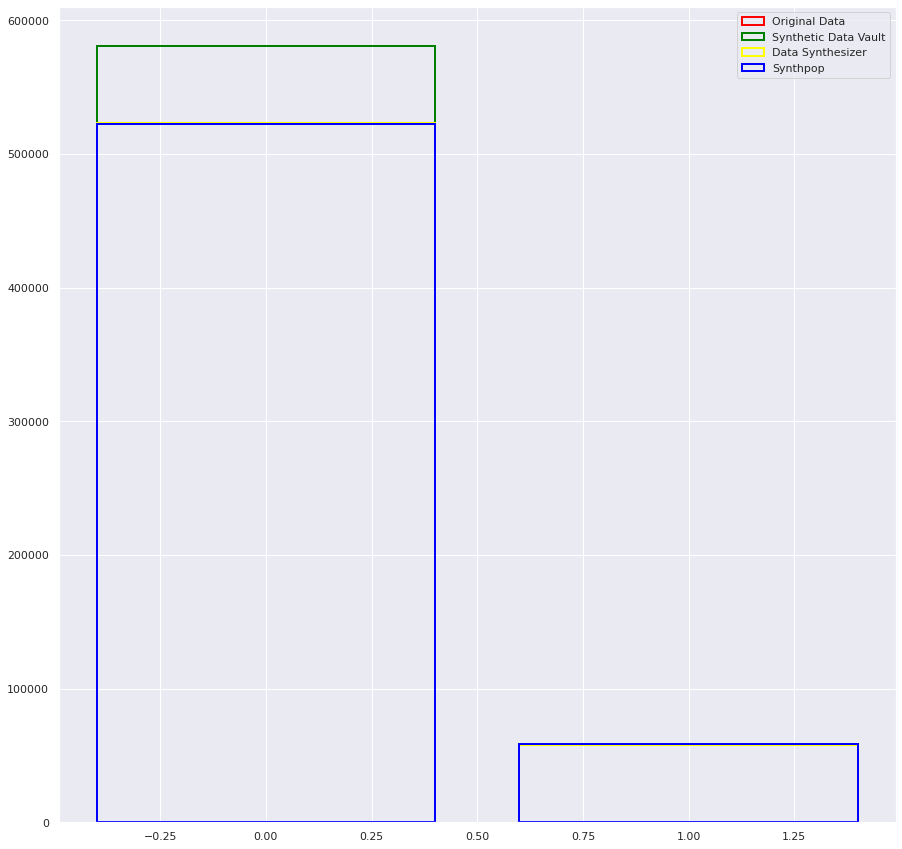

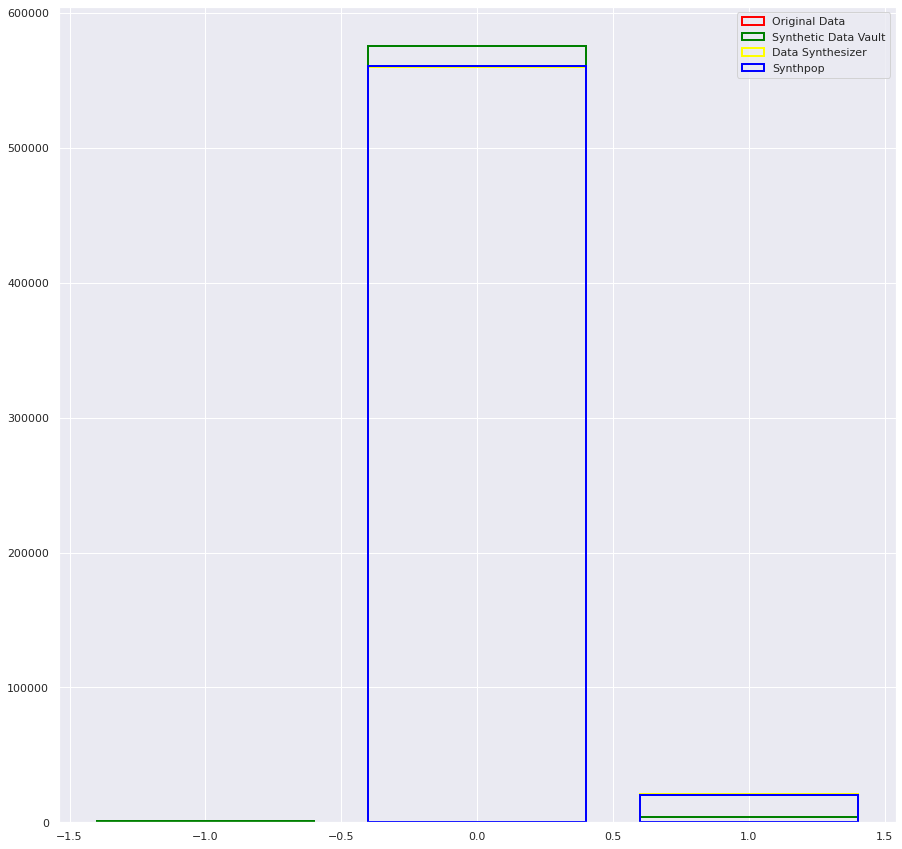

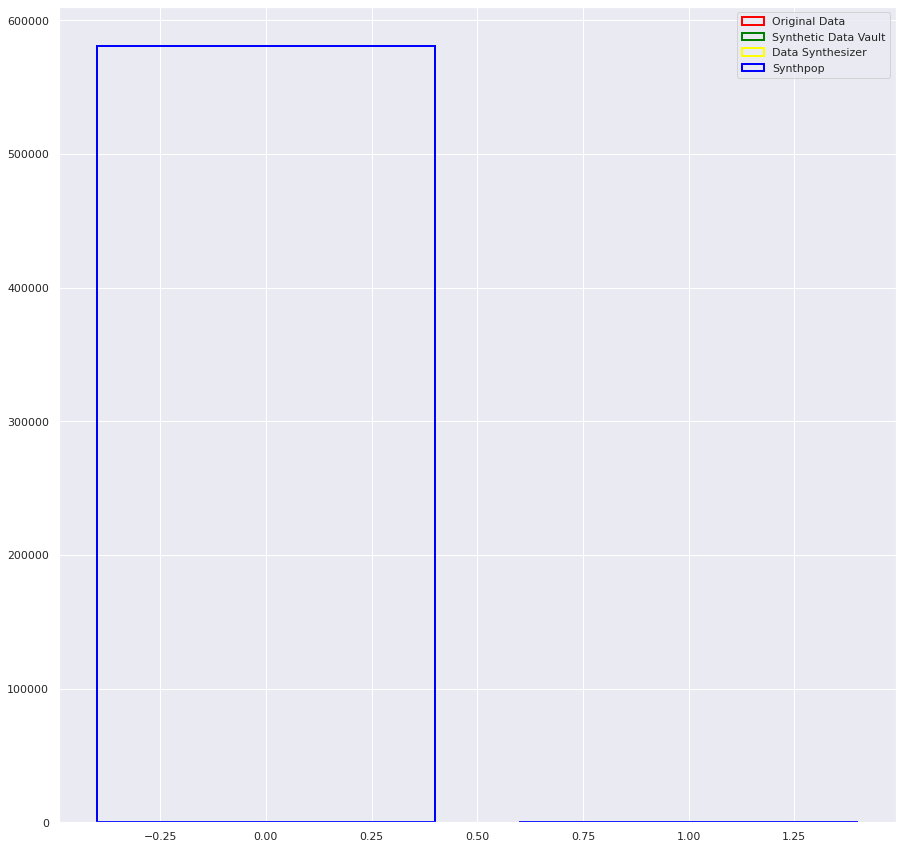

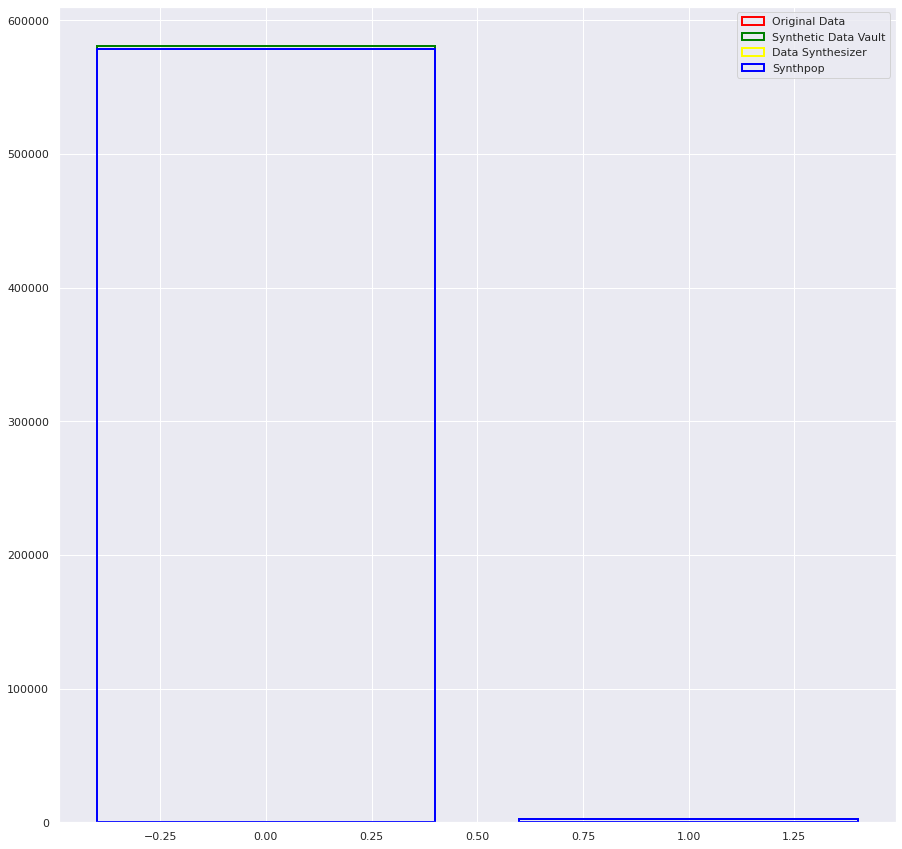

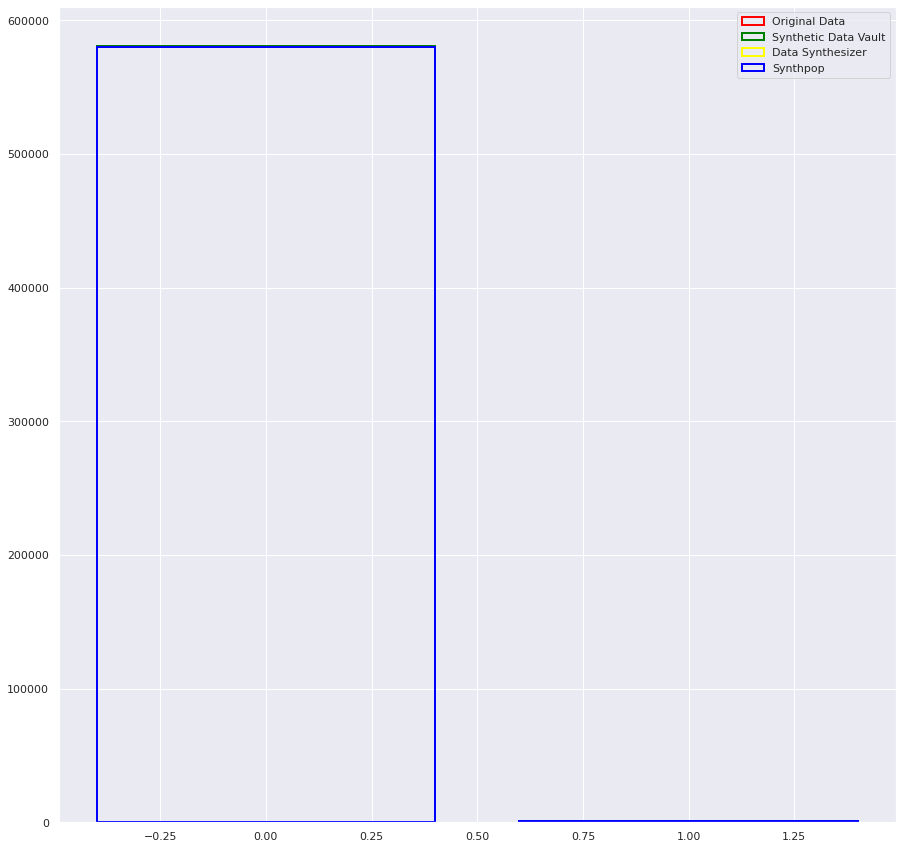

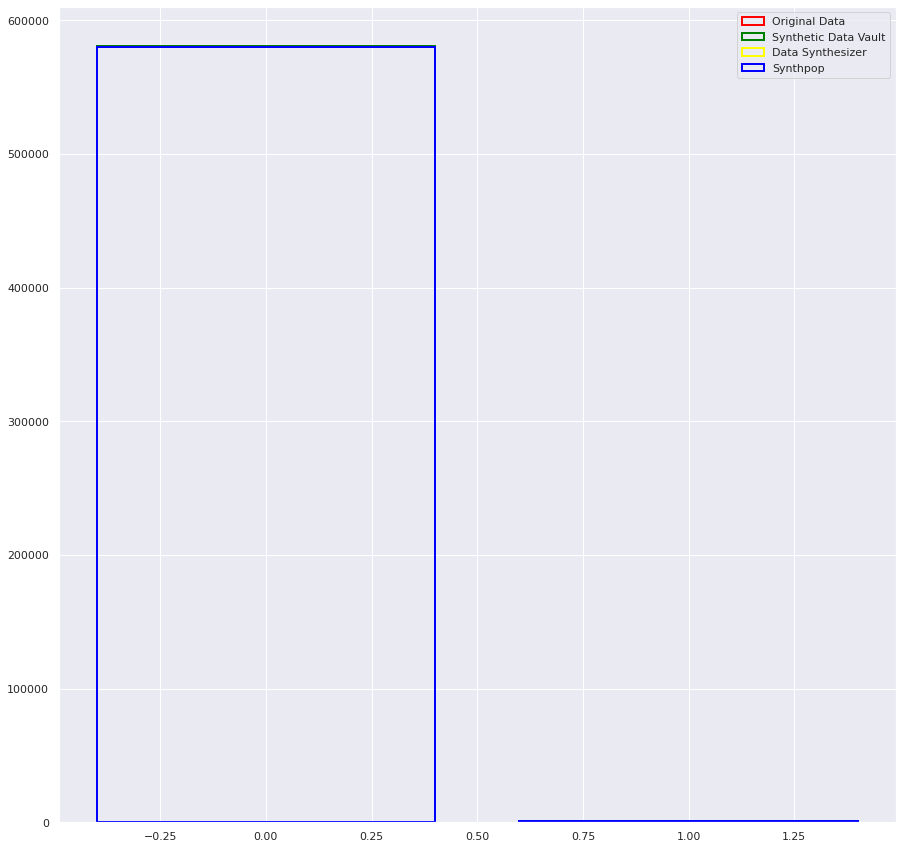

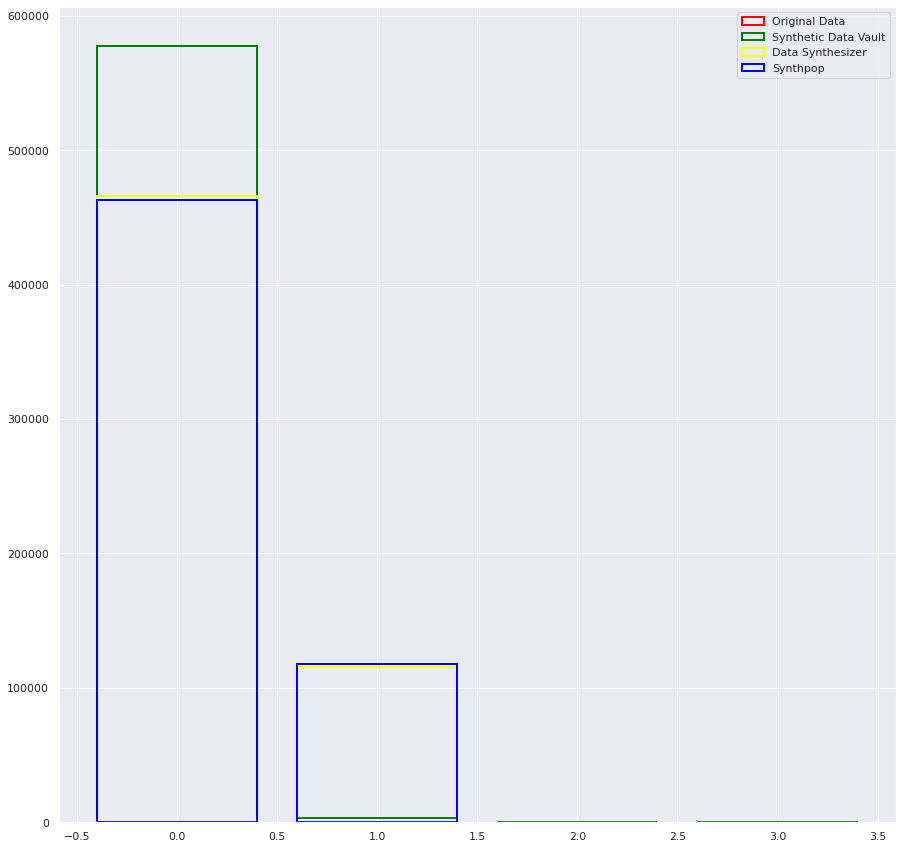

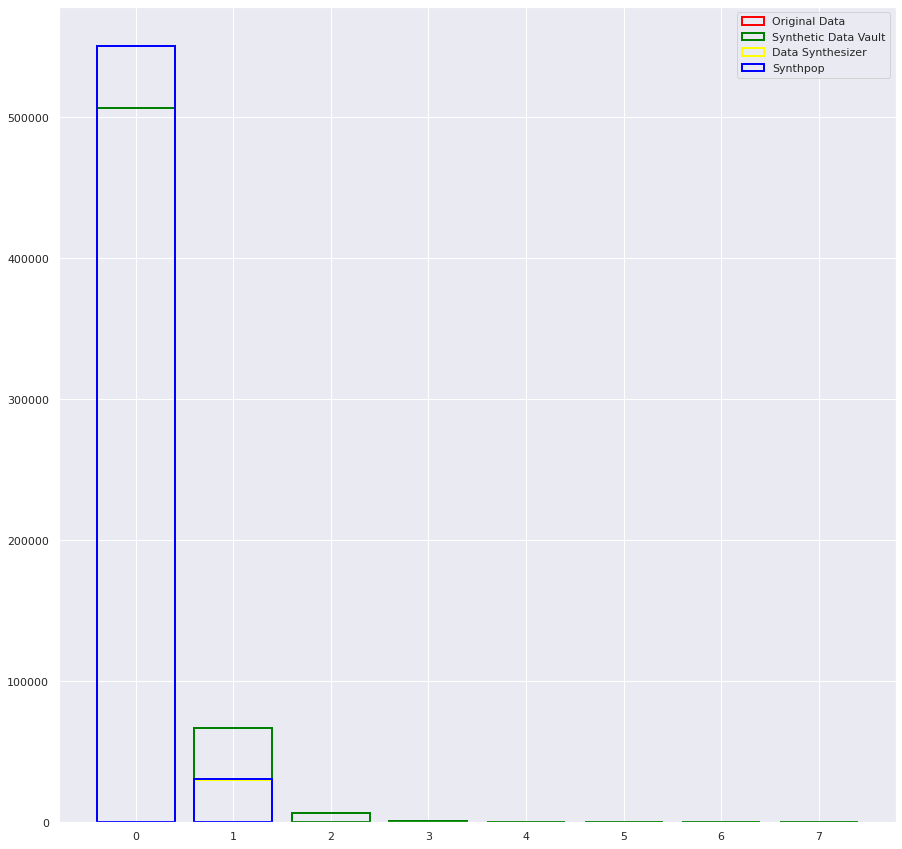

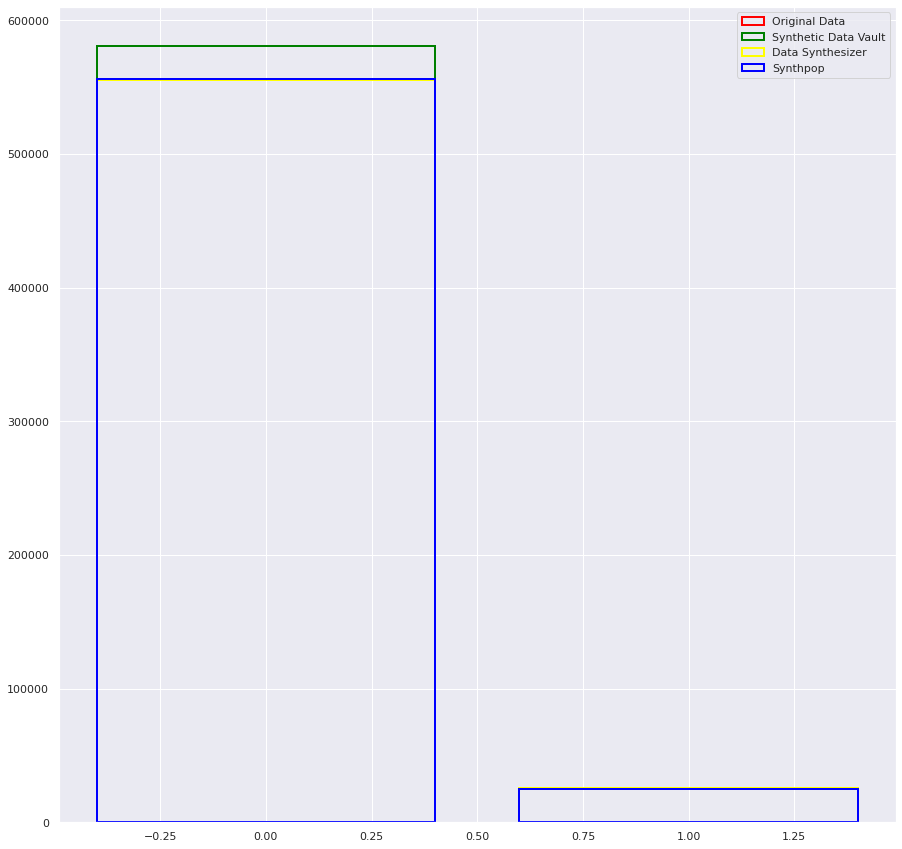

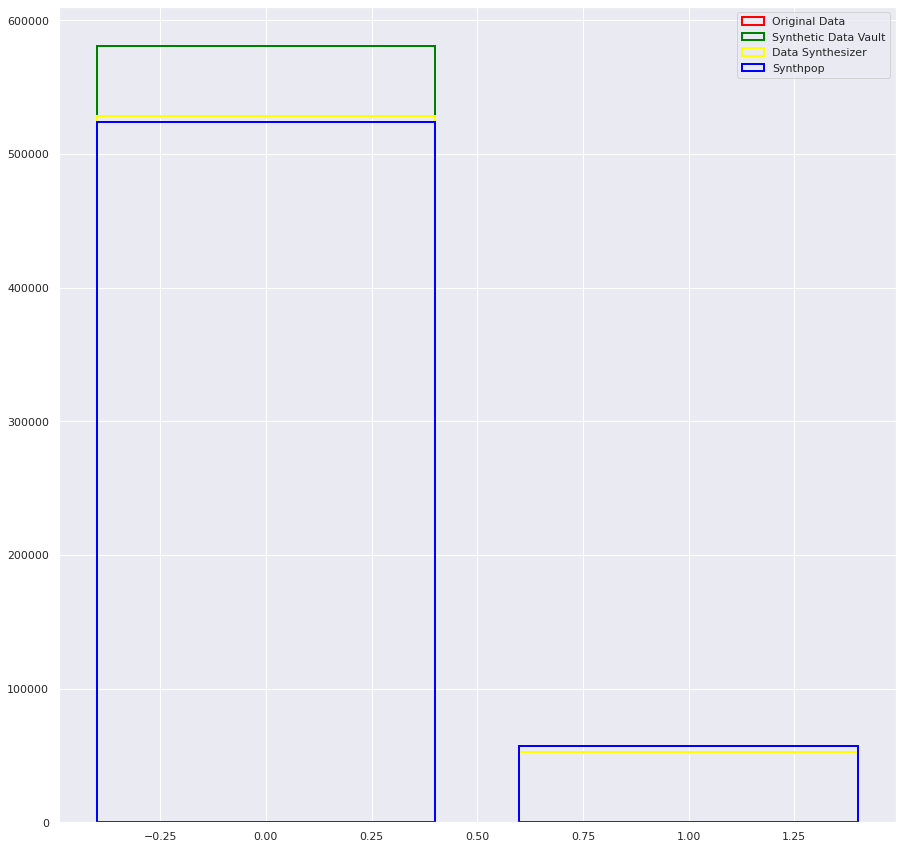

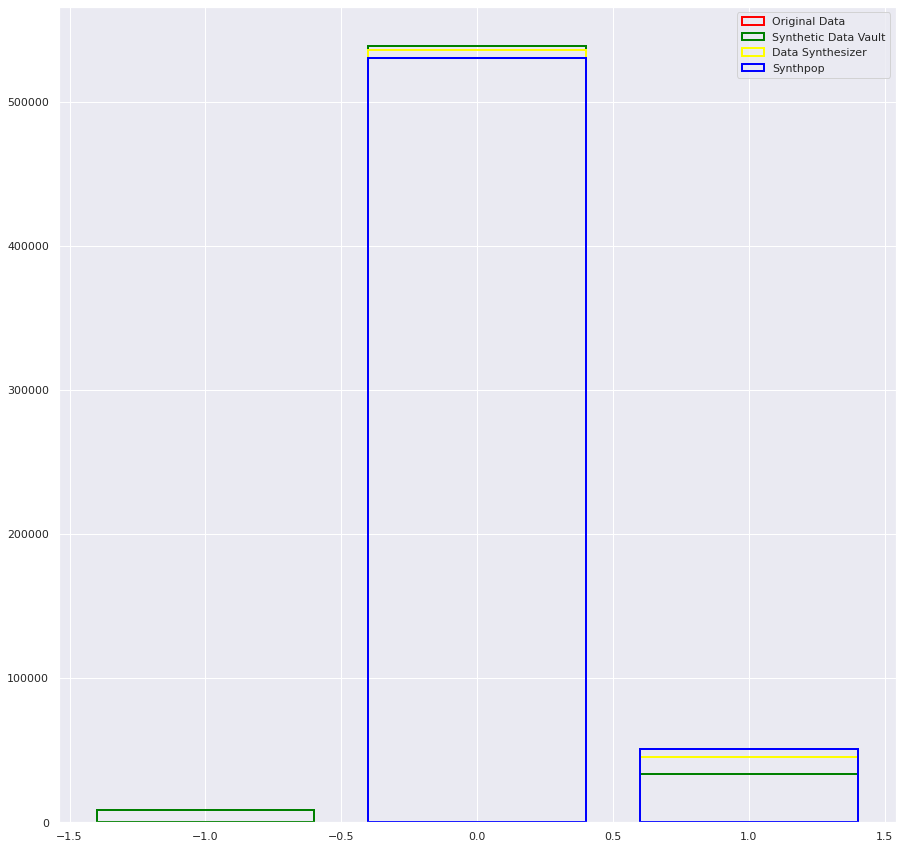

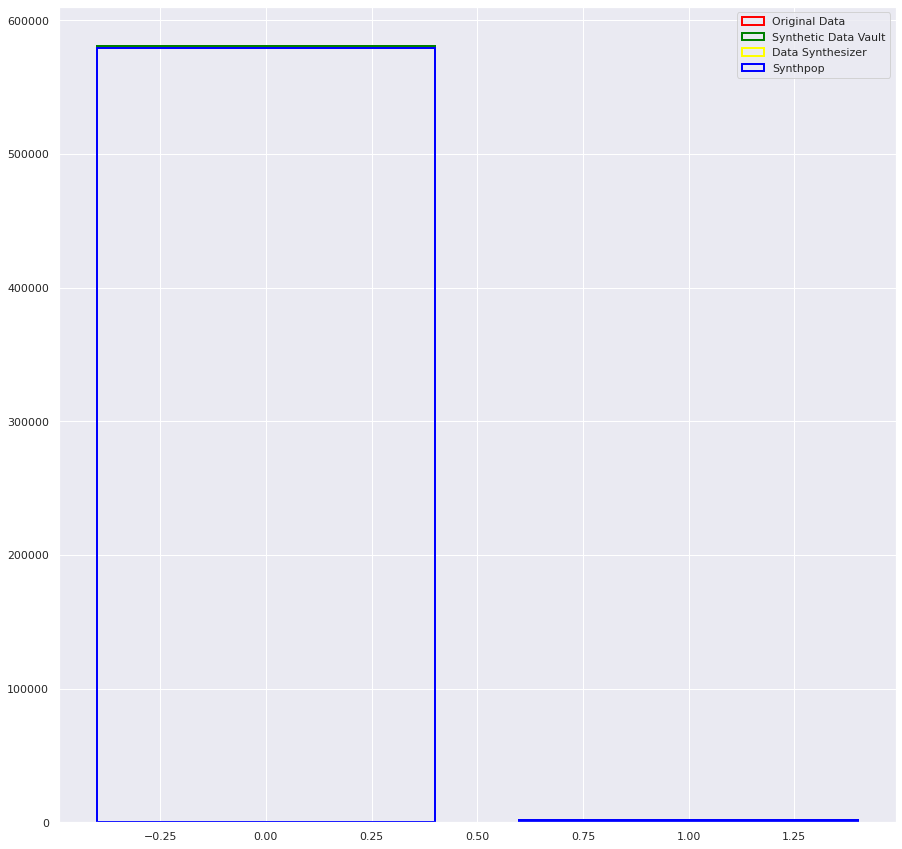

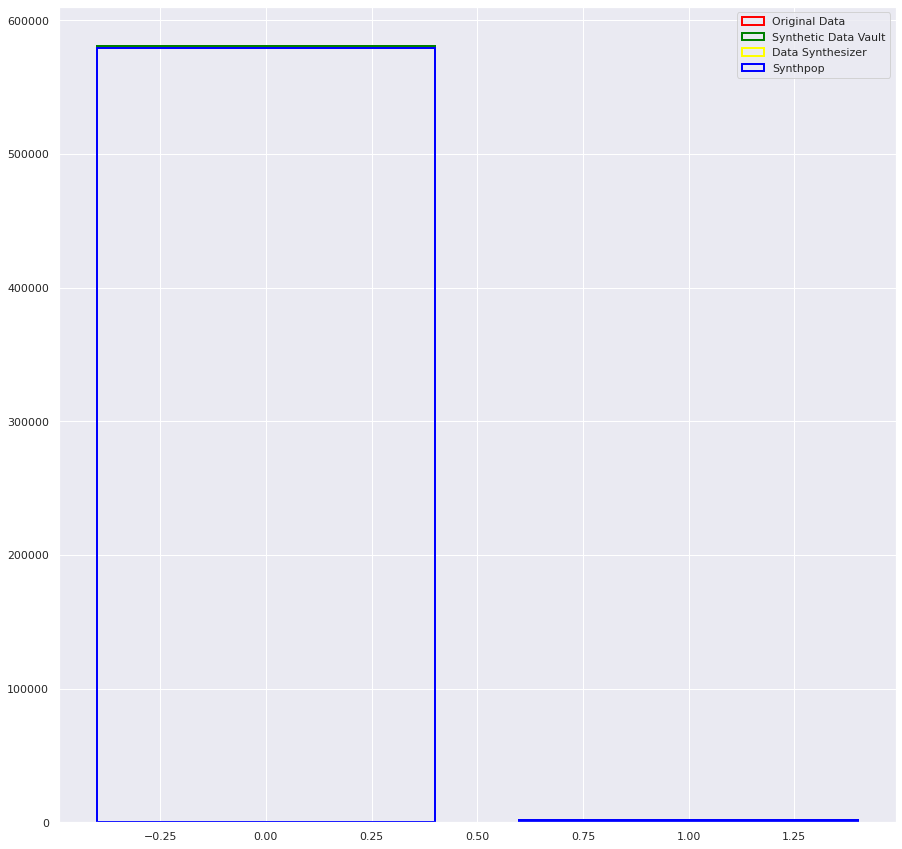

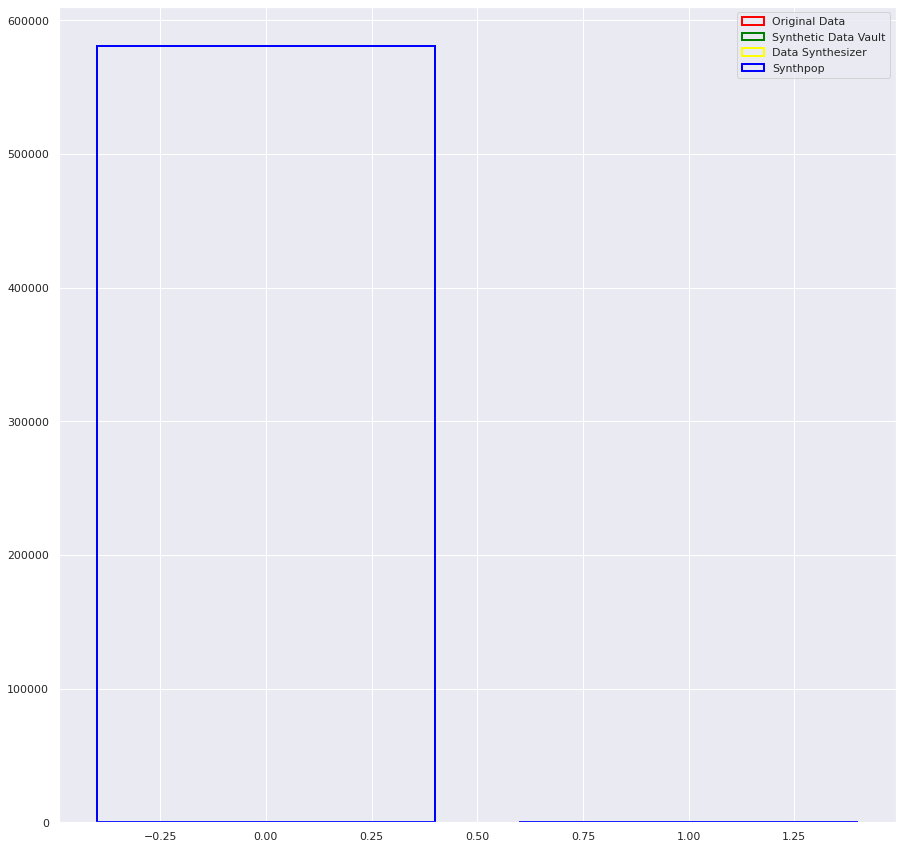

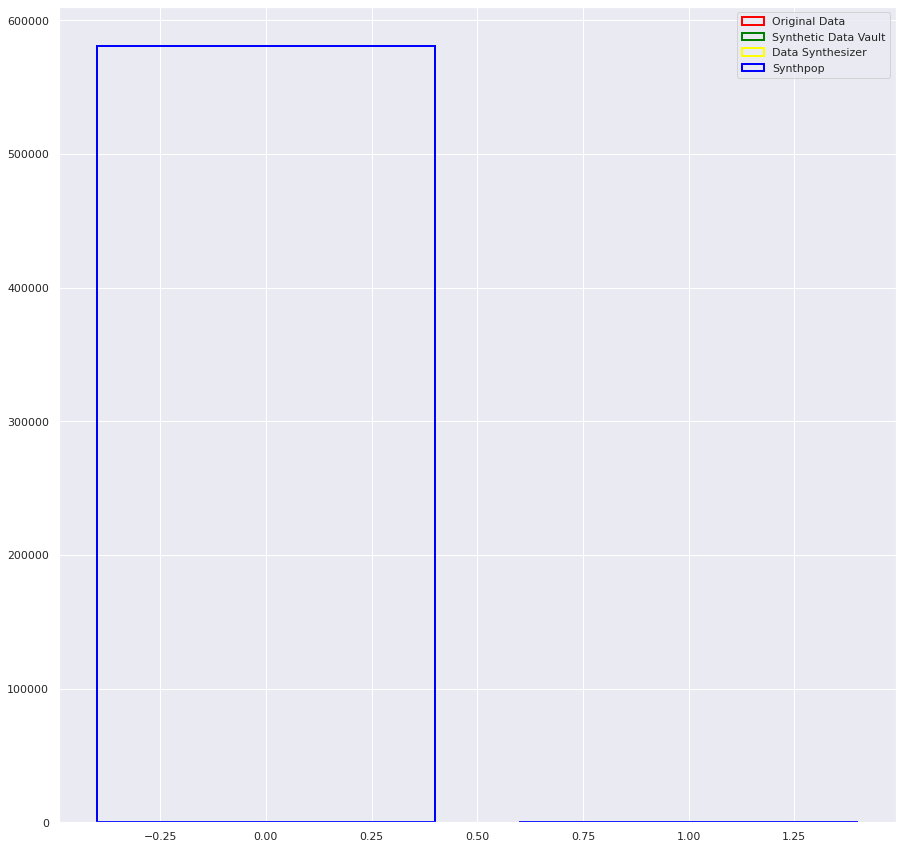

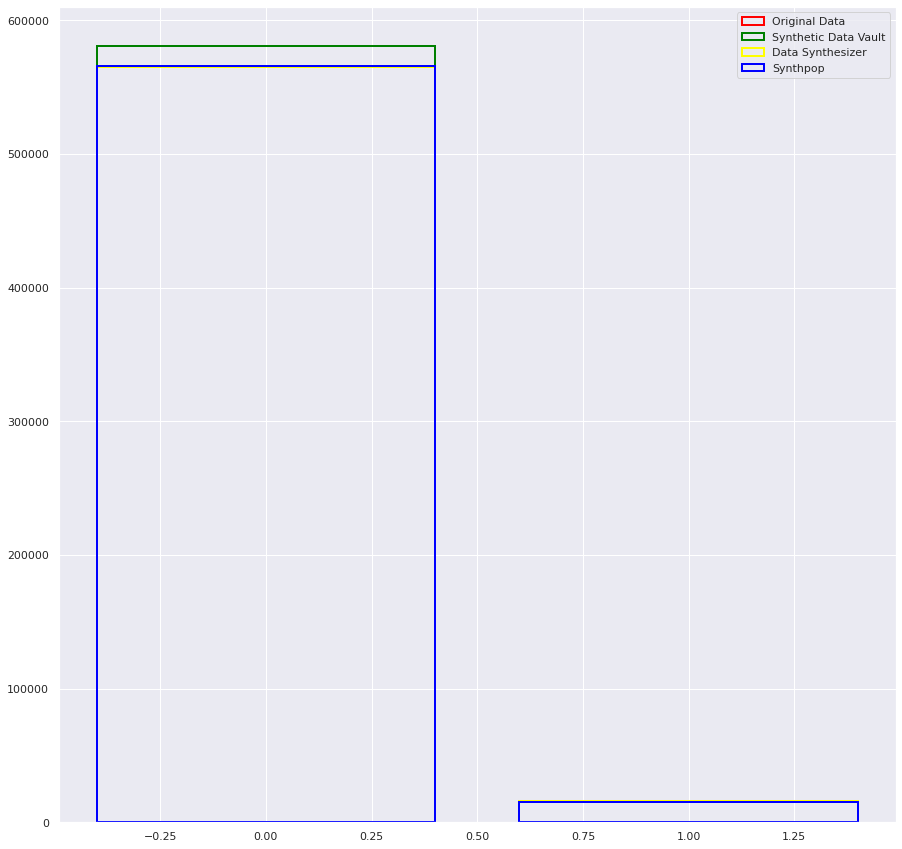

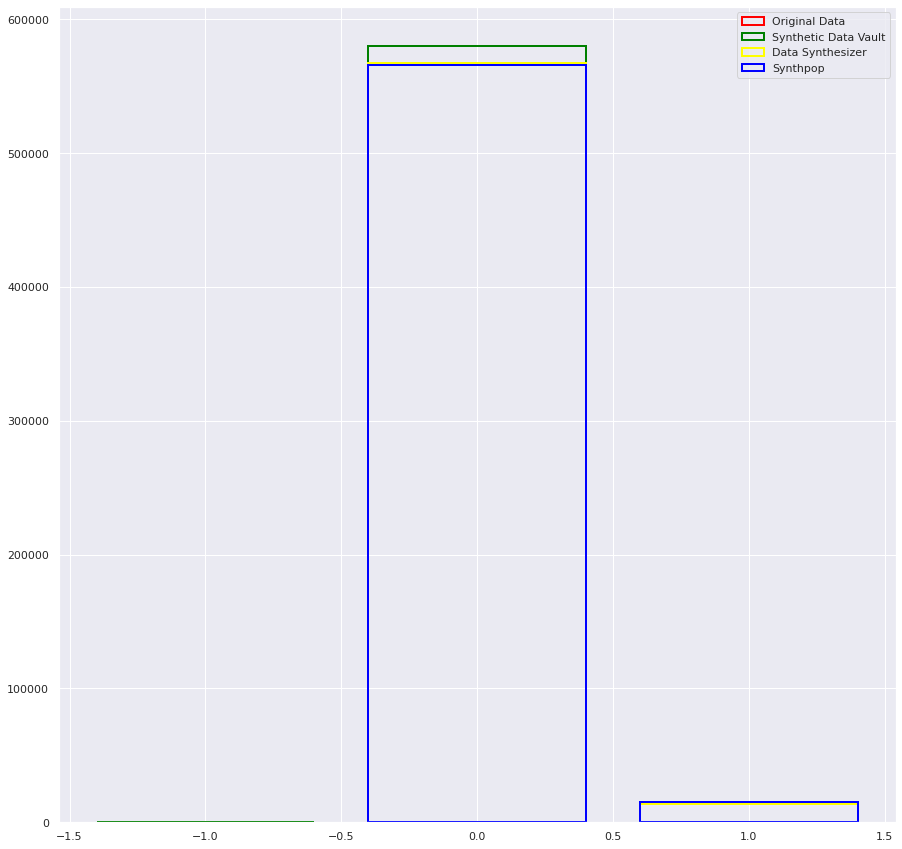

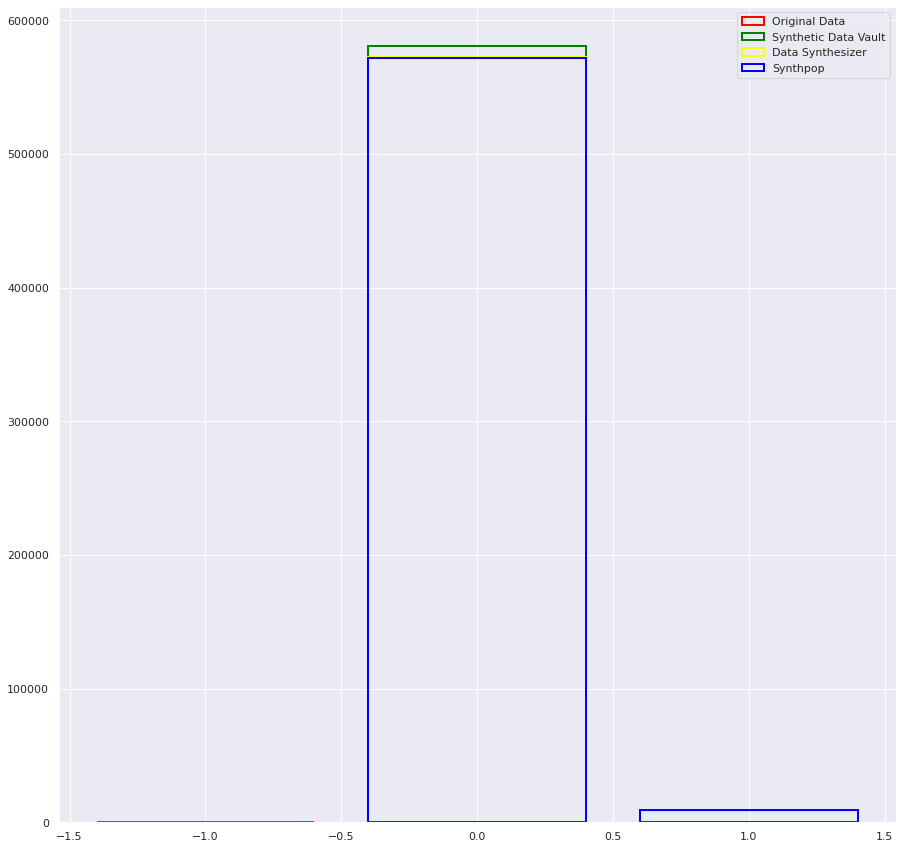

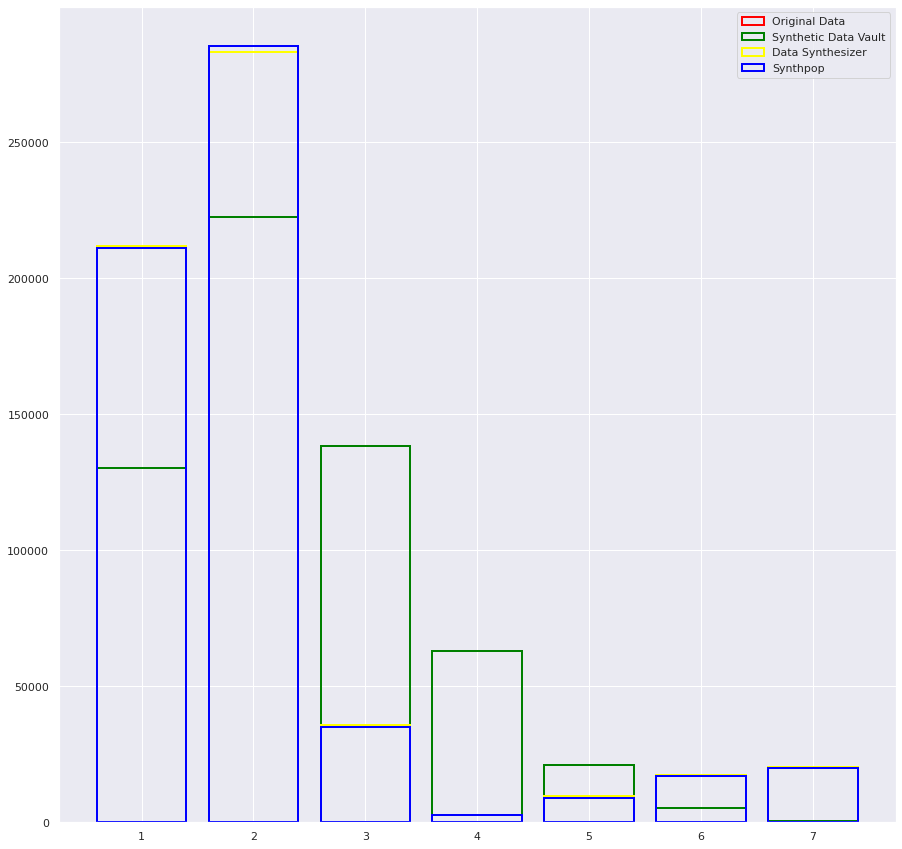

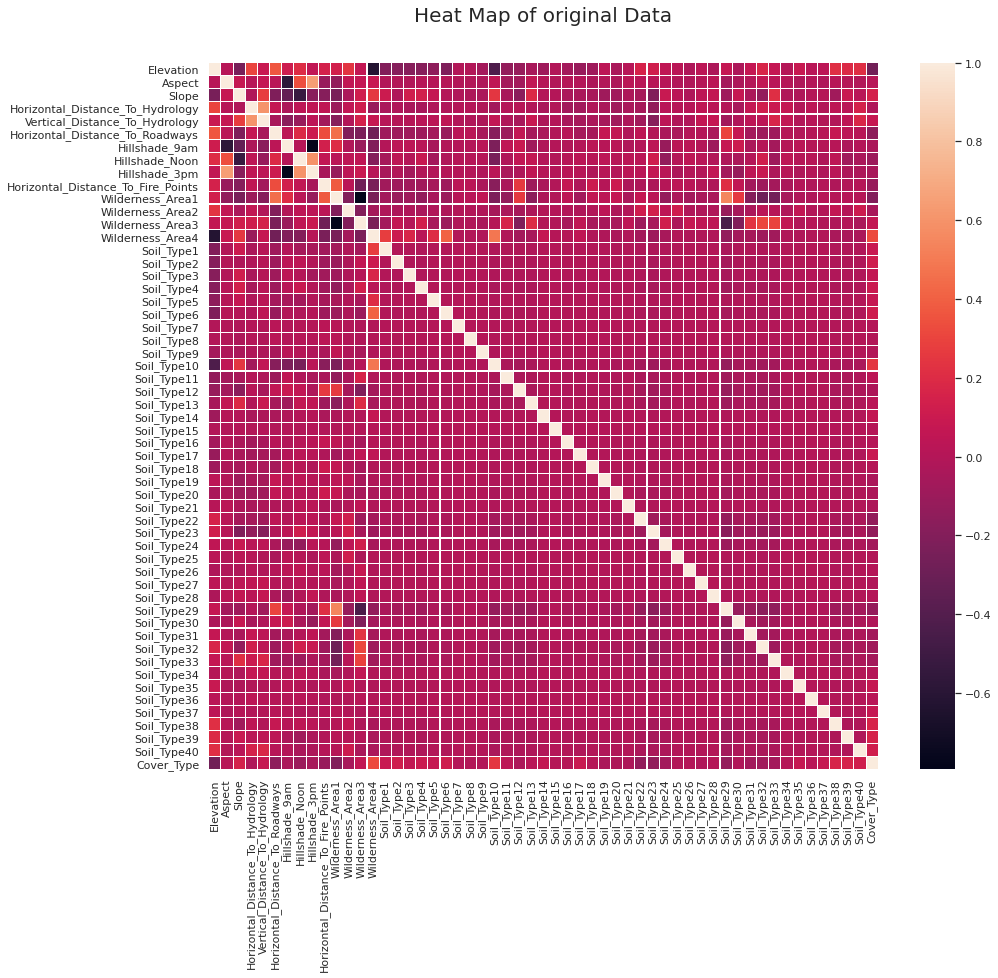

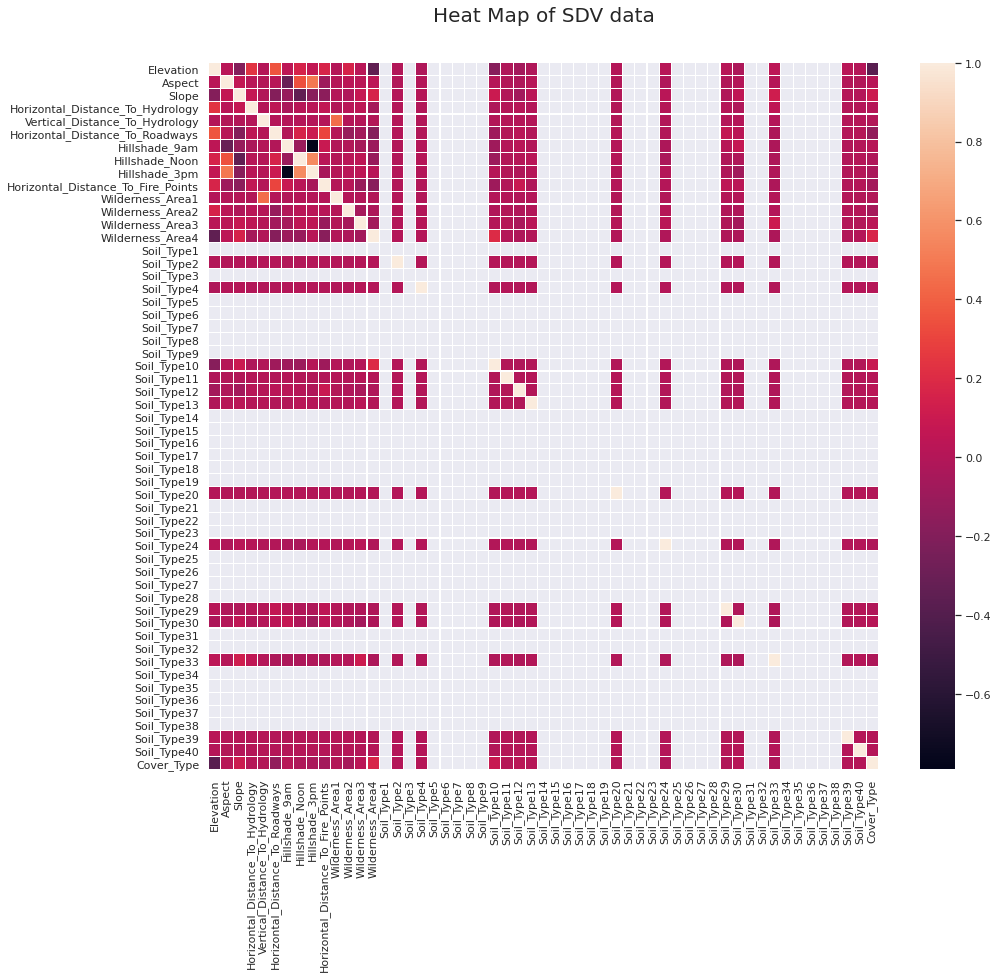

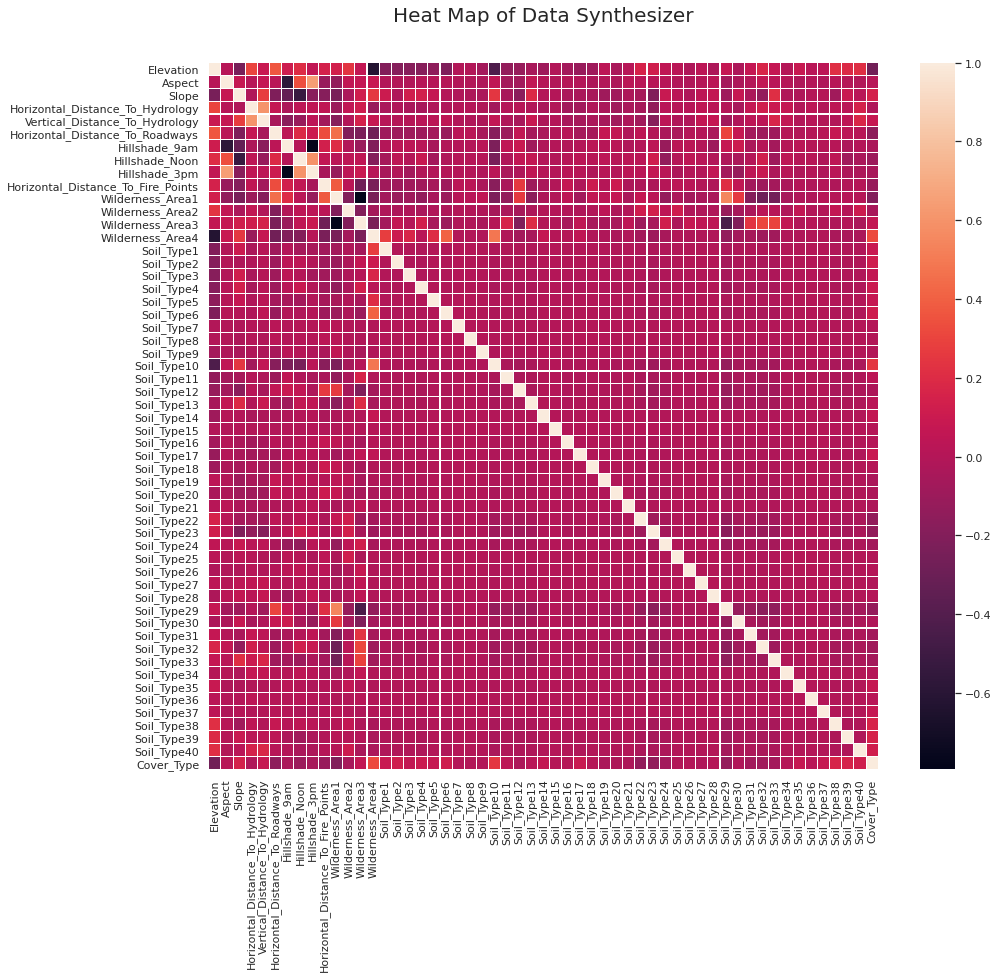

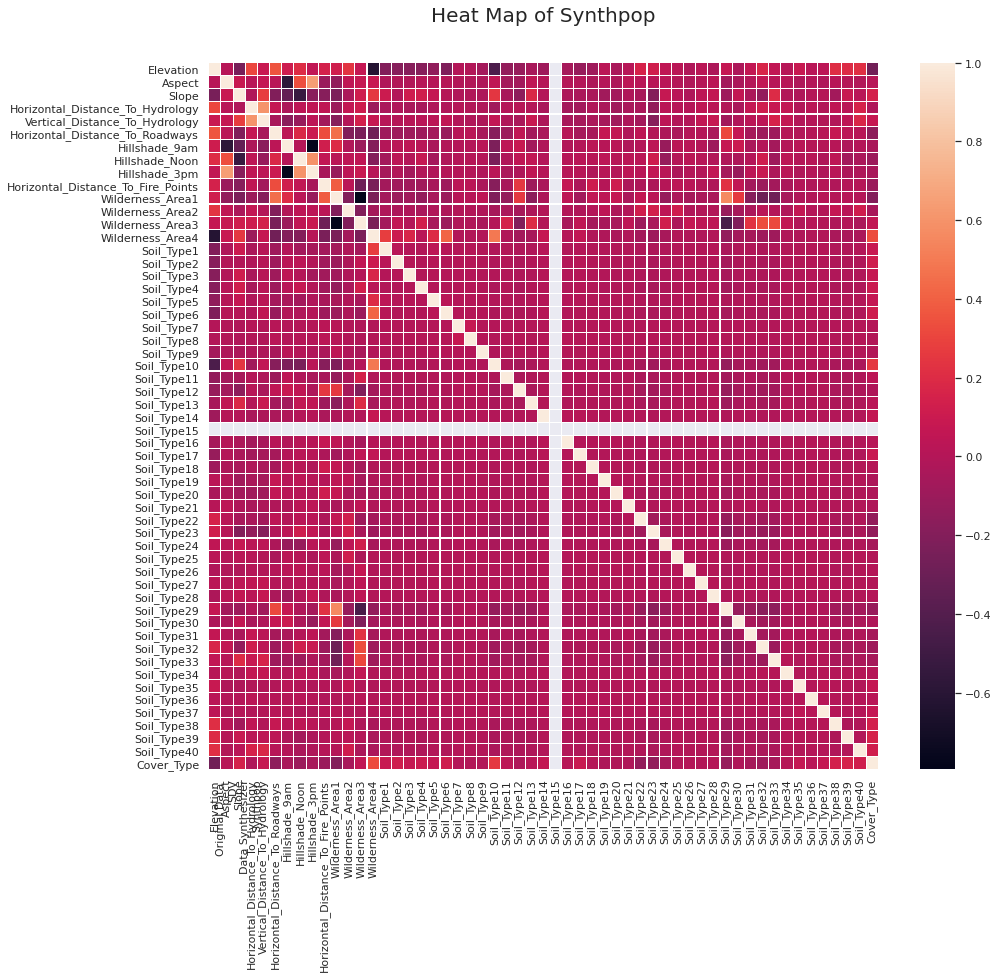

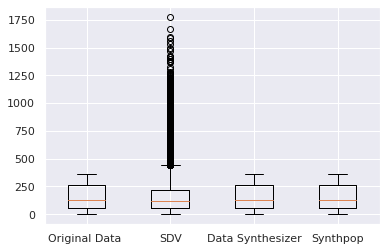

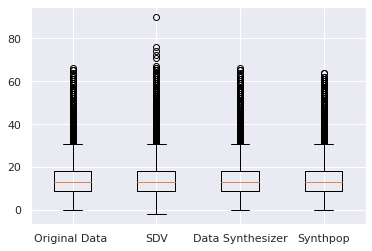

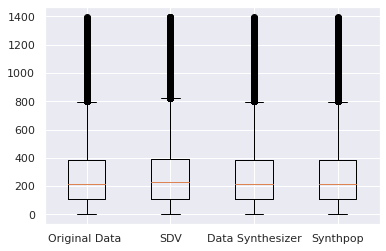

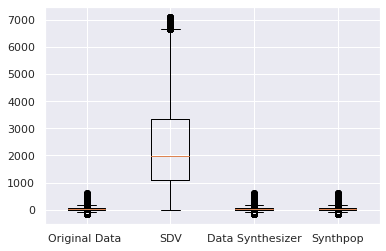

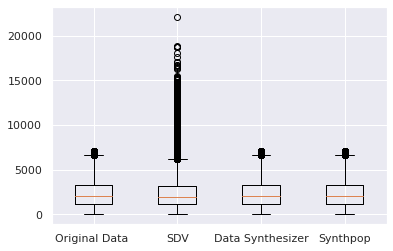

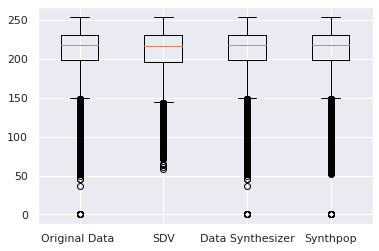

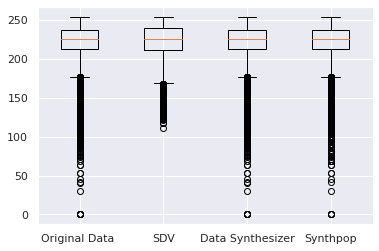

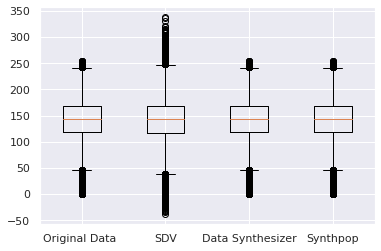

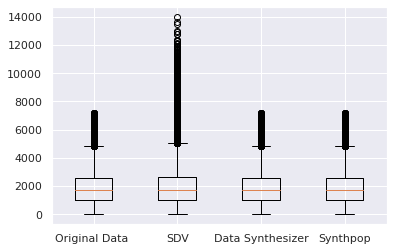

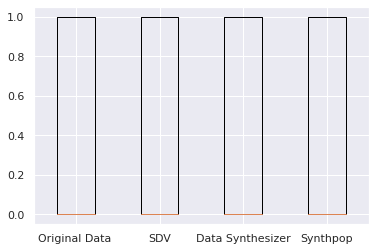

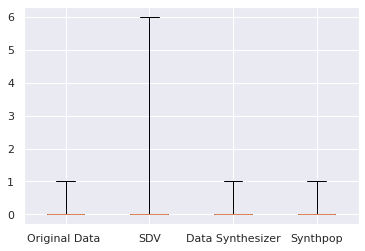

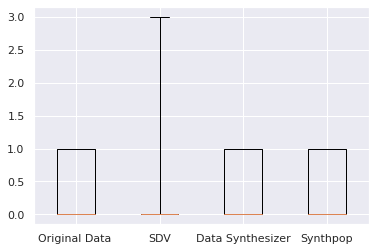

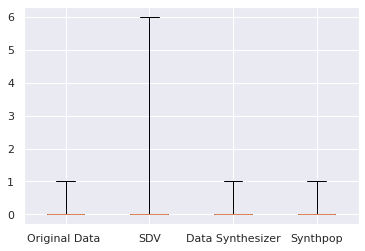

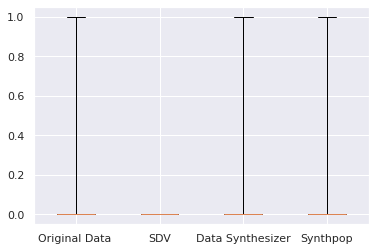

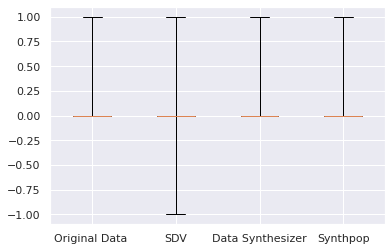

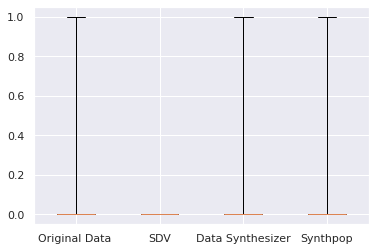

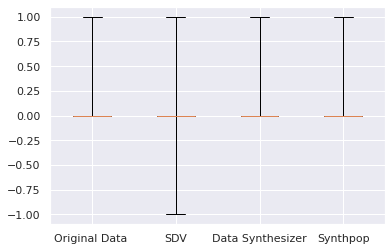

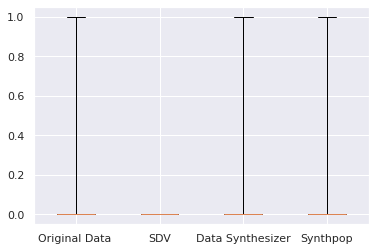

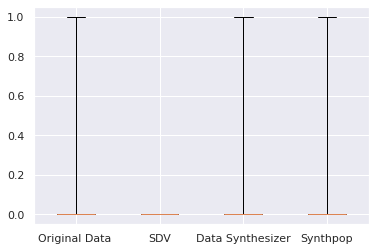

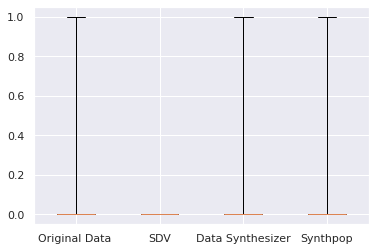

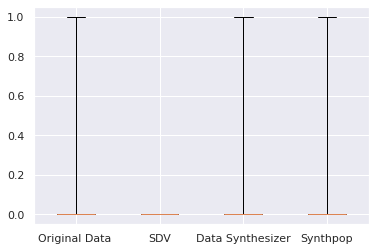

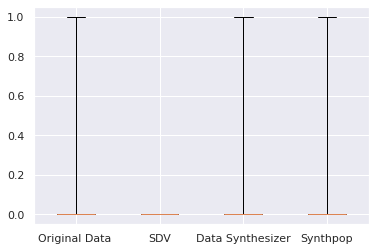

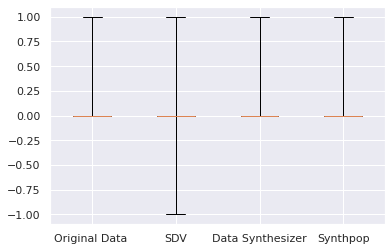

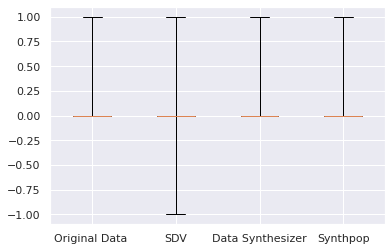

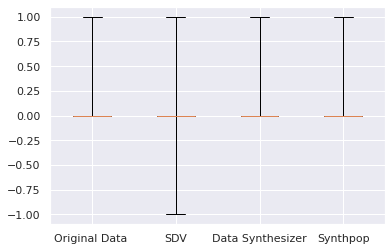

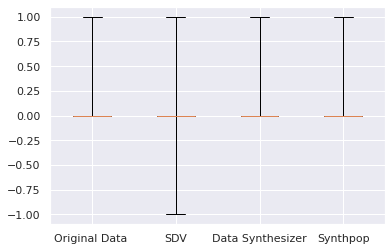

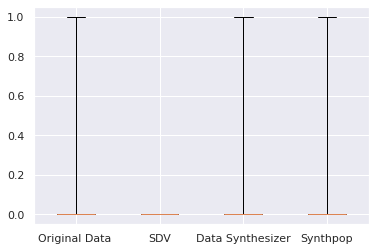

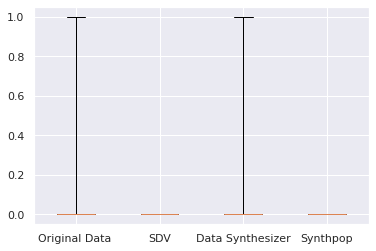

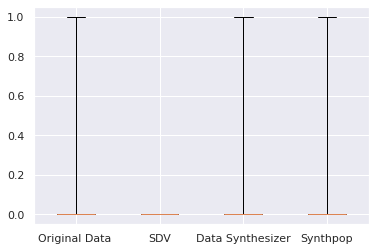

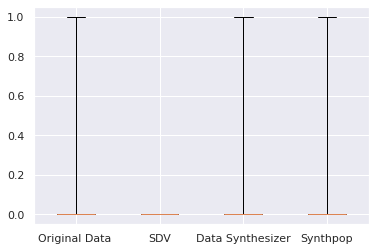

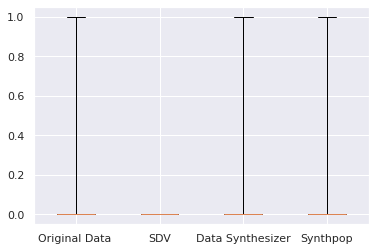

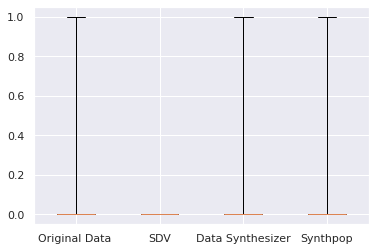

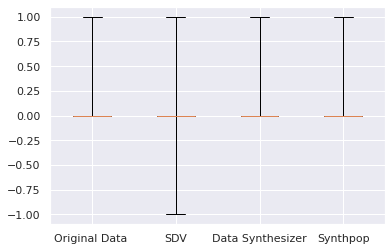

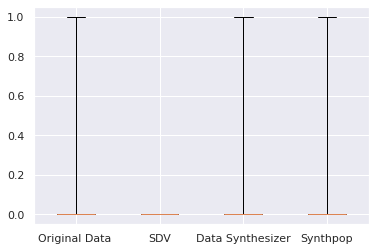

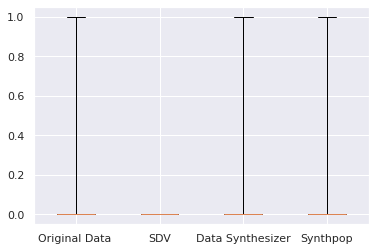

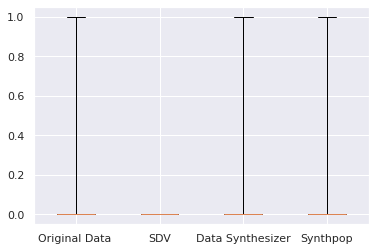

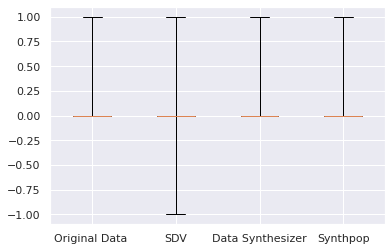

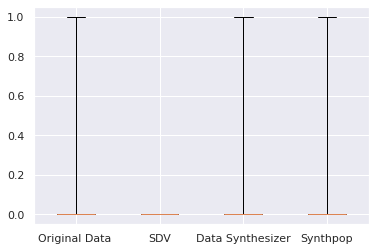

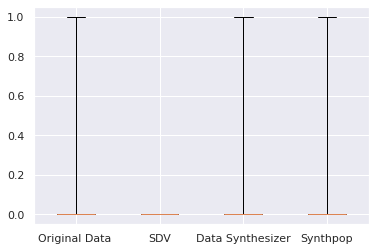

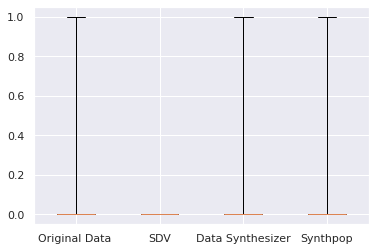

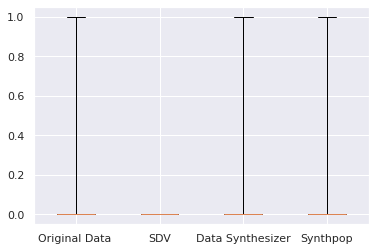

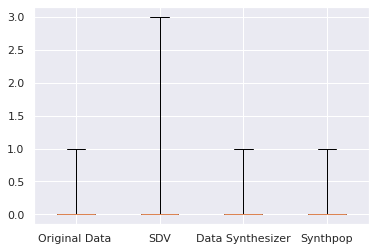

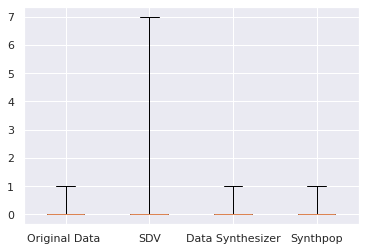

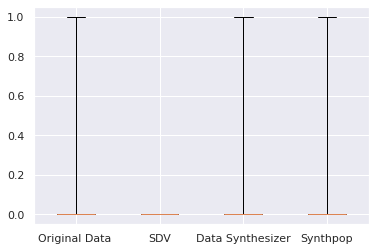

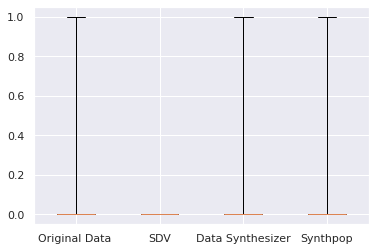

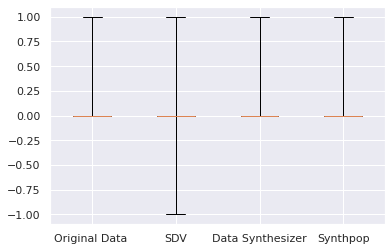

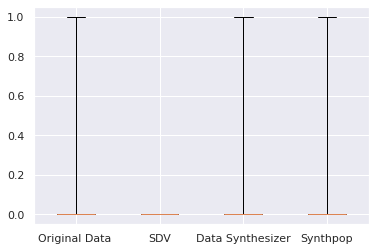

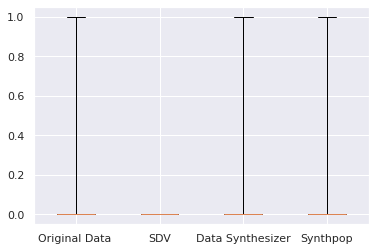

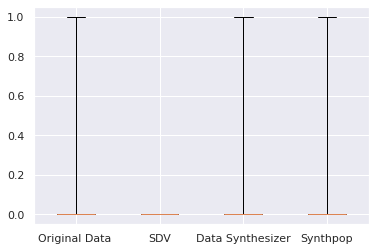

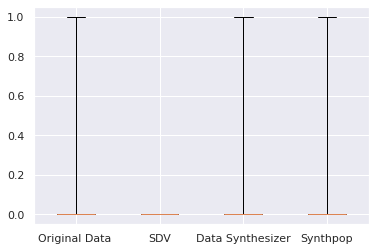

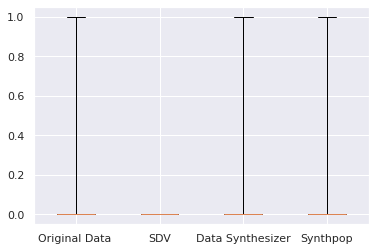

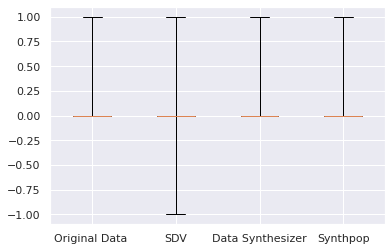

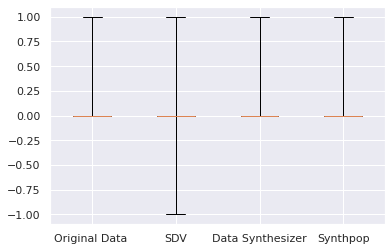

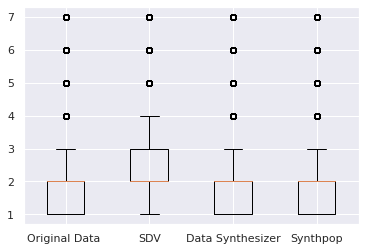

In [ ]:
# Forest data csv's
names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']
data=pd.read_csv('/content/drive/MyDrive/covtype.data.csv',names=names)
s_data=pd.read_csv('/content/drive/MyDrive/s_data.csv')
d_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Data Synthesizer/Data_Synthesizer_ForestDataset.csv')
sp_data=pd.read_csv('/content/drive/MyDrive/SyntheticData/Synthpop/Synthetic Synthpop Forest Dataset.csv')


# Forest Data Charts

#Bar charts
get_forest_charts(data,s_data,d_data,sp_data)

#Heat Maps
get_heat_maps(data,s_data,d_data,sp_data)

#Box plots
get_box_plots(data,s_data,d_data,sp_data)